In [1]:
library(ggplot2)
library(ggpubr)


In [24]:
load("~/Jiang_CB_ADAROE_Human_RNASeq/Coordblood_ADAR_oe.rdata")
cb_maf <- maf

load("~/Jamieson/RNAediting/MPN_rediportal_10222020.RData")
MPN_maf <- maf

load("~/DeWerf/RNAediting/Pediatric_AML.RData")
ped_maf <- maf

#MPN_maf_old <- read.csv(file="/mnt/data1/adam/jamieson/holm/vcf/rnaedit/MPN_Normal_known_novel_merged_rnaedit_sites_03042020.maf", 
#                       sep="\t")

In [25]:
dim(cb_maf)
dim(MPN_maf)
dim(ped_maf)
#dim(MPN_maf_old)
#head(MPN_maf_old)

[1] 102546    137

[1] 1195614     137

[1] 555639    137

In [26]:
table(cb_maf$Variant_Classification)
table(MPN_maf$Variant_Classification)
table(ped_maf$Variant_Classification)
head(colnames(maf))


               3'Flank                  3'UTR                5'Flank 
                 19000                  20010                   3113 
                 5'UTR                 Intron      Missense_Mutation 
                   191                  58246                    145 
      Nonstop_Mutation                    RNA                 Silent 
                     1                   1767                     22 
         Splice_Region            Splice_Site Translation_Start_Site 
                    18                     32                      1 


               3'Flank                  3'UTR                5'Flank 
                124313                  86568                  31928 
                 5'UTR                 Intron      Missense_Mutation 
                  1241                 938563                    931 
      Nonstop_Mutation                    RNA                 Silent 
                     8                  11590                    236 
         Splice_Region            Splice_Site Translation_Start_Site 
                   137                     97                      2 


          3'Flank             3'UTR           5'Flank             5'UTR 
            43955             27981             12078               425 
           Intron Missense_Mutation  Nonstop_Mutation               RNA 
           467279               377                 6              3357 
           Silent     Splice_Region       Splice_Site 
               86                53                42 

[1] "Hugo_Symbol"    "Entrez_Gene_Id" "Center"         "NCBI_Build"    
[5] "Chromosome"     "Start_Position"

In [7]:
#table(cb_maf$Tumor_Sample_Barcode)
table(MPN_maf$Tumor_Sample_Barcode)
table(ped_maf$Tumor_Sample_Barcode)


             102              107      19_MDStoAML      20_MDStoAML 
           12255            15616            11516             8409 
            26_1             26_2             26_3             26_4 
              54              325              344             2191 
            26_5             26_6             26_7             27_8 
            1371              864             1829              287 
              36    368_ACAGTG_S0              380    380_ACAGTG_S0 
            8605             7987             6230             9806 
   401_ACAGTG_S0   4018_GTGAAA_S0    402_ACAGTG_S0   4040_GTGAAA_S0 
            8163            11957             6788             7148 
  4066_GTGAAA_S0   407-PB-Prog_S0   407-PB-Stem_S0    410_ACAGTG_S0 
            5222             8668             9691             9588 
   415_ACAGTG_S0    416_ACAGTG_S0   4188_GTGAAA_S0               42 
            9525             7830             3698            15064 
  4215_GTGAAA_S0   4218_GTGAAA_S0


         01id11251HPC_S1         01id38cellHSC_S1       01pid24760ctHSC_S1 
                    4116                     7804                    15570 
    01x00077xPROGENIT_S1          02id11251HSC_S2 02id38cellPROGENITORS_S2 
                   14010                    11546                     3598 
      02pid24760ctHPC_S2     02x11379xHSCxxxxx_S2          03id11474HPC_S3 
                   17687                    27075                     5402 
        03id78cellHSC_S3       03pid24474ctHSC_S3     03x11379xHPCxxxxx_S3 
                    7524                    14387                    30420 
         04id11474HSC_S4 04id78cellPROGENITORS_S4       04pid24474ctHPC_S4 
                    5664                     6142                    12192 
    04x00068xPLUSMINS_S4          05id00066HSC_S5       05pid25376ctHSC_S5 
                   26338                     5961                     3926 
    05x00047xPLUSPLUS_S5          06id00066PRO_S6 06id90cellPROGENITORS_S5 
           

In [45]:
n <- names(table(ped_maf$Tumor_Sample_Barcode))
n
length(n)
n[grep("HPC|PRO|PLUSPLUS", n)]
n[grep("HSC|PLUSMINS", n)]

01x00077xPROGENIT

[1] "01id11251HPC_S1"          "01id38cellHSC_S1"        
 [3] "01pid24760ctHSC_S1"       "01x00077xPROGENIT_S1"    
 [5] "02id11251HSC_S2"          "02id38cellPROGENITORS_S2"
 [7] "02pid24760ctHPC_S2"       "02x11379xHSCxxxxx_S2"    
 [9] "03id11474HPC_S3"          "03id78cellHSC_S3"        
[11] "03pid24474ctHSC_S3"       "03x11379xHPCxxxxx_S3"    
[13] "04id11474HSC_S4"          "04id78cellPROGENITORS_S4"
[15] "04pid24474ctHPC_S4"       "04x00068xPLUSMINS_S4"    
[17] "05id00066HSC_S5"          "05pid25376ctHSC_S5"      
[19] "05x00047xPLUSPLUS_S5"     "06id00066PRO_S6"         
[21] "06id90cellPROGENITORS_S5" "06pid25376ctHPC_S6"      
[23] "06x00077xPLUSPLUS_S6"     "07x00023xPLUSPLUS_S1"    
[25] "08x00020xPLUSMINS_S2"     "09x00020pxPLUSPLUS_S3"   
[27] "10x00082xPLUSMINS_S4"     "11x00082xPLUSPLUS_S5"    
[29] "12x12484xPLUSMINS_S6"     "13x12488xPLUSMINS_S1"    
[31] "14x12488xPLUSPLUS_S2"     "15x12584xPLUSPLUS_S3"    
[33] "16x12451xPLUSMINS_S4"     "17x12451xPLUSPLUS_S5"    
[35] "18x10720xPLUSPLUS_S6"     "cell05id90HSC_S6"

[1] 36

[1] "01id11251HPC_S1"          "01x00077xPROGENIT_S1"    
 [3] "02id38cellPROGENITORS_S2" "02pid24760ctHPC_S2"      
 [5] "03id11474HPC_S3"          "03x11379xHPCxxxxx_S3"    
 [7] "04id78cellPROGENITORS_S4" "04pid24474ctHPC_S4"      
 [9] "05x00047xPLUSPLUS_S5"     "06id00066PRO_S6"         
[11] "06id90cellPROGENITORS_S5" "06pid25376ctHPC_S6"      
[13] "06x00077xPLUSPLUS_S6"     "07x00023xPLUSPLUS_S1"    
[15] "09x00020pxPLUSPLUS_S3"    "11x00082xPLUSPLUS_S5"    
[17] "14x12488xPLUSPLUS_S2"     "15x12584xPLUSPLUS_S3"    
[19] "17x12451xPLUSPLUS_S5"     "18x10720xPLUSPLUS_S6"

[1] "01id38cellHSC_S1"     "01pid24760ctHSC_S1"   "02id11251HSC_S2"     
 [4] "02x11379xHSCxxxxx_S2" "03id78cellHSC_S3"     "03pid24474ctHSC_S3"  
 [7] "04id11474HSC_S4"      "04x00068xPLUSMINS_S4" "05id00066HSC_S5"     
[10] "05pid25376ctHSC_S5"   "08x00020xPLUSMINS_S2" "10x00082xPLUSMINS_S4"
[13] "12x12484xPLUSMINS_S6" "13x12488xPLUSMINS_S1" "16x12451xPLUSMINS_S4"
[16] "cell05id90HSC_S6"

In [27]:
cb_names <- names(table(cb_maf$Tumor_Sample_Barcode))
cb_names.l <- list(Prog_PCDH=cb_names[c(5,11,19)],
                   Prog_WT=cb_names[c(2,8,16)],
                   CD34_PCDH=cb_names[c(13,26,29,32,35)],
                   CD34_WT=cb_names[c(14,27,30,33)],
                   Stem_PCDH=cb_names[c(21,23)],
                   Stem_WT=cb_names[c(22,24)])
cb_editsByPheno.l <- lapply(cb_names.l, function(x) {
    cb_maf[cb_maf$Tumor_Sample_Barcode %in% x,]
})

In [28]:
unlist(lapply(cb_editsByPheno.l, nrow))
#write.table(cb_editsByPheno.l[[1]], file="Jamieson_CB_ADAR_OE_Prog_PCDH_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(cb_editsByPheno.l[[2]], file="Jamieson_CB_ADAR_OE_Prog_WT_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(cb_editsByPheno.l[[3]], file="Jamieson_CB_ADAR_OE_CD34_PCDH_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(cb_editsByPheno.l[[4]], file="Jamieson_CB_ADAR_OE_CD34_WT_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(cb_editsByPheno.l[[5]], file="Jamieson_CB_ADAR_OE_Stem_PCDH_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(cb_editsByPheno.l[[6]], file="Jamieson_CB_ADAR_OE_Stem_WT_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)

Prog_PCDH   Prog_WT CD34_PCDH   CD34_WT Stem_PCDH   Stem_WT 
     9877      6254     15706     12495      2191      2287

In [8]:
ped_names <- names(table(ped_maf$Tumor_Sample_Barcode))
ped_names.l <- list(Prog_PedAML=ped_names[c(4,6,12,14,20,21,31,32,34)],
                   Prog_PedNL=ped_names[c(7,15,18,19,23,35)],
                   Stem_PedAML=ped_names[c(2,8,10,16,17,29,30,33,36)],
                   Stem_PedNL=ped_names[c(3,11,18)],
                   Prog_AdultAML=ped_names[c(24,26,28)],
                   Stem_AdultAML=ped_names[c(5,13,27)])
ped_editsByPheno.l <- lapply(ped_names.l, function(x) {
    ped_maf[ped_maf$Tumor_Sample_Barcode %in% x,]
})


In [29]:
unlist(lapply(cb_editsByPheno.l, nrow))
unlist(lapply(ped_editsByPheno.l, nrow))
#write.table(ped_editsByPheno.l[[1]], file="Jamieson_Prog_PedAML_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(ped_editsByPheno.l[[2]], file="Jamieson_Prog_PedNonLeuk_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(ped_editsByPheno.l[[3]], file="Jamieson_Stem_PedAML_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(ped_editsByPheno.l[[4]], file="Jamieson_Stem_PedNonLeuk_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(ped_editsByPheno.l[[5]], file="Jamieson_Prog_AdultAML_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(ped_editsByPheno.l[[6]], file="Jamieson_Stem_AdultAML_RediportalEdits.txt", sep="\t", quote=FALSE, row.names=FALSE)


Prog_PCDH   Prog_WT CD34_PCDH   CD34_WT Stem_PCDH   Stem_WT 
     9877      6254     15706     12495      2191      2287

Prog_PedAML    Prog_PedNL   Stem_PedAML    Stem_PedNL Prog_AdultAML 
       145114         94555        129730         33883         87195 
Stem_AdultAML 
        44298

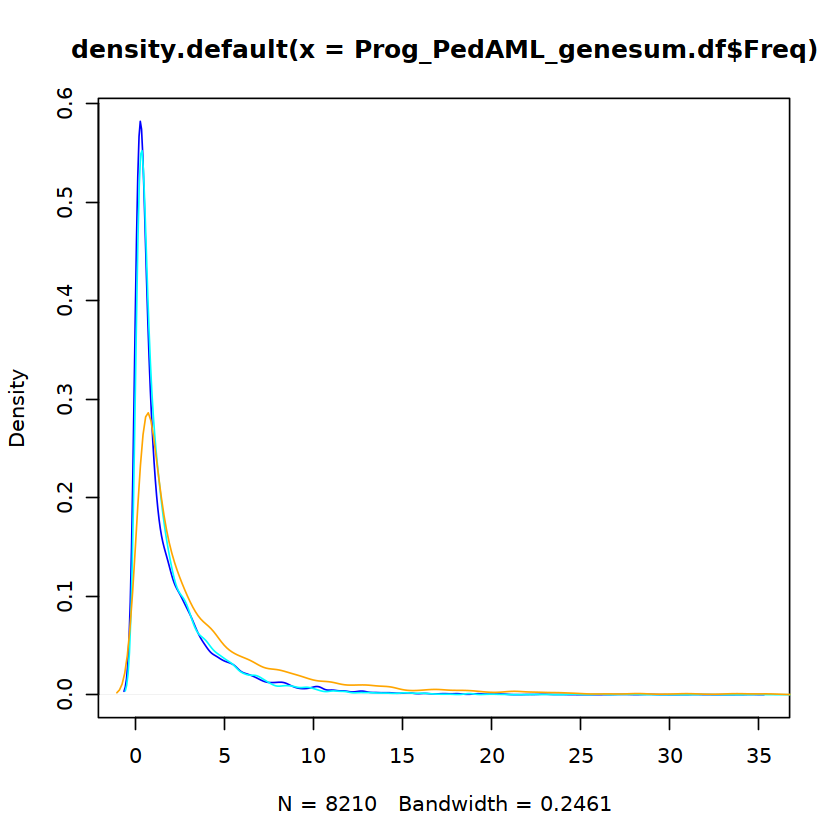

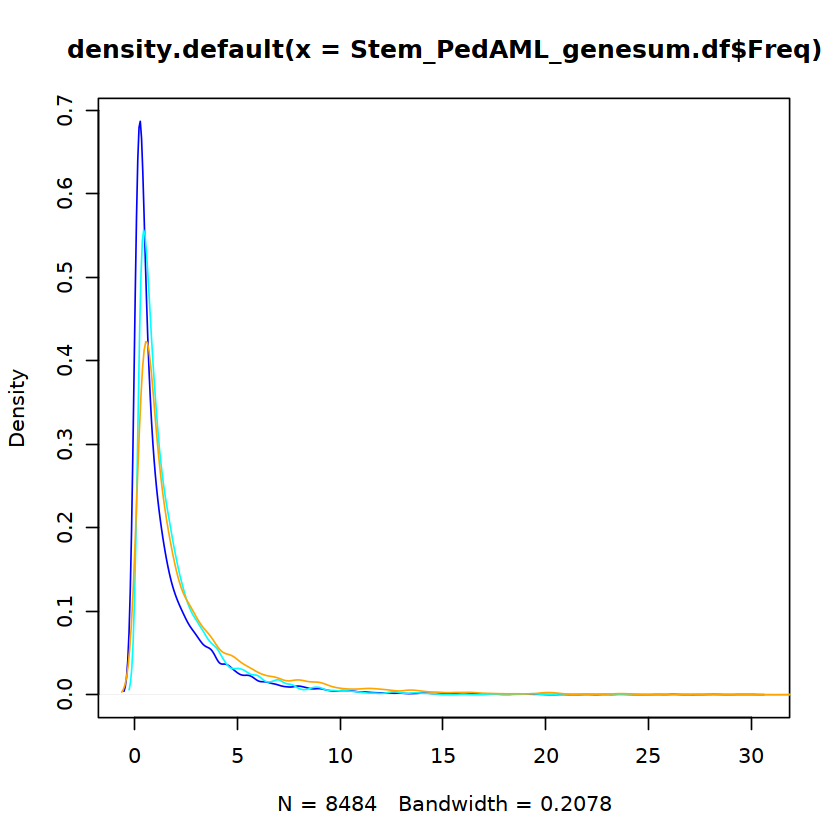

In [11]:
Prog_PedAML_genesum.df <- data.frame(table(ped_editsByPheno.l[[1]]$Hugo_Symbol)/length(unique(ped_editsByPheno.l[[1]]$Tumor_Sample_Barcode)))
Prog_PedNL_genesum.df <- data.frame(table(ped_editsByPheno.l[[2]]$Hugo_Symbol)/length(unique(ped_editsByPheno.l[[2]]$Tumor_Sample_Barcode)))
Prog_AdultAML_genesum.df <- data.frame(table(ped_editsByPheno.l[[5]]$Hugo_Symbol)/length(unique(ped_editsByPheno.l[[5]]$Tumor_Sample_Barcode)))
Stem_PedAML_genesum.df <- data.frame(table(ped_editsByPheno.l[[3]]$Hugo_Symbol)/length(unique(ped_editsByPheno.l[[3]]$Tumor_Sample_Barcode)))
Stem_PedNL_genesum.df <- data.frame(table(ped_editsByPheno.l[[4]]$Hugo_Symbol)/length(unique(ped_editsByPheno.l[[4]]$Tumor_Sample_Barcode)))
Stem_AdultAML_genesum.df <- data.frame(table(ped_editsByPheno.l[[6]]$Hugo_Symbol)/length(unique(ped_editsByPheno.l[[6]]$Tumor_Sample_Barcode)))

plot(density(Prog_PedAML_genesum.df$Freq), type="l", col="blue")
lines(density(Prog_PedNL_genesum.df$Freq), col="cyan")
lines(density(Prog_AdultAML_genesum.df$Freq), col="orange")

plot(density(Stem_PedAML_genesum.df$Freq), type="l", col="blue")
lines(density(Stem_PedNL_genesum.df$Freq), col="cyan")
lines(density(Stem_AdultAML_genesum.df$Freq), col="orange")

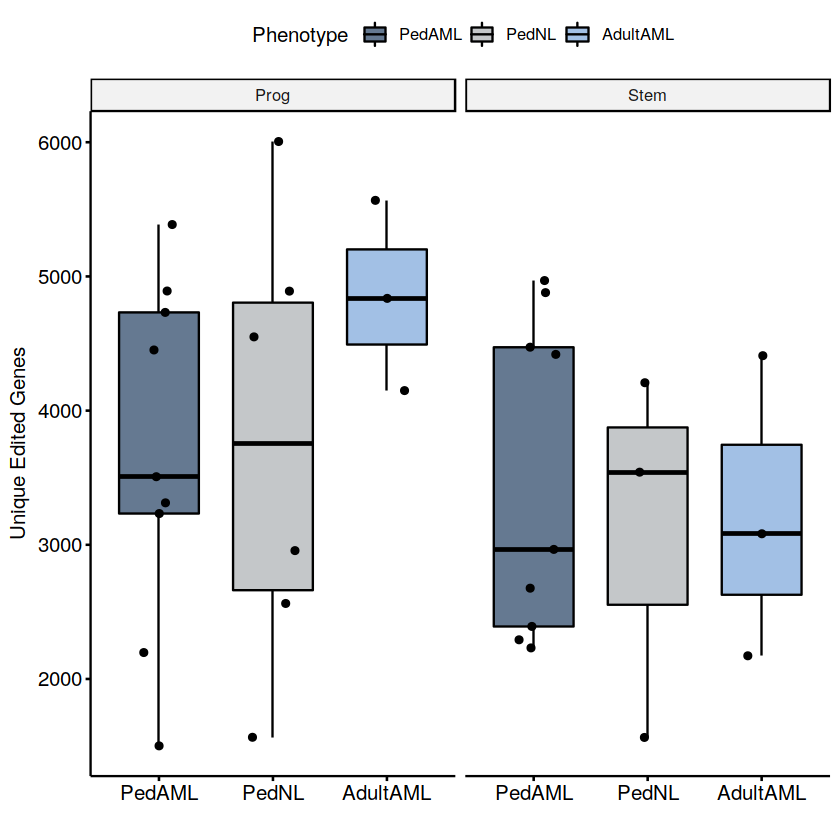

In [20]:
Prog_PedAML_indgenesum.df <- data.frame(table(ped_editsByPheno.l[[1]]$Hugo_Symbol,ped_editsByPheno.l[[1]]$Tumor_Sample_Barcode))
Prog_PedNL_indgenesum.df <- data.frame(table(ped_editsByPheno.l[[2]]$Hugo_Symbol,ped_editsByPheno.l[[2]]$Tumor_Sample_Barcode))
Prog_AdultAML_indgenesum.df <- data.frame(table(ped_editsByPheno.l[[5]]$Hugo_Symbol,ped_editsByPheno.l[[5]]$Tumor_Sample_Barcode))
Stem_PedAML_indgenesum.df <- data.frame(table(ped_editsByPheno.l[[3]]$Hugo_Symbol,ped_editsByPheno.l[[3]]$Tumor_Sample_Barcode))
Stem_PedNL_indgenesum.df <- data.frame(table(ped_editsByPheno.l[[4]]$Hugo_Symbol,ped_editsByPheno.l[[4]]$Tumor_Sample_Barcode))
Stem_AdultAML_indgenesum.df <- data.frame(table(ped_editsByPheno.l[[6]]$Hugo_Symbol,ped_editsByPheno.l[[6]]$Tumor_Sample_Barcode))
indgenesum.l <- lapply(list(Prog_PedAML_indgenesum.df, Prog_PedNL_indgenesum.df, Prog_AdultAML_indgenesum.df,
                        Stem_PedAML_indgenesum.df, Stem_PedNL_indgenesum.df, Stem_AdultAML_indgenesum.df), function(i) {
    unlist(lapply(unique(i$Var2), function(x) {
        length(unique(as.character(subset(i, Var2 == x & Freq != 0)$Var1)))
    }))
})
indgenesum.df <- data.frame(Cell.type=c(rep("Prog", length(unlist(indgenesum.l[1:3]))), 
                                        rep("Stem", length(unlist(indgenesum.l[4:6])))),
                           Phenotype=c(rep("PedAML", length(indgenesum.l[[1]])), 
                                      rep("PedNL", length(indgenesum.l[[2]])), 
                                      rep("AdultAML", length(indgenesum.l[[3]])),
                                      rep("PedAML", length(indgenesum.l[[4]])), 
                                      rep("PedNL", length(indgenesum.l[[5]])), 
                                      rep("AdultAML", length(indgenesum.l[[6]]))),
                           Total=unlist(indgenesum.l))
#pdf(file="DerWerf_PedAML_UniqueEditedGenes_boxplot_06162021.pdf", width=8, height=6)
ggboxplot(indgenesum.df, x="Phenotype", fill="Phenotype", y="Total", xlab="", ylab="Unique Edited Genes", 
          palette=c("#657991", "#C4C7C9", "#A2C0E5"), add="jitter") + facet_grid(~Cell.type)
#dev.off()

In [21]:
overlap.df <- as.data.frame(matrix(0, nrow=length(ped_editsByPheno.l), ncol=length(cb_editsByPheno.l))) 
for(i in 1:length(cb_editsByPheno.l)) {
     for (j in 1:length(ped_editsByPheno.l)) {
         overlap.df[j,i] <- sum(unique(paste0(cb_editsByPheno.l[[i]]$Chromosome, "_", cb_editsByPheno.l[[i]]$Start_Position)) %in% 
                                unique(paste0(ped_editsByPheno.l[[j]]$Chromosome, "_", ped_editsByPheno.l[[j]]$Start_Position)))
     }
 }
overlap.df
cb_sum.df <- unlist(lapply(cb_editsByPheno.l, function(x) length(unique(paste0(x$Chromosome, "_", x$Start_Position)))))
cb_sum.df
t(apply(overlap.df, 1, function(x) 100*x/cb_sum.df))


V1,V2,V3,V4,V5,V6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4132,2574,6197,4882,925,681
3731,2333,5512,4374,805,573
3643,2398,5388,4247,845,687
1713,1187,2555,1922,406,328
2163,1292,3189,2562,489,362
1654,1135,2447,1948,447,356


Prog_PCDH   Prog_WT CD34_PCDH   CD34_WT Stem_PCDH   Stem_WT 
     8888      5318     12740     10858      2018      2076

V1,V2,V3,V4,V5,V6
46.48965,48.40165,48.64207,44.96224,45.83746,32.80347
41.97795,43.86988,43.26531,40.28366,39.89098,27.60116
40.98785,45.09214,42.29199,39.11402,41.87314,33.09249
19.27318,22.32042,20.05495,17.70123,20.11893,15.79961
24.33618,24.29485,25.03140,23.59551,24.23191,17.43738
18.60936,21.34261,19.20722,17.94069,22.15064,17.14836


In [22]:
overlap.hyper.df <- as.data.frame(matrix(0, nrow=length(ped_editsByPheno.l), ncol=length(cb_editsByPheno.l))) 
for(i in 1:length(cb_editsByPheno.l)) {
     for (j in 1:length(ped_editsByPheno.l)) {
         cb.u <- unique(paste0(cb_editsByPheno.l[[i]]$Chromosome, "_", cb_editsByPheno.l[[i]]$Start_Position))
         ped.u <- unique(paste0(ped_editsByPheno.l[[j]]$Chromosome, "_", ped_editsByPheno.l[[j]]$Start_Position))
         s <- sum(cb.u %in% ped.u) 
         overlap.hyper.df[j,i] <- phyper(s, length(cb.u), 300000-length(cb.u), length(ped.u), lower.tail=FALSE)
     }
 }
overlap.hyper.df

V1,V2,V3,V4,V5,V6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.858935e-90,5.875253e-75,5.623757e-188,1.241970e-80,3.468348e-19,9.994794e-01
2.905771e-224,3.620190e-166,0.000000e+00,1.853031e-220,2.095919e-39,1.329850e-01
6.067498e-33,2.929201e-53,2.834156e-68,4.550759e-20,6.015711e-11,9.647171e-01
1.644275e-129,8.243439e-134,3.767078e-220,1.689247e-109,9.417070e-36,6.216480e-13
9.999993e-01,9.999161e-01,9.999627e-01,1.000000e+00,9.906746e-01,1.000000e+00
7.680274e-38,5.503573e-52,3.520961e-67,4.957397e-35,8.640420e-25,7.253101e-06


In [12]:
load("~/DeWerf/interim/20200228_DeWerf_Human_PediatricAML_data_exploration_20200327141050.RData")


In [13]:
ped_editing.tab <- table(ped_maf$Tumor_Sample_Barcode) 
ped_editing.tab
length(ped_editing.tab)
length(gNormedFilteredDgeList$samples$Sample)
names(ped_editing.tab)[!gsub("_S[0-9]*$", "", gsub("pxPLUSPLUS", "xPLUSPLUS", names(ped_editing.tab))) %in% gNormedFilteredDgeList$samples$Sample]


         01id11251HPC_S1         01id38cellHSC_S1       01pid24760ctHSC_S1 
                    4116                     7804                    15570 
    01x00077xPROGENIT_S1          02id11251HSC_S2 02id38cellPROGENITORS_S2 
                   14010                    11546                     3598 
      02pid24760ctHPC_S2     02x11379xHSCxxxxx_S2          03id11474HPC_S3 
                   17687                    27075                     5402 
        03id78cellHSC_S3       03pid24474ctHSC_S3     03x11379xHPCxxxxx_S3 
                    7524                    14387                    30420 
         04id11474HSC_S4 04id78cellPROGENITORS_S4       04pid24474ctHPC_S4 
                    5664                     6142                    12192 
    04x00068xPLUSMINS_S4          05id00066HSC_S5       05pid25376ctHSC_S5 
                   26338                     5961                     3926 
    05x00047xPLUSPLUS_S5          06id00066PRO_S6 06id90cellPROGENITORS_S5 
           

[1] 36

Loading required package: edgeR

Loading required package: limma



[1] 32

[1] "01id11251HPC_S1"      "03id11474HPC_S3"      "08x00020xPLUSMINS_S2"
[4] "12x12484xPLUSMINS_S6"

In [14]:
#ped_editing.tab <- table(ped_maf$Tumor_Sample_Barcode) 
ped_meta <- gNormedFilteredDgeList$samples
ped_meta$edits <- ped_editing.tab[match(ped_meta$Sample, gsub("_S[0-9]*$", "", gsub("pxPLUSPLUS", "xPLUSPLUS", names(ped_editing.tab))))]
ped_meta$editspermillion <- 1000000 * ped_meta$edits/ped_meta$lib.size
ped_meta$Phenotype <- gsub("AdultAML", "de novo AML", ped_meta$X)
ped_meta$Cell.type.pheno <- paste0(ped_meta$Cell.type, "_", ped_meta$Phenotype)

In [15]:
ped_maf.filt <- ped_maf[!ped_maf$Tumor_Sample_Barcode %in% 
                        c("12x12484xPLUSMINS", "01id11251HPC", "03id11474HPC", "08x00020xPLUSMINS"),
                       c(1:2,4:14,16,35,38,40:51,64:70,133:137)]
ped_maf.filt$Condition <- ped_meta$Cell.type.pheno[match(gsub("_S[0-9]*$", "", gsub("pxPLUSPLUS", "xPLUSPLUS", ped_maf.filt$Tumor_Sample_Barcode)), 
                                                   ped_meta$Sample)]
head(ped_maf.filt)
#write.table(ped_maf.filt, file="PediatricAML_Rediportal_edits.txt", sep="\t", quote=FALSE, row.names=FALSE)

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,⋯,ENSP,SWISSPROT,TREMBL,UNIPARC,vcf_pos,Alu,VAF,strand,mutsig,Condition
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,7SK,0,GRCh37,chr6,136865302,136865302,+,5'Flank,SNP,T,⋯,,,,,136865302,alu,1.0000000,-,T>C,Stem_PedAML
2,7SK,0,GRCh37,chr6,136865310,136865310,+,5'Flank,SNP,T,⋯,,,,,136865310,alu,1.0000000,-,T>C,Stem_PedAML
3,A1BG,0,GRCh37,chr19,58859552,58859552,+,Intron,SNP,T,⋯,ENSP00000263100,P04217,Q7Z3U3,UPI0000167B10,58859552,alu,0.2400000,-,T>C,Stem_PedNL
4,A1BG,0,GRCh37,chr19,58855500,58855500,+,3'Flank,SNP,T,⋯,ENSP00000263100,P04217,Q7Z3U3,UPI0000167B10,58855500,alu,0.4000000,-,T>C,Stem_PedAML
5,A1BG,0,GRCh37,chr19,58855510,58855510,+,3'Flank,SNP,T,⋯,ENSP00000263100,P04217,Q7Z3U3,UPI0000167B10,58855510,alu,0.4000000,-,T>C,Stem_PedAML
6,A1BG,0,GRCh37,chr19,58860513,58860513,+,Intron,SNP,T,⋯,ENSP00000263100,P04217,Q7Z3U3,UPI0000167B10,58860513,alu,0.3333333,-,T>C,Prog_PedAML


In [16]:
ped_ADAR.df <- read.table(file="~/DeWerf/Notebooks/DerWerf_PedAML_ADARtx_ratios_all.txt", sep="\t", 
                          header=TRUE, stringsAsFactors=FALSE)

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



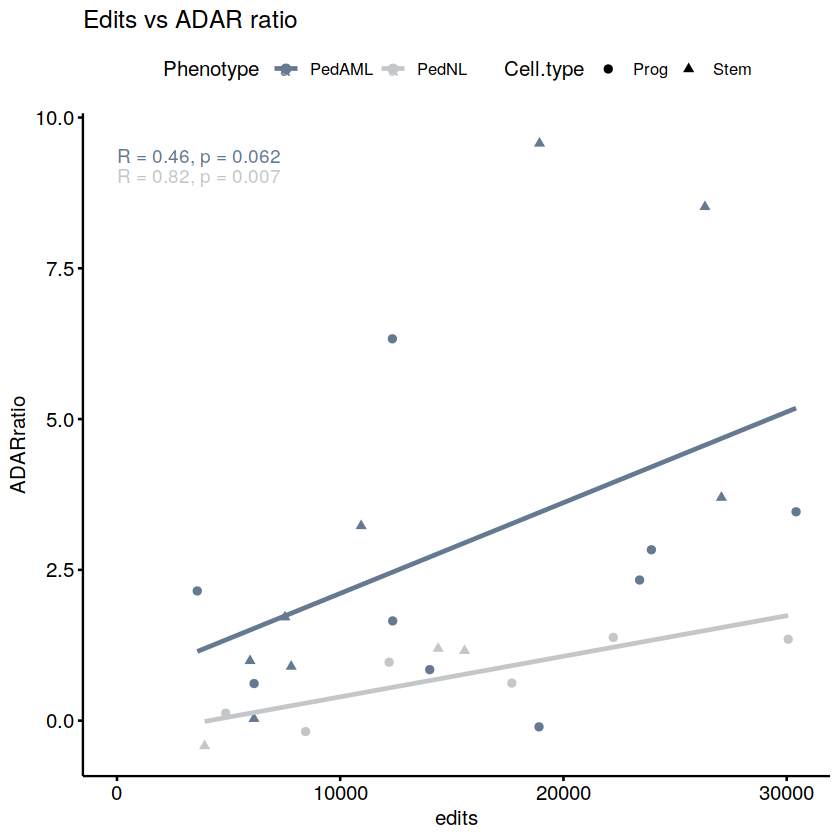

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



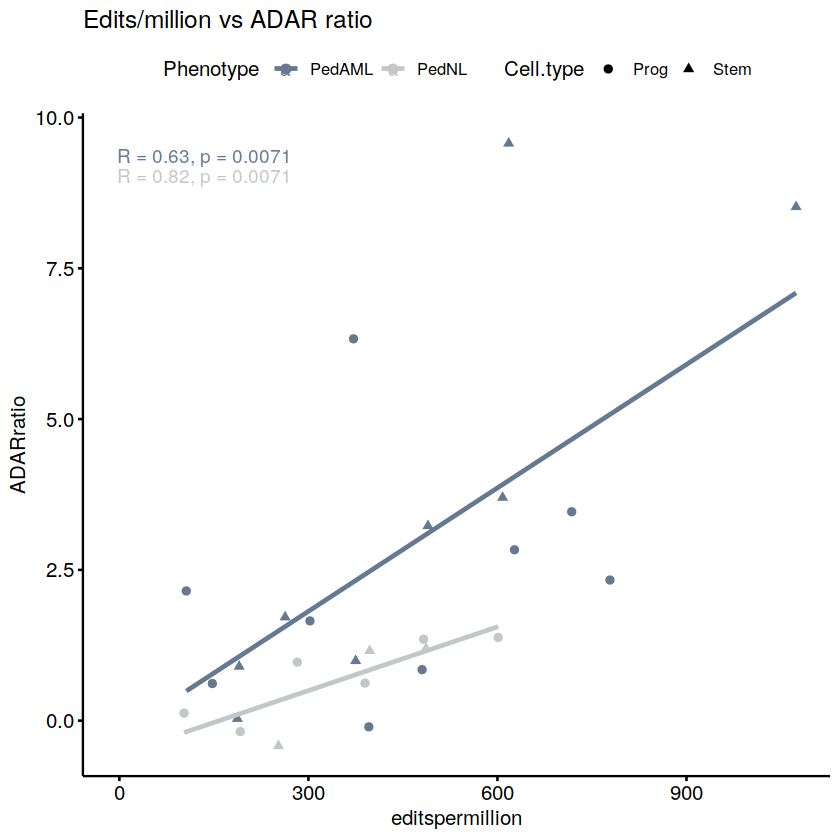

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



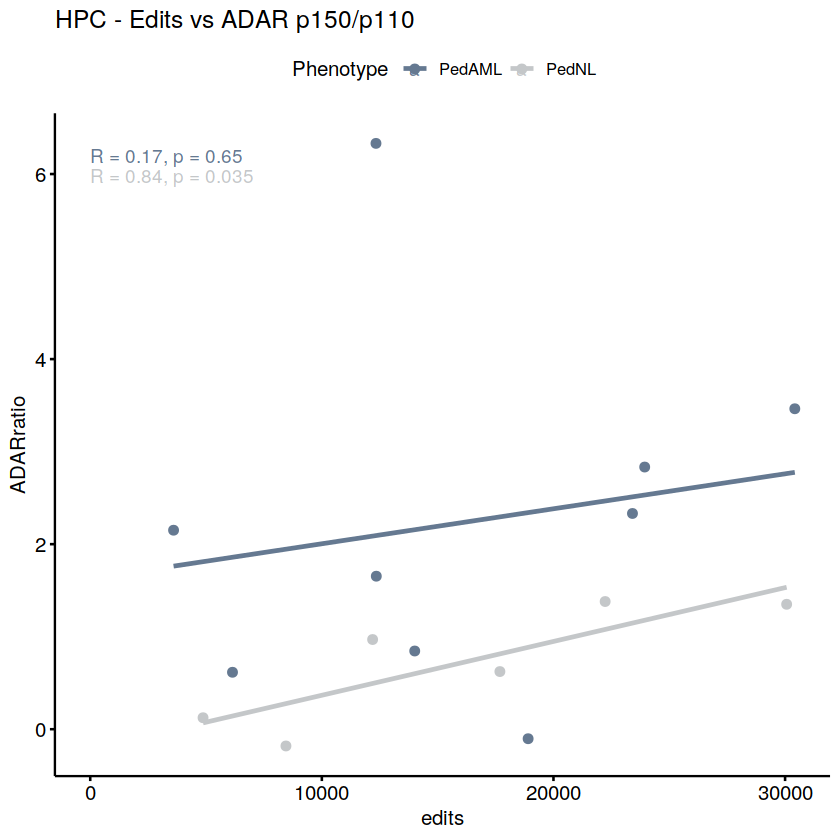

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



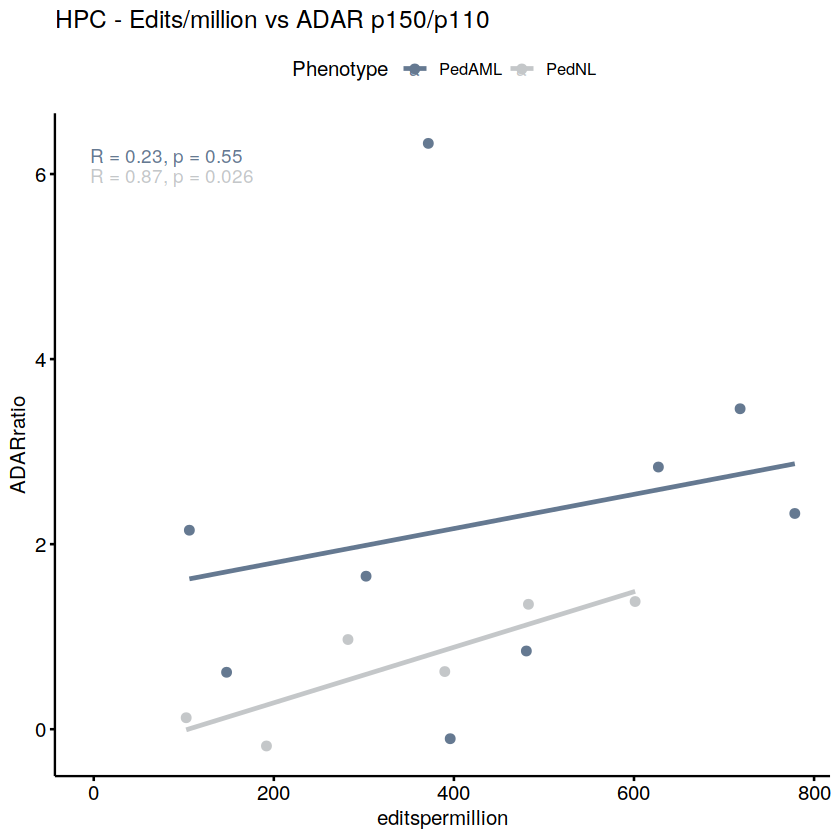

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



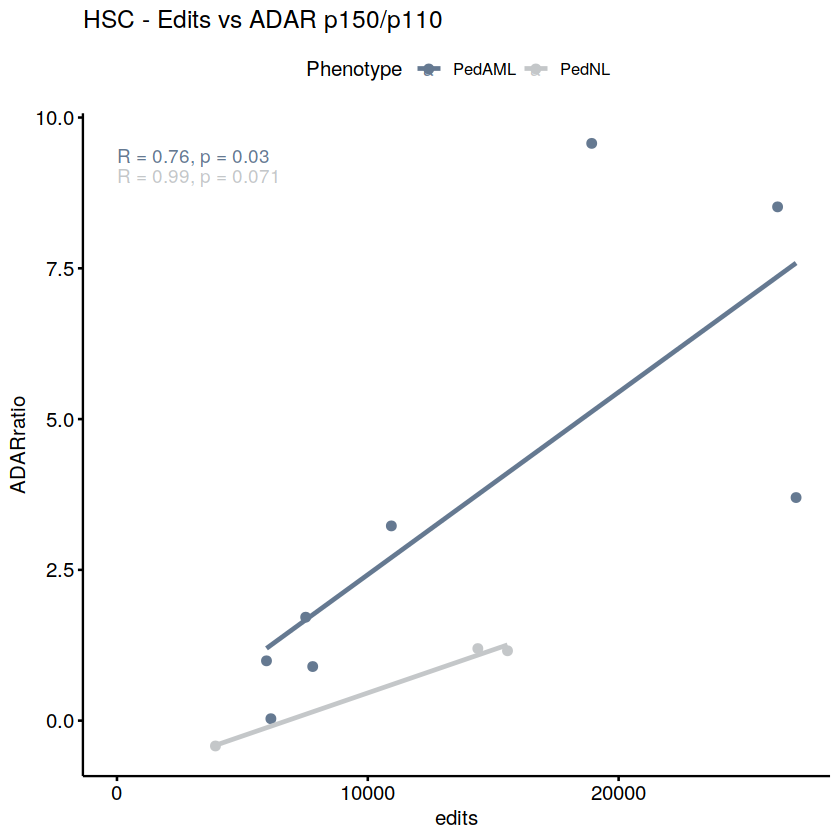

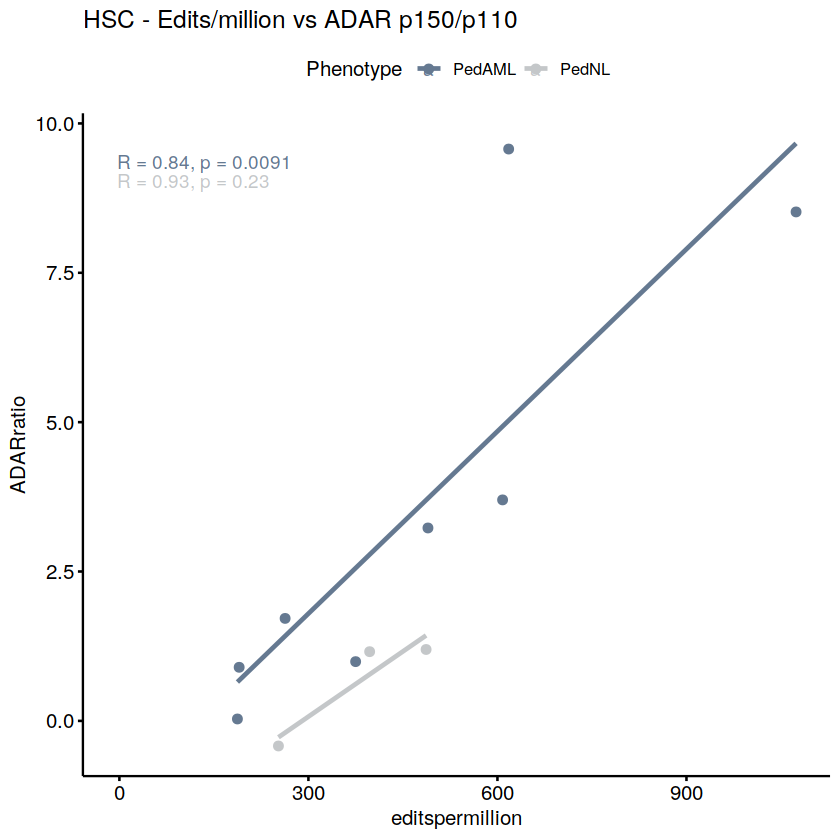

In [29]:
ped_meta$ADARratio <- ped_ADAR.df$value[match(rownames(ped_meta), gsub("^X", "", ped_ADAR.df$Sample))]
ped_meta$ADARp110 <- ped_ADAR.df$ADARp110.expr[match(rownames(ped_meta), gsub("^X", "", ped_ADAR.df$Sample))]
ped_meta$ADARp150 <- ped_ADAR.df$ADARp150.expr[match(rownames(ped_meta), gsub("^X", "", ped_ADAR.df$Sample))]
ggscatter(subset(ped_meta, group != "AdultAML"), x="edits", y="ADARratio", col="Phenotype", 
          shape="Cell.type", main="Edits vs ADAR ratio", palette=c("#657991", "#C4C7C9"), add="reg.line") + 
        stat_cor(aes(col=Phenotype), output.type = "text", label.x = -4, na.rm=TRUE) 
#pdf(file="DerWerf_PedAML_Editspermillion_ADARratio_PedNLvPedAML_all_06182021.pdf", width=7, height=7)
ggscatter(subset(ped_meta, group != "AdultAML"), x="editspermillion", y="ADARratio", main="Edits/million vs ADAR ratio",
          col="Phenotype", shape="Cell.type", palette=c("#657991", "#C4C7C9"), add="reg.line") + 
        stat_cor(aes(col=Phenotype), output.type = "text", label.x = -4, na.rm=TRUE) 
#dev.off()
ggscatter(subset(ped_meta, Cell.type == "Prog" & group != "AdultAML"), x="edits", y="ADARratio", 
          col="Phenotype",  main="HPC - Edits vs ADAR p150/p110", palette=c("#657991", "#C4C7C9"), add="reg.line") + 
stat_cor(aes(col=Phenotype), output.type = "text", label.x = -4, na.rm=TRUE)

#pdf(file="DerWerf_PedAML_Editspermillion_ADARratio_PedNLvPedAML_Prog_06182021.pdf", width=7, height=7)
ggscatter(subset(ped_meta, Cell.type == "Prog" & group != "AdultAML"), x="editspermillion", y="ADARratio", 
          col="Phenotype",  main="HPC - Edits/million vs ADAR p150/p110", palette=c("#657991", "#C4C7C9"), add="reg.line") + 
stat_cor(aes(col=Phenotype), output.type = "text", label.x = -4, na.rm=TRUE)
#dev.off()

ggscatter(subset(ped_meta, Cell.type == "Stem" & group != "AdultAML"), x="edits", y="ADARratio", 
          col="Phenotype",  main="HSC - Edits vs ADAR p150/p110", palette=c("#657991", "#C4C7C9"), add="reg.line") + 
stat_cor(aes(col=Phenotype), output.type = "text", label.x = -4, na.rm=TRUE)

#pdf(file="DerWerf_PedAML_Editspermillion_ADARratio_PedNLvPedAML_Stem_06182021.pdf", width=7, height=7)
ggscatter(subset(ped_meta, Cell.type == "Stem" & group != "AdultAML"), x="editspermillion", y="ADARratio", 
          col="Phenotype",  main="HSC - Edits/million vs ADAR p150/p110", palette=c("#657991", "#C4C7C9"), add="reg.line") + 
stat_cor(aes(col=Phenotype), output.type = "text", label.x = -4, na.rm=TRUE)
#dev.off()


In [20]:
MPN_prog_meta <- read.csv(file="~/Jamieson/MPN_meta_prog.csv", header=TRUE)
MPN_stem_meta <- read.csv(file="~/Jamieson/MPN_meta_stem.csv", header=TRUE)
head(MPN_prog_meta$Sample)
MPN_meta <- rbind.data.frame(MPN_prog_meta[,1:15], MPN_stem_meta[,1:15])


[1] "X368_ACAGTG_S0" "X380_ACAGTG_S0" "X401_ACAGTG_S0" "X402_ACAGTG_S0"
[5] "X410_ACAGTG_S0" "X415_ACAGTG_S0"

In [21]:
MPN_maf2 <- MPN_maf
MPN_maf2 <- subset(MPN_maf2, Tumor_Sample_Barcode != "721-PB-34plus_S0")
MPN_maf2$Tumor_Sample_Barcode[which(MPN_maf2$Tumor_Sample_Barcode %in% "380")] <- "380_ACAGTG_S0"

In [22]:
MPN_editing.tab <- table(MPN_maf2$Tumor_Sample_Barcode) 
MPN_editing.tab
names(MPN_editing.tab)[!gsub("-", ".", gsub("_S[0-9]*$", "", names(MPN_editing.tab))) %in% 
                       gsub("^X", "", gsub("-", ".", gsub("_S[0-9]*$", "", MPN_meta$Sample)))]
MPN_meta$edits <- MPN_editing.tab[match(gsub("^X", "", gsub("-", ".", gsub("_S[0-9]*$", "", MPN_meta$Sample))),
                                       gsub("-", ".", gsub("_S[0-9]*$", "", names(MPN_editing.tab))))]
MPN_meta$editspermillion <- 1000000 * MPN_meta$edits/MPN_meta$lib.size
table(gsub("^X", "", gsub("-", ".", gsub("_S[0-9]*$", "", MPN_meta$Sample)))
      %in% gsub("-", ".", gsub("_S[0-9]*$", "", unique(MPN_maf2$Tumor_Sample_Barcode))))
table(gsub("-", ".", gsub("_S[0-9]*$", "", unique(MPN_maf2$Tumor_Sample_Barcode))) %in% 
     gsub("^X", "", gsub("-", ".", gsub("_S[0-9]*$", "", MPN_meta$Sample))))
MPN_meta$Cell.type <- gsub("Sorted progenitors", "Prog", gsub("Progenitor", "Prog", gsub("Sorted stem", "", MPN_meta$Cell.type)))
MPN_meta$Phenotype <- gsub("AML", "secondary AML", MPN_meta$Sample.type2)
MPN_meta$Cell.type[which(MPN_meta$Cell.type == "")] <-  "Stem" 


            102             107     19_MDStoAML     20_MDStoAML            26_1 
          12255           15616           11516            8409              54 
           26_2            26_3            26_4            26_5            26_6 
            325             344            2191            1371             864 
           26_7            27_8              36   368_ACAGTG_S0   380_ACAGTG_S0 
           1829             287            8605            7987           16036 
  401_ACAGTG_S0  4018_GTGAAA_S0   402_ACAGTG_S0  4040_GTGAAA_S0  4066_GTGAAA_S0 
           8163           11957            6788            7148            5222 
 407-PB-Prog_S0  407-PB-Stem_S0   410_ACAGTG_S0   415_ACAGTG_S0   416_ACAGTG_S0 
           8668            9691            9588            9525            7830 
 4188_GTGAAA_S0              42  4215_GTGAAA_S0  4218_GTGAAA_S0  422-PB-Stem_S0 
           3698           15064            7183            5001            9596 
 4259_GTGAAA_S0   426_ACAGT

character(0)


TRUE 
 113 


TRUE 
 113 

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.



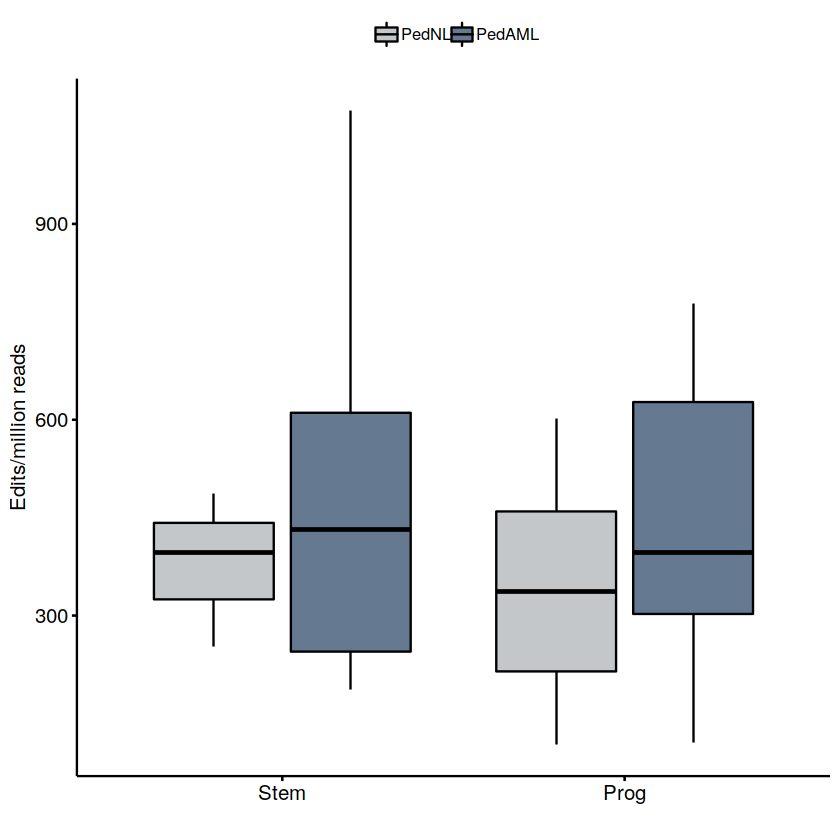

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.



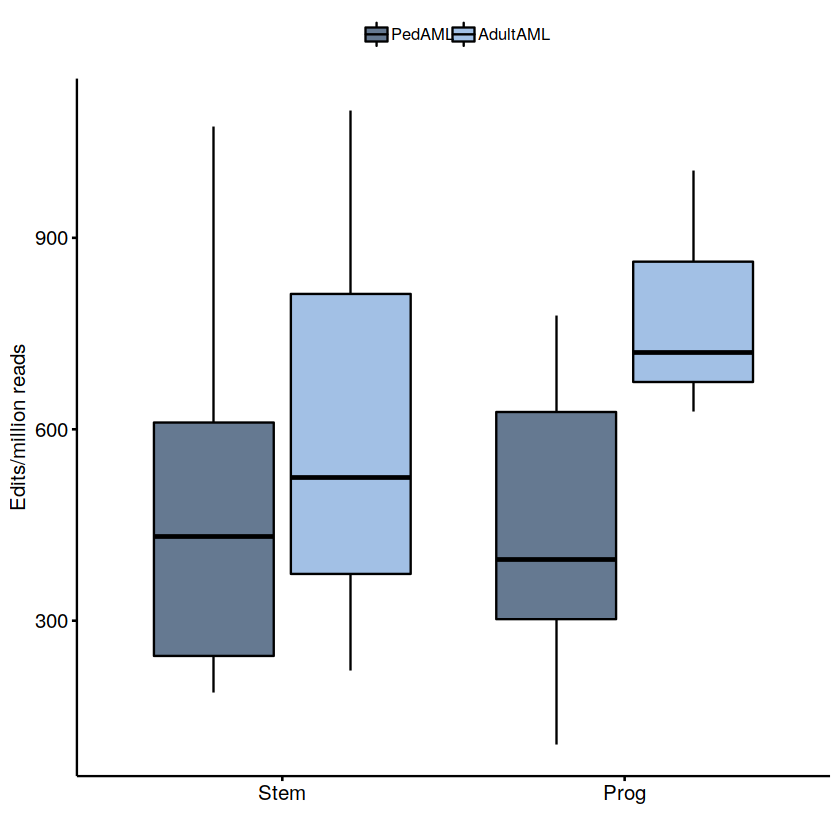

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.



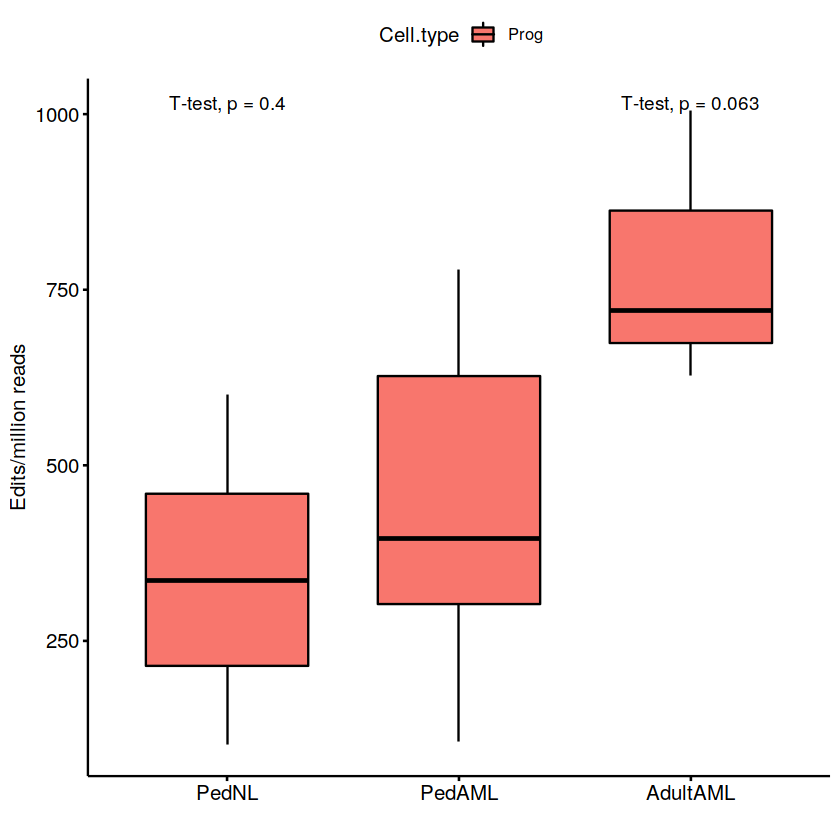

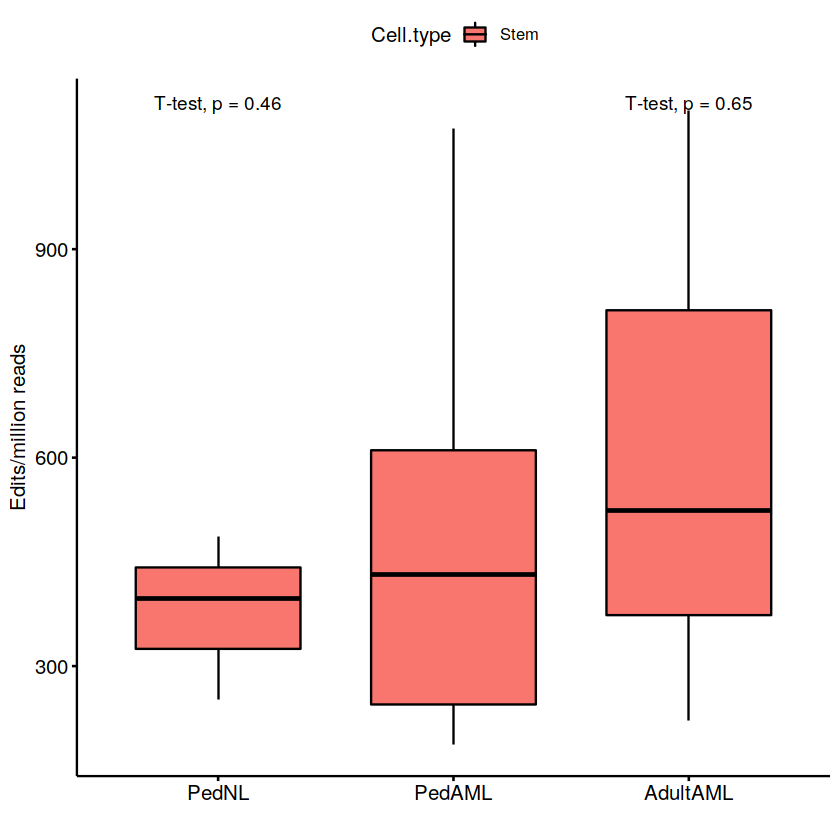

In [33]:
ped_meta$X <- factor(as.character(ped_meta$X), levels=c("PedNL", "PedAML", "AdultAML"))

#pdf(file="DerWerf_PedAML_EditsPerMillion_PedNL_PedAML_boxplot.pdf", width=6, height=6)
ggboxplot(subset(ped_meta, X != "AdultAML"), x="Cell.type", y="editspermillion", fill="X", xlab="", ylab="Edits/million reads",
         palette=c("#C4C7C9", "#657991")) + theme(legend.title=element_text(size=0))
#dev.off()
#pdf(file="DerWerf_PedAML_EditsPerMillion_AdultAML_PedAML_boxplot.pdf", width=6, height=6)
ggboxplot(subset(ped_meta, X != "PedNL"), x="Cell.type", y="editspermillion", fill="X", xlab="", ylab="Edits/million reads",
         palette=c("#657991", "#A2C0E5")) + theme(legend.title=element_text(size=0))
#dev.off()
ggboxplot(subset(ped_meta, Cell.type != "Stem"), x="X", y="editspermillion", fill="Cell.type", xlab="", 
          ylab="Edits/million reads") + 
            stat_compare_means(method="t.test", ref.group="PedAML")

ggboxplot(subset(ped_meta, Cell.type != "Prog"), x="X", y="editspermillion", fill="Cell.type", xlab="", 
          ylab="Edits/million reads") + 
            stat_compare_means(method="t.test", ref.group="PedAML")


In [30]:
CB_meta <- read.table(file="~/Jiang_CB_ADAROE_Human_RNASeq/Jiang_CB_ADAR_OE_allsamps_meta.txt",
                        sep="\t", header=TRUE, stringsAsFactors=FALSE)
head(CB_meta$Sample)
CB_meta2 <- subset(CB_meta, Cell.type != "CD34pos")
CB_meta2 <- CB_meta2[CB_meta2$Treatment %in% c("ADAR1_WT", "control"),]
CB_meta2$Cell.type[which(CB_meta2$Cell.type %in% "Progenitors")] <- "Prog" 
CB_meta2

CB_meta_Prog <- read.table(file="~/Jiang_CB_ADAROE_Human_RNASeq/Jiang_CordbloodOE_Prog_meta_ADARtx.txt", sep="\t", 
          header=TRUE, stringsAsFactors=FALSE)
CB_meta_Stem <- read.table(file="~/Jiang_CB_ADAROE_Human_RNASeq/Jiang_CordbloodOE_Stem_meta_ADARtx.txt", sep="\t", 
          header=TRUE, stringsAsFactors=FALSE)
CB_meta_CD34pos <- read.table(file="~/Jiang_CB_ADAROE_Human_RNASeq/Jiang_CordbloodOE_CD34pos_meta_ADARtx.txt", sep="\t", 
          header=TRUE, stringsAsFactors=FALSE)
CB_meta_ADAR <- rbind.data.frame(CB_meta_Prog, CB_meta_Stem, CB_meta_CD34pos)
CB_meta2$ADARp110 <- CB_meta_ADAR$ADARp110.expr[match(CB_meta2$Sample, CB_meta_ADAR$Sample)]
CB_meta2$ADARp150 <- CB_meta_ADAR$ADARp150.expr[match(CB_meta2$Sample, CB_meta_ADAR$Sample)]
CB_meta2$ADARratio <- CB_meta_ADAR$ADARratio[match(CB_meta2$Sample, CB_meta_ADAR$Sample)]
CB_meta2

[1] "CB63_EA_S3" "CB65_EA_S3" "CB66_EA_S6" "CB26_SR_S2" "CB63_SR_S5"
[6] "CB65_SR_S5"

,group,lib.size,norm.factors,Sample,ID,Treatment,Cell.type,Patient_ID,Cell.Type.Full,Sample.Type,Transduction_full,cell_type_treatment,Sample2
,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
21,1,25572333,1.0401453,CB1_PROG_ADAR_WT_S2,CB1 PROG ADAR WT (17),ADAR1_WT,Prog,CB1,Progenitors,cord blood,transduced with lentiviru ADAR1 WT,Progenitors_ADAR1_WT,CB1_PROG_ADAR_WT_S2
22,1,22185606,1.0468875,CB2_PROG_ADAR_WT_S2,CB2 PROG ADAR WT (23),ADAR1_WT,Prog,CB2,Progenitors,cord blood,transduced with lentiviru ADAR1 WT,Progenitors_ADAR1_WT,CB2_PROG_ADAR_WT_S2
23,1,20823601,1.0350583,CB3_PROG_ADAR_WT_S7,CB3 PROG ADAR WT (29),ADAR1_WT,Prog,CB3,Progenitors,cord blood,transduced with lentiviru ADAR1 WT,Progenitors_ADAR1_WT,CB3_PROG_ADAR_WT_S7
24,1,19021660,1.0663727,CB1_PROG_PCDH_S5,CB1 PROG PCDH (16),control,Prog,CB1,Progenitors,cord blood,transduced with lentiviru pCDH,Progenitors_control,CB1_PROG_PCDH_S5
25,1,18196421,1.1264642,CB2_PROG_PCDH_S5,CB2 PROG PCDH (22),control,Prog,CB2,Progenitors,cord blood,transduced with lentiviru pCDH,Progenitors_control,CB2_PROG_PCDH_S5
26,1,12407326,1.0545446,CB3_PROG_PCDH_S8,CB3 PROG PCDH (28),control,Prog,CB3,Progenitors,cord blood,transduced with lentiviru pCDH,Progenitors_control,CB3_PROG_PCDH_S8
36,1,17909475,0.6405199,CB58_STEM_SR_S2,CB58 STEM SR,ADAR1_WT,Stem,CB58,Stem cells,cord blood,transduced with lentiviru ADAR1 WT,Stem_ADAR1_WT,CB58_STEM_SR_S2
37,1,17363934,0.8217490,CB59_STEM_SR_S8,CB59 STEM SR,ADAR1_WT,Stem,CB59,Stem cells,cord blood,transduced with lentiviru ADAR1 WT,Stem_ADAR1_WT,CB59_STEM_SR_S8
38,1,21284896,0.9363628,CB58_STEM_PCDH_S1,CB58 STEM PCDH,control,Stem,CB58,Stem cells,cord blood,transduced with lentiviru pCDH,Stem_control,CB58_STEM_PCDH_S1


,group,lib.size,norm.factors,Sample,ID,Treatment,Cell.type,Patient_ID,Cell.Type.Full,Sample.Type,Transduction_full,cell_type_treatment,Sample2,ADARp110,ADARp150,ADARratio
,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
21,1,25572333,1.0401453,CB1_PROG_ADAR_WT_S2,CB1 PROG ADAR WT (17),ADAR1_WT,Prog,CB1,Progenitors,cord blood,transduced with lentiviru ADAR1 WT,Progenitors_ADAR1_WT,CB1_PROG_ADAR_WT_S2,9.548831,10.834223,1.28539235
22,1,22185606,1.0468875,CB2_PROG_ADAR_WT_S2,CB2 PROG ADAR WT (23),ADAR1_WT,Prog,CB2,Progenitors,cord blood,transduced with lentiviru ADAR1 WT,Progenitors_ADAR1_WT,CB2_PROG_ADAR_WT_S2,9.402520,10.612539,1.21001896
23,1,20823601,1.0350583,CB3_PROG_ADAR_WT_S7,CB3 PROG ADAR WT (29),ADAR1_WT,Prog,CB3,Progenitors,cord blood,transduced with lentiviru ADAR1 WT,Progenitors_ADAR1_WT,CB3_PROG_ADAR_WT_S7,10.107886,10.865289,0.75740380
24,1,19021660,1.0663727,CB1_PROG_PCDH_S5,CB1 PROG PCDH (16),control,Prog,CB1,Progenitors,cord blood,transduced with lentiviru pCDH,Progenitors_control,CB1_PROG_PCDH_S5,5.619566,6.615911,0.99634505
25,1,18196421,1.1264642,CB2_PROG_PCDH_S5,CB2 PROG PCDH (22),control,Prog,CB2,Progenitors,cord blood,transduced with lentiviru pCDH,Progenitors_control,CB2_PROG_PCDH_S5,5.000618,8.337780,3.33716149
26,1,12407326,1.0545446,CB3_PROG_PCDH_S8,CB3 PROG PCDH (28),control,Prog,CB3,Progenitors,cord blood,transduced with lentiviru pCDH,Progenitors_control,CB3_PROG_PCDH_S8,6.412922,6.193448,-0.21947400
36,1,17909475,0.6405199,CB58_STEM_SR_S2,CB58 STEM SR,ADAR1_WT,Stem,CB58,Stem cells,cord blood,transduced with lentiviru ADAR1 WT,Stem_ADAR1_WT,CB58_STEM_SR_S2,11.762994,12.102328,0.33933384
37,1,17363934,0.8217490,CB59_STEM_SR_S8,CB59 STEM SR,ADAR1_WT,Stem,CB59,Stem cells,cord blood,transduced with lentiviru ADAR1 WT,Stem_ADAR1_WT,CB59_STEM_SR_S8,11.128769,11.729759,0.60098942
38,1,21284896,0.9363628,CB58_STEM_PCDH_S1,CB58 STEM PCDH,control,Stem,CB58,Stem cells,cord blood,transduced with lentiviru pCDH,Stem_control,CB58_STEM_PCDH_S1,2.897596,6.279973,3.38237635


In [31]:
CB_editing.tab <- table(cb_maf$Tumor_Sample_Barcode) 
CB_editing.tab
names(CB_editing.tab)[!names(CB_editing.tab) %in% CB_meta2$Sample]
CB_meta2$edits <- CB_editing.tab[match(CB_meta2$Sample, names(CB_editing.tab))]
CB_meta2$editspermillion <- 1000000 * CB_meta2$edits/CB_meta2$lib.size
CB_meta2$Phenotype <- gsub("control", "PCDH", CB_meta2$Treatment)
CB_meta2



 CB1_PROG_ADAR_M_S1 CB1_PROG_ADAR_WT_S2 CB1_PROG_BCR-ABL_S3    CB1_PROG_MBCR_S4 
                898                1530                1895                 796 
   CB1_PROG_PCDH_S5   CB1_PROG_WTBCR_S6  CB2_PROG_ADAR_M_S1 CB2_PROG_ADAR_WT_S2 
               1403                 964                3278                2321 
 CB2_PROG_BCRABL_S3    CB2_PROG_MBCR_S4    CB2_PROG_PCDH_S5   CB2_PROG_WTBCR_S6 
               3115                2778                6726                2152 
       CB26_PCDH_S1          CB26_SR_S2  CB3_PROG_ADAR_M_S1 CB3_PROG_ADAR_WT_S7 
               3708                3114                1811                2403 
CB3_PROG_BCR-ABL_S2    CB3_PROG_MBCR_S3    CB3_PROG_PCDH_S8   CB3_PROG_WTBCR_S4 
               2720                2051                1748                1766 
  CB58_STEM_PCDH_S1     CB58_STEM_SR_S2   CB59_STEM_PCDH_S7     CB59_STEM_SR_S8 
               1253                1284                 938                1003 
         CB63_EA_S3        

[1] "CB1_PROG_ADAR_M_S1"  "CB1_PROG_BCR-ABL_S3" "CB1_PROG_MBCR_S4"   
 [4] "CB1_PROG_WTBCR_S6"   "CB2_PROG_ADAR_M_S1"  "CB2_PROG_BCRABL_S3" 
 [7] "CB2_PROG_MBCR_S4"    "CB2_PROG_WTBCR_S6"   "CB26_PCDH_S1"       
[10] "CB26_SR_S2"          "CB3_PROG_ADAR_M_S1"  "CB3_PROG_BCR-ABL_S2"
[13] "CB3_PROG_MBCR_S3"    "CB3_PROG_WTBCR_S4"   "CB63_EA_S3"         
[16] "CB63_PCDH_S4"        "CB63_SR_S5"          "CB65_EA_S3"         
[19] "CB65_PCDH_S4"        "CB65_SR_S5"          "CB66_EA_S6"         
[22] "CB66_PCDH_S7"        "CB66_SR_S8"          "CB70_mir155_S5"     
[25] "CB70_PCDH_S6"        "CB71mir155_S7"       "CB71mir26a_S8"      
[28] "CB72mir155_S6"       "CB72mir26a_S7"

,group,lib.size,norm.factors,Sample,ID,Treatment,Cell.type,Patient_ID,Cell.Type.Full,Sample.Type,Transduction_full,cell_type_treatment,Sample2,ADARp110,ADARp150,ADARratio,edits,editspermillion,Phenotype
,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<table>,<table>,<chr>
21,1,25572333,1.0401453,CB1_PROG_ADAR_WT_S2,CB1 PROG ADAR WT (17),ADAR1_WT,Prog,CB1,Progenitors,cord blood,transduced with lentiviru ADAR1 WT,Progenitors_ADAR1_WT,CB1_PROG_ADAR_WT_S2,9.548831,10.834223,1.28539235,1530,59.83029,ADAR1_WT
22,1,22185606,1.0468875,CB2_PROG_ADAR_WT_S2,CB2 PROG ADAR WT (23),ADAR1_WT,Prog,CB2,Progenitors,cord blood,transduced with lentiviru ADAR1 WT,Progenitors_ADAR1_WT,CB2_PROG_ADAR_WT_S2,9.402520,10.612539,1.21001896,2321,104.61738,ADAR1_WT
23,1,20823601,1.0350583,CB3_PROG_ADAR_WT_S7,CB3 PROG ADAR WT (29),ADAR1_WT,Prog,CB3,Progenitors,cord blood,transduced with lentiviru ADAR1 WT,Progenitors_ADAR1_WT,CB3_PROG_ADAR_WT_S7,10.107886,10.865289,0.75740380,2403,115.39791,ADAR1_WT
24,1,19021660,1.0663727,CB1_PROG_PCDH_S5,CB1 PROG PCDH (16),control,Prog,CB1,Progenitors,cord blood,transduced with lentiviru pCDH,Progenitors_control,CB1_PROG_PCDH_S5,5.619566,6.615911,0.99634505,1403,73.75802,PCDH
25,1,18196421,1.1264642,CB2_PROG_PCDH_S5,CB2 PROG PCDH (22),control,Prog,CB2,Progenitors,cord blood,transduced with lentiviru pCDH,Progenitors_control,CB2_PROG_PCDH_S5,5.000618,8.337780,3.33716149,6726,369.63313,PCDH
26,1,12407326,1.0545446,CB3_PROG_PCDH_S8,CB3 PROG PCDH (28),control,Prog,CB3,Progenitors,cord blood,transduced with lentiviru pCDH,Progenitors_control,CB3_PROG_PCDH_S8,6.412922,6.193448,-0.21947400,1748,140.88451,PCDH
36,1,17909475,0.6405199,CB58_STEM_SR_S2,CB58 STEM SR,ADAR1_WT,Stem,CB58,Stem cells,cord blood,transduced with lentiviru ADAR1 WT,Stem_ADAR1_WT,CB58_STEM_SR_S2,11.762994,12.102328,0.33933384,1284,71.69390,ADAR1_WT
37,1,17363934,0.8217490,CB59_STEM_SR_S8,CB59 STEM SR,ADAR1_WT,Stem,CB59,Stem cells,cord blood,transduced with lentiviru ADAR1 WT,Stem_ADAR1_WT,CB59_STEM_SR_S8,11.128769,11.729759,0.60098942,1003,57.76341,ADAR1_WT
38,1,21284896,0.9363628,CB58_STEM_PCDH_S1,CB58 STEM PCDH,control,Stem,CB58,Stem cells,cord blood,transduced with lentiviru pCDH,Stem_control,CB58_STEM_PCDH_S1,2.897596,6.279973,3.38237635,1253,58.86804,PCDH


,dataset,Phenotype,Cell.type,edits,editspermillion
,<chr>,<fct>,<chr>,<table>,<table>
01id38cellHSC,Pediatric AML,PedAML,Stem,7804,190.0956
02id38cellPROGENITORS,Pediatric AML,PedAML,Prog,3598,106.1974
cell05id90HSC,Pediatric AML,PedAML,Stem,6136,187.3234
06id90cellPROGENITORS,Pediatric AML,PedAML,Prog,12337,371.5630
03id78cellHSC,Pediatric AML,PedAML,Stem,7524,263.0261
04id78cellPROGENITORS,Pediatric AML,PedAML,Prog,6142,147.5304


Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Don't know how to automatically pick scale for object of type table. Defaulting to continuous.



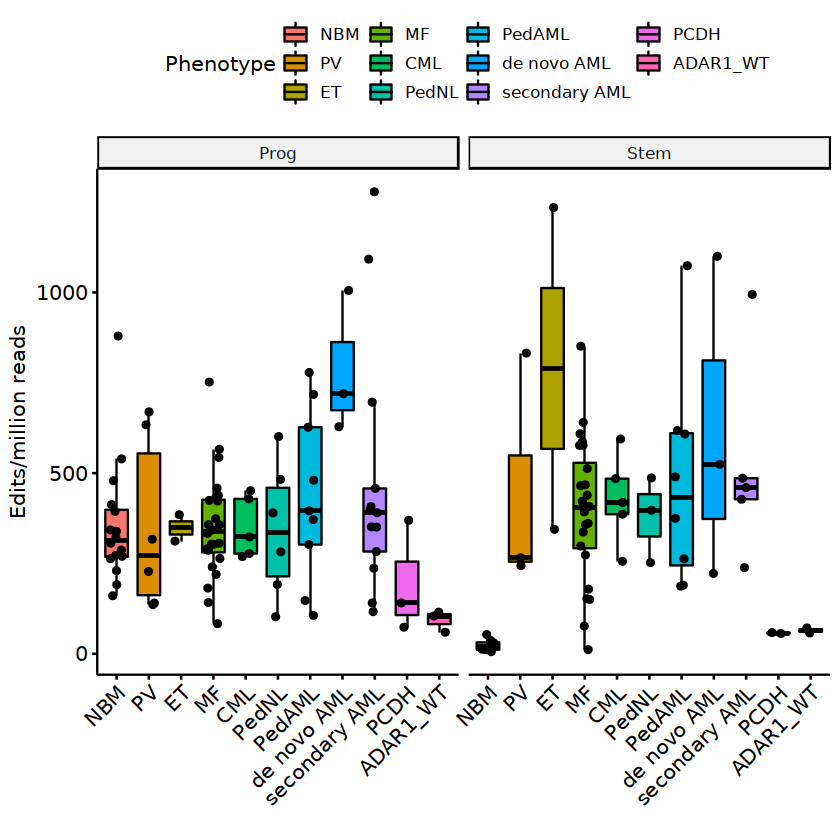

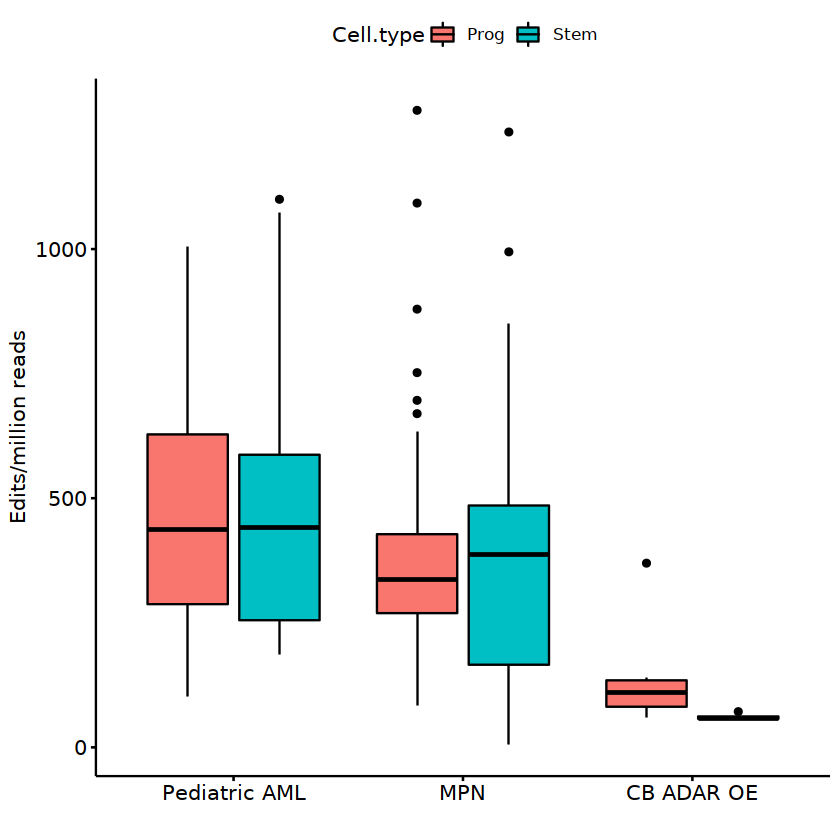

In [32]:
All_ds <- cbind.data.frame(dataset=c(rep("Pediatric AML", nrow(ped_meta)), rep("MPN", nrow(MPN_meta)), 
                           rep("CB ADAR OE", nrow(CB_meta2))), 
                 rbind.data.frame(ped_meta[c("Phenotype", "Cell.type", "edits", "editspermillion")], 
                                  MPN_meta[c("Phenotype", "Cell.type", "edits", "editspermillion")], 
                                  CB_meta2[c("Phenotype", "Cell.type", "edits", "editspermillion")]))
All_ds$Phenotype <- factor(as.character(All_ds$Phenotype), 
                           levels=c("NBM", "PV", "ET", "MF", "CML",
                                    "PedNL", "PedAML", "de novo AML", "secondary AML",
                                    "PCDH", "ADAR1_WT"))
head(All_ds)
#pdf(file="DerWerf_AllDatasets_EditsPerMillion_boxplot.pdf", width=8, height=6)
ggboxplot(All_ds, x="Phenotype", y="editspermillion", fill="Phenotype", xlab="", add="jitter", 
          ylab="Edits/milalion reads"#,
         #palette=c("#657991", "#C4C7C9")
         ) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + facet_grid(~Cell.type)
#dev.off()

ggboxplot(All_ds, x="dataset", y="editspermillion", fill="Cell.type", xlab="", #add="jitter",
          ylab="Edits/million reads") 


               
                NBM PV ET MF CML PedNL PedAML de novo AML secondary AML PCDH
  MPN            24  9  4 48  10     0      0           0            18    0
  Pediatric AML   0  0  0  0   0     0      0           6             0    0
               
                ADAR1_WT
  MPN                  0
  Pediatric AML        0

,dataset,Phenotype,Cell.type,edits,editspermillion,Cell_type
,<chr>,<fct>,<chr>,<table>,<table>,<fct>
04id11474HSC,Pediatric AML,de novo AML,Stem,5664,222.3116,HSC
02id11251HSC,Pediatric AML,de novo AML,Stem,11546,524.3747,HSC
07x00023xPLUSPLUS,Pediatric AML,de novo AML,Prog,33753,1005.4411,HPC
09x00020xPLUSPLUS,Pediatric AML,de novo AML,Prog,19486,628.3650,HPC
10x00082xPLUSMINS,Pediatric AML,de novo AML,Stem,27088,1099.8609,HSC
11x00082xPLUSPLUS,Pediatric AML,de novo AML,Prog,33956,719.8773,HPC


Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Don't know how to automatically pick scale for object of type table. Defaulting to continuous.



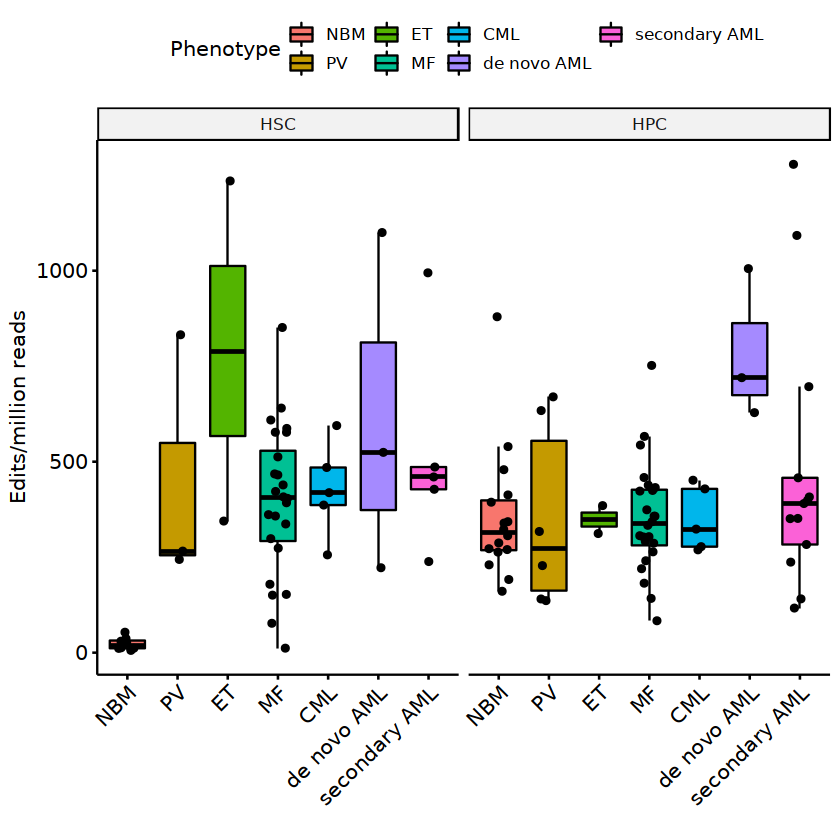

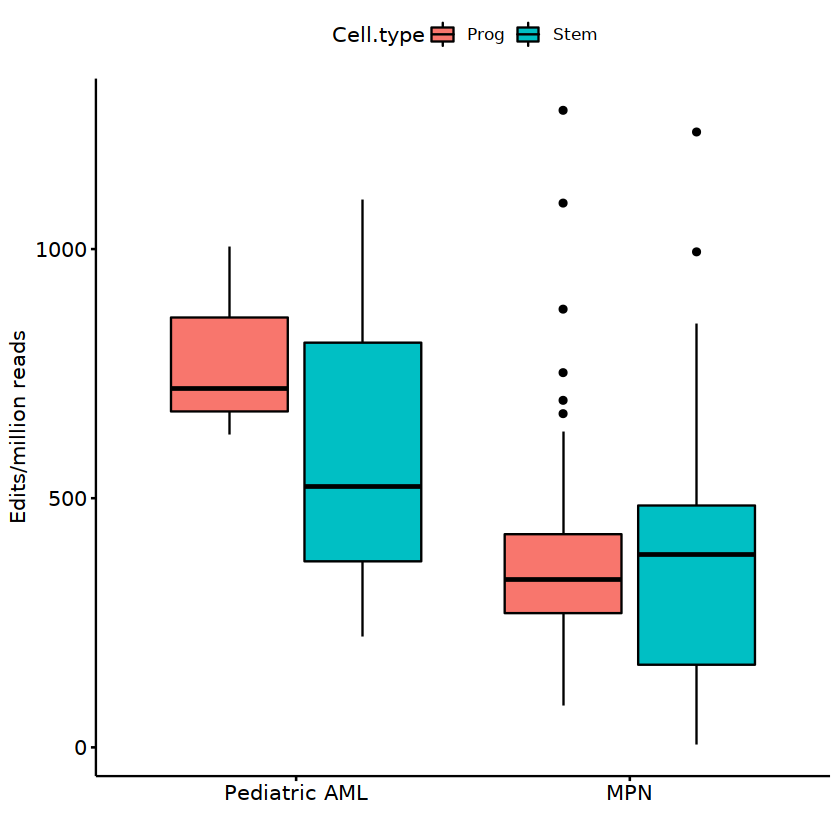

In [39]:
All_ds_filt <- All_ds[!as.character(All_ds$Phenotype) %in% c("PedNL", "PedAML", "PCDH", "ADAR1_WT"),]
table(All_ds_filt$dataset, All_ds_filt$Phenotype)
All_ds_filt$Phenotype <- factor(as.character(All_ds_filt$Phenotype), 
                           levels=c("NBM", "PV", "ET", "MF", "CML",
                                    "de novo AML", "secondary AML"))
All_ds_filt$Cell_type <- factor(gsub("Stem", "HSC", gsub("Prog", "HPC", as.character(All_ds_filt$Cell.type))), 
                                levels=c("HSC", "HPC"))
head(All_ds_filt)
#pdf(file="DerWerf_AllDatasets_EditsPerMillion_boxplot.pdf", width=8, height=6)
ggboxplot(All_ds_filt, x="Phenotype", y="editspermillion", fill="Phenotype", xlab="", add="jitter", 
          ylab="Edits/million reads"#,
         #palette=c("#657991", "#C4C7C9")
         ) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + facet_grid(~Cell_type)
#dev.off()

ggboxplot(All_ds_filt, x="dataset", y="editspermillion", fill="Cell.type", xlab="", #add="jitter",
          ylab="Edits/million reads") 


In [37]:
All_ds_withADAR <- cbind.data.frame(dataset=c(rep("Pediatric AML", nrow(ped_meta)), rep("CB ADAR OE", nrow(CB_meta2))), 
                 rbind.data.frame(ped_meta[c("Phenotype", "Cell.type", "edits", "editspermillion",
                                             "ADARp110", "ADARp150", "ADARratio")], 
                                  CB_meta2[c("Phenotype", "Cell.type", "edits", "editspermillion",
                                             "ADARp110", "ADARp150", "ADARratio")]))
table(All_ds_withADAR$Phenotype)
All_ds_withADAR$Phenotype <- factor(as.character(All_ds_withADAR$Phenotype), 
                           levels=c("PedNL", "PedAML", "de novo AML", "PCDH", "ADAR1_WT"))
All_ds_withADAR


   ADAR1_WT de novo AML        PCDH      PedAML       PedNL 
          5           6           5          17           9 

,dataset,Phenotype,Cell.type,edits,editspermillion,ADARp110,ADARp150,ADARratio
,<chr>,<fct>,<chr>,<table>,<table>,<dbl>,<dbl>,<dbl>
01id38cellHSC,Pediatric AML,PedAML,Stem,7804,190.09556,6.6356140,7.532720,0.89710616
02id38cellPROGENITORS,Pediatric AML,PedAML,Prog,3598,106.19739,5.6290729,7.779699,2.15062646
cell05id90HSC,Pediatric AML,PedAML,Stem,6136,187.32341,6.9392060,6.971302,0.03209649
06id90cellPROGENITORS,Pediatric AML,PedAML,Prog,12337,371.56298,0.9283319,7.259562,6.33122988
03id78cellHSC,Pediatric AML,PedAML,Stem,7524,263.02612,5.7808783,7.496232,1.71535373
04id78cellPROGENITORS,Pediatric AML,PedAML,Prog,6142,147.53038,6.9681447,7.583469,0.61532467
05id00066HSC,Pediatric AML,PedAML,Stem,5961,374.95559,6.9397465,7.931637,0.99189062
06id00066PRO,Pediatric AML,PedAML,Prog,23411,778.59636,5.6344767,7.966045,2.33156838
04id11474HSC,Pediatric AML,de novo AML,Stem,5664,222.31163,5.7523703,7.685708,1.93333786


Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


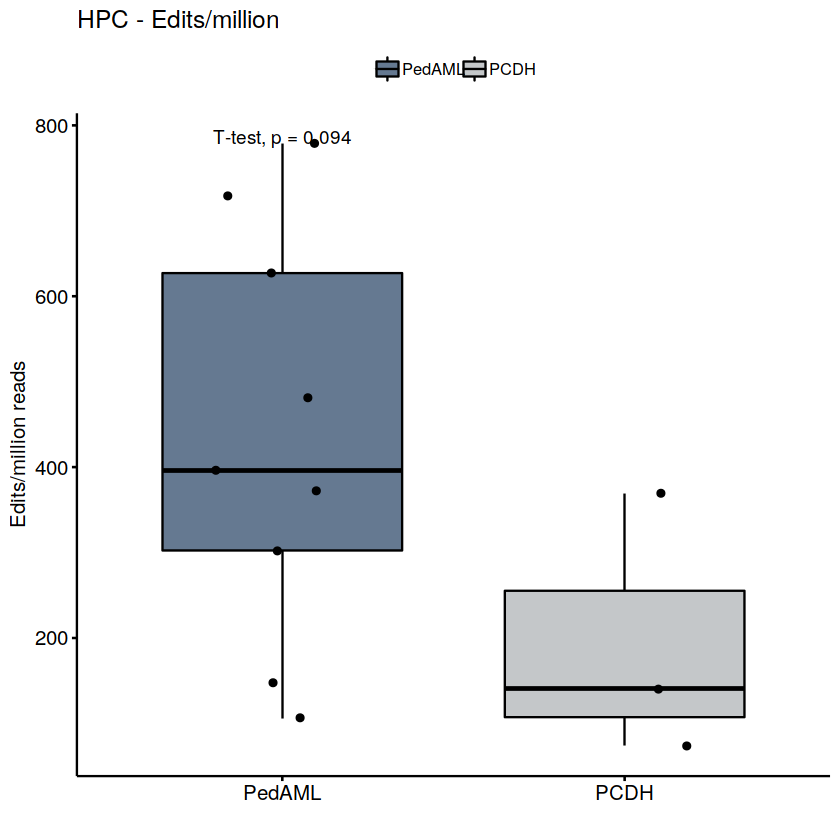

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


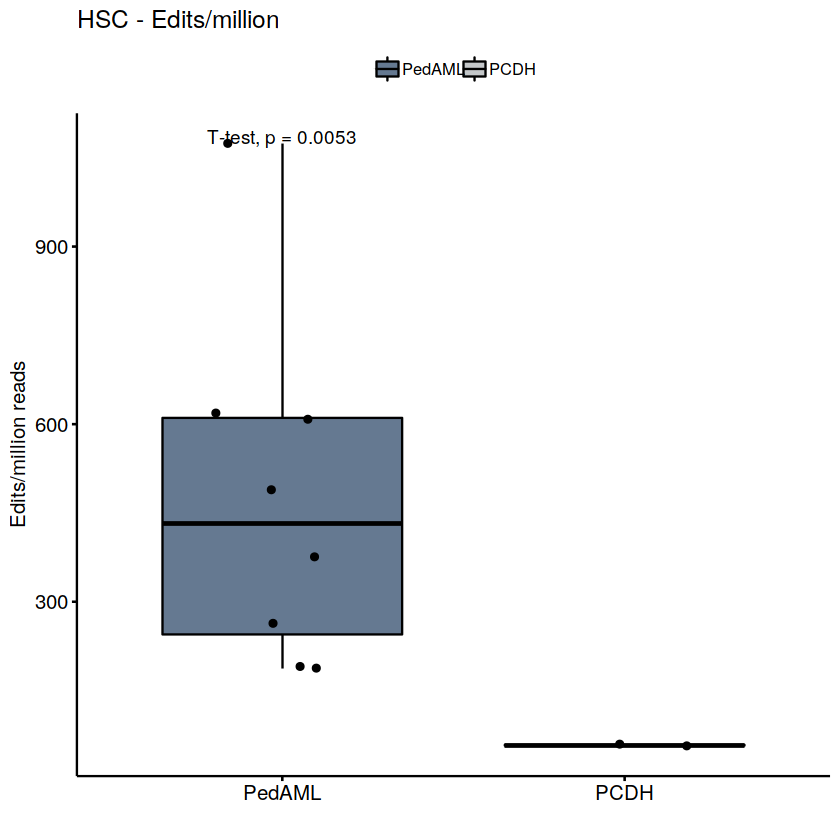

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


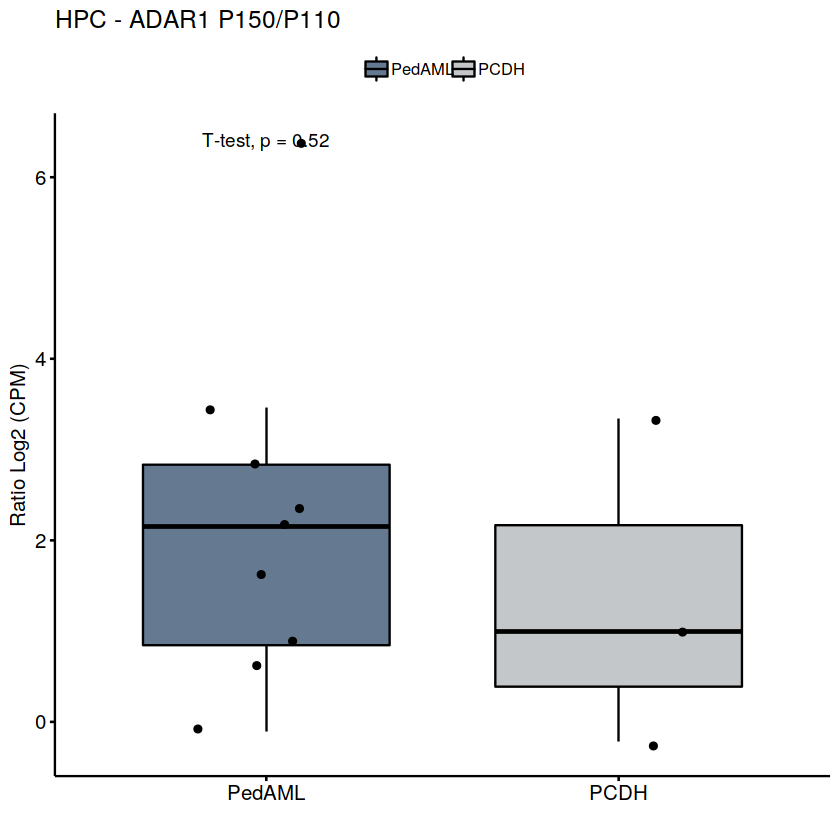

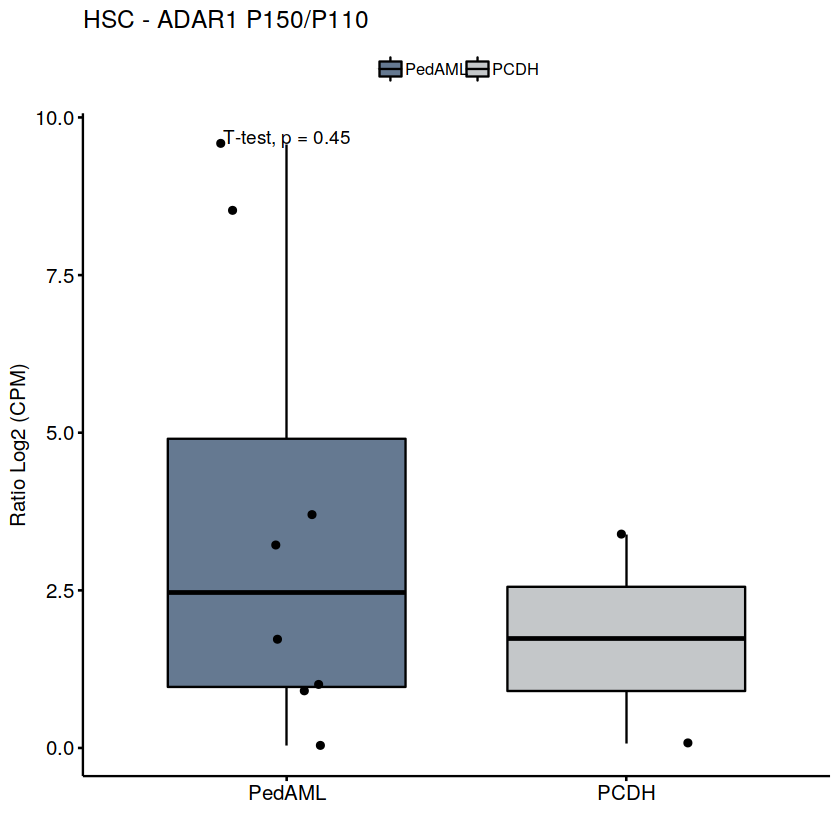

In [38]:
#pdf(file="DerWerf_Prog_PedAML_PCDH_EditsPerMillion_boxplot.pdf", width=5, height=6)
ggboxplot(All_ds_withADAR[All_ds_withADAR$Phenotype %in% c("PedAML", "PCDH") & 
                          All_ds_withADAR$Cell.type %in% c("Prog"),], x="Phenotype", add="jitter", #x="Cell.type",
          y="editspermillion", fill="Phenotype", xlab="", ylab="Edits/million reads", main="HPC - Edits/million",
         palette=c("#657991", "#C4C7C9")) + theme(legend.title=element_text(size=0)) + 
            stat_compare_means(method="t.test", ref.group="PCDH")
#dev.off()
#pdf(file="DerWerf_Stem_PedAML_PCDH_EditsPerMillion_boxplot.pdf", width=5, height=6)
ggboxplot(All_ds_withADAR[All_ds_withADAR$Phenotype %in% c("PedAML", "PCDH") & 
                          All_ds_withADAR$Cell.type %in% c("Stem"),], x="Phenotype", add="jitter", #x="Cell.type", 
          y="editspermillion", fill="Phenotype", xlab="", ylab="Edits/million reads", main="HSC - Edits/million",
         palette=c("#657991", "#C4C7C9")) + theme(legend.title=element_text(size=0)) + 
            stat_compare_means(method="t.test", ref.group="PCDH")
#dev.off()
#pdf(file="DerWerf_Prog_PedAML_PCDH_ADARratio_boxplot.pdf", width=5, height=6)
ggboxplot(All_ds_withADAR[All_ds_withADAR$Phenotype %in% c("PedAML", "PCDH") & 
                          All_ds_withADAR$Cell.type %in% c("Prog"),], x="Phenotype", add="jitter", #x="Cell.type", 
          y="ADARratio", fill="Phenotype", xlab="", ylab="Ratio Log2 (CPM)", main="HPC - ADAR1 P150/P110",
         palette=c("#657991", "#C4C7C9")) + theme(legend.title=element_text(size=0)) + 
            stat_compare_means(method="t.test", ref.group="PCDH")
#dev.off()
#pdf(file="DerWerf_Stem_PedAML_PCDH_ADARratio_boxplot.pdf", width=5, height=6)
ggboxplot(All_ds_withADAR[All_ds_withADAR$Phenotype %in% c("PedAML", "PCDH") & 
                          All_ds_withADAR$Cell.type %in% c("Stem"),], x="Phenotype", add="jitter", #x="Cell.type", 
          y="ADARratio", fill="Phenotype", xlab="", ylab="Ratio Log2 (CPM)", main="HSC - ADAR1 P150/P110",
         palette=c("#657991", "#C4C7C9")) + theme(legend.title=element_text(size=0)) + 
            stat_compare_means(method="t.test", ref.group="PCDH")
#dev.off()


Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



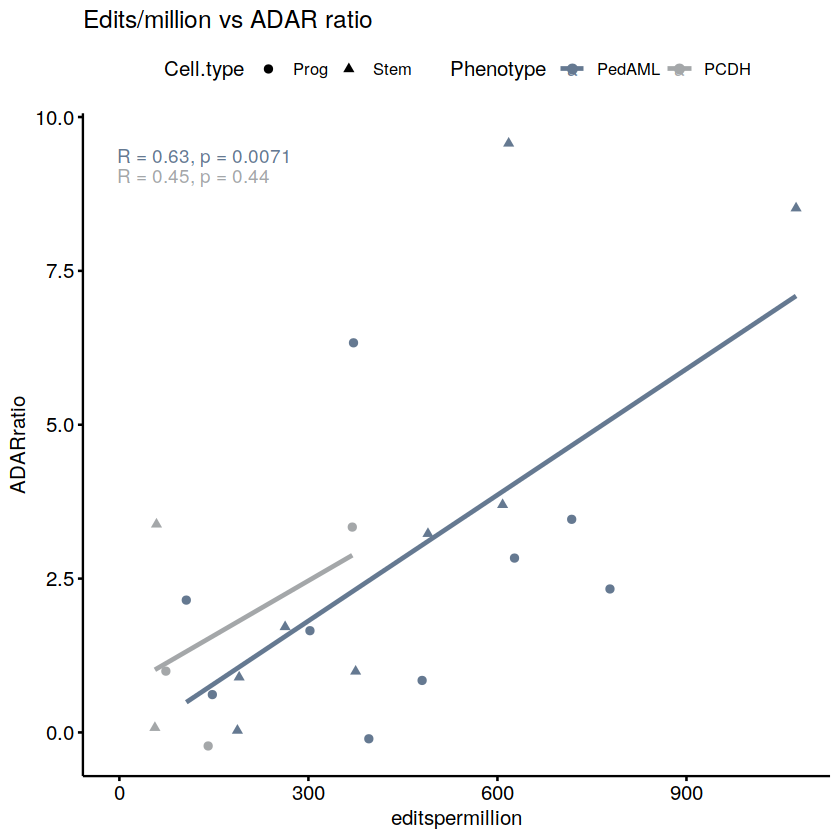

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Computation failed in `stat_cor()`:
not enough finite observations”


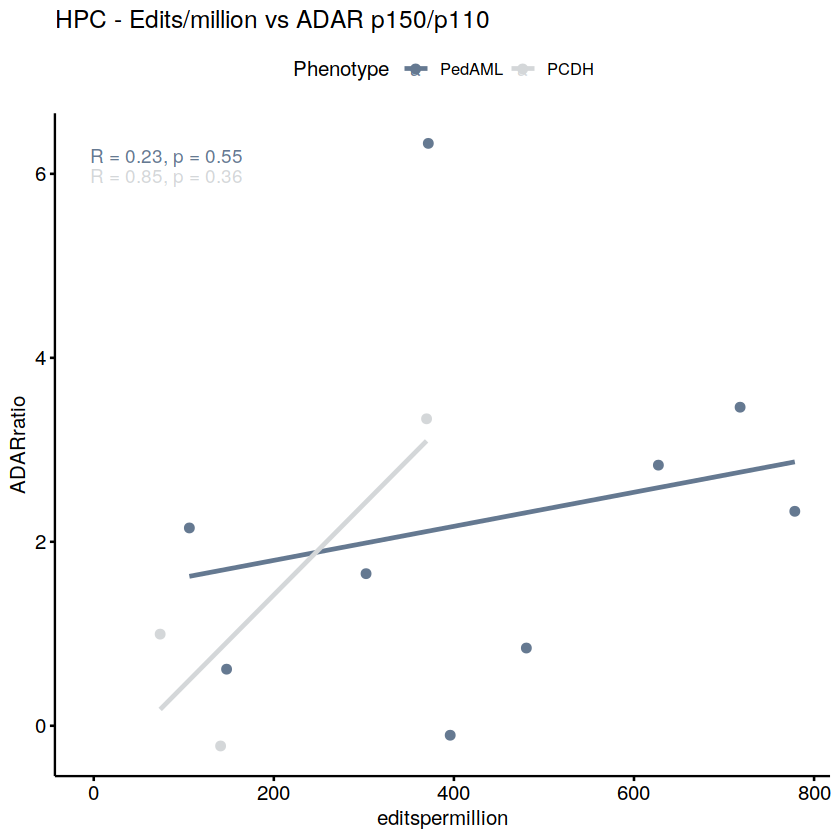

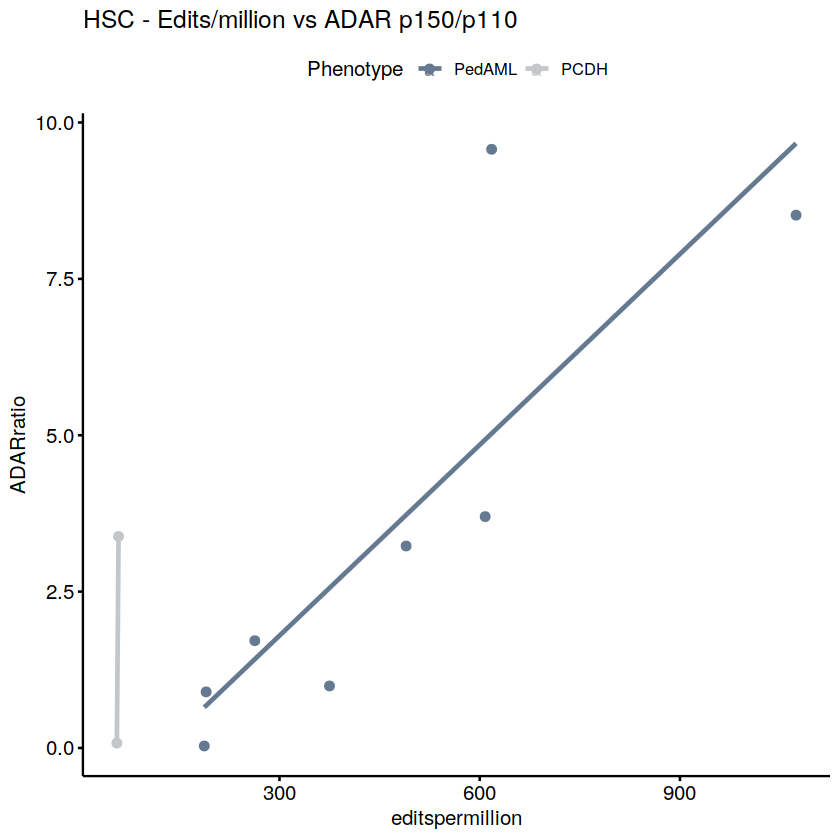

In [39]:
#pdf(file="DerWerf_PedAML_PCDH_Editspermillion_ADARratio_allCells_06252021.pdf", width=7, height=7)
ggscatter(All_ds_withADAR[All_ds_withADAR$Phenotype %in% c("PedAML", "PCDH"),], x="editspermillion", y="ADARratio", main="Edits/million vs ADAR ratio",
          col="Phenotype", shape="Cell.type", palette=c("#657991", "#A4A7A9"), add="reg.line") + 
        stat_cor(aes(col=Phenotype), output.type = "text", label.x = -4, na.rm=TRUE) 
#dev.off()
#pdf(file="DerWerf_Prog_PedAML_PCDH_Editspermillion_ADARratio_06252021.pdf", width=7, height=7)
ggscatter(All_ds_withADAR[All_ds_withADAR$Phenotype %in% c("PedAML", "PCDH") & 
                          All_ds_withADAR$Cell.type %in% c("Prog"),], x="editspermillion", y="ADARratio", 
          col="Phenotype",  main="HPC - Edits/million vs ADAR p150/p110", palette=c("#657991", "#D4D7D9"), add="reg.line") + 
stat_cor(aes(col=Phenotype), output.type = "text", label.x = -4, na.rm=TRUE)
#dev.off()

#pdf(file="DerWerf_Stem_PedAML_PCDH_Editspermillion_ADARratio_06252021.pdf", width=7, height=7)
ggscatter(All_ds_withADAR[All_ds_withADAR$Phenotype %in% c("PedAML", "PCDH") & 
                          All_ds_withADAR$Cell.type %in% c("Stem"),], x="editspermillion", y="ADARratio", 
          col="Phenotype",  main="HSC - Edits/million vs ADAR p150/p110", palette=c("#657991", "#C4C7C9"), add="reg.line") + 
stat_cor(aes(col=Phenotype), output.type = "text", label.x = -4, na.rm=TRUE)
#dev.off()


[1] 12783     2

[1] 3895

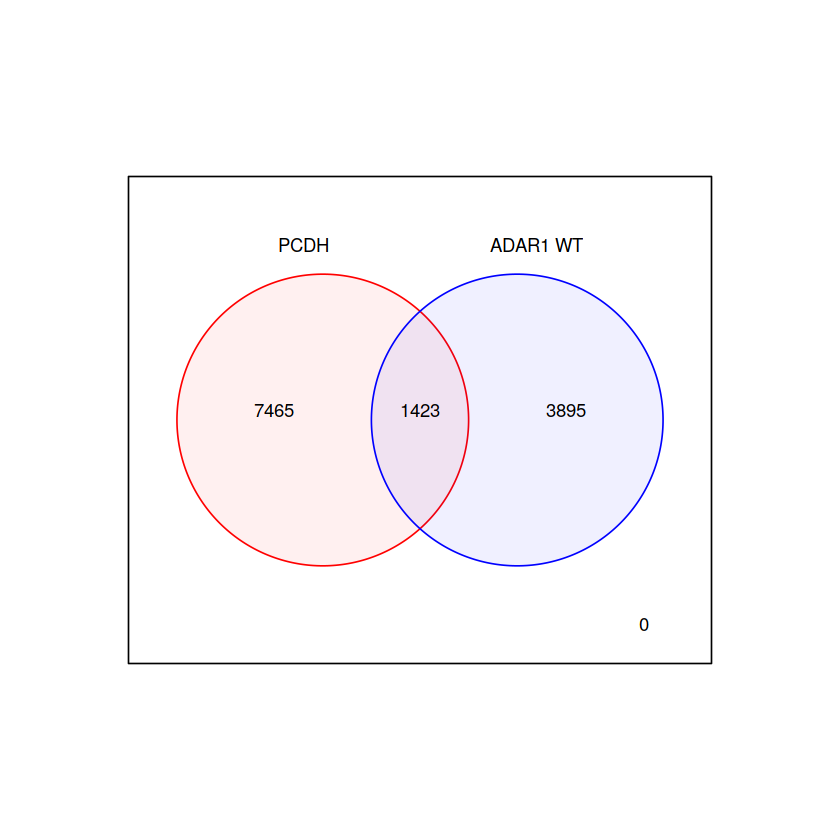

In [40]:
cb_prog_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(paste0(cb_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    cb_editsByPheno.l[[1]]$Start_Position), 
                                                            paste0(cb_editsByPheno.l[[2]]$Chromosome, "_",
                                                                   cb_editsByPheno.l[[2]]$Start_Position)))), ncol=2))
colnames(cb_prog_venn_inp) <- c("PCDH", "ADAR1 WT")
rownames(cb_prog_venn_inp) <- unique(c(paste0(cb_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    cb_editsByPheno.l[[1]]$Start_Position), 
                                                            paste0(cb_editsByPheno.l[[2]]$Chromosome, "_",
                                                                   cb_editsByPheno.l[[2]]$Start_Position)))

cb_prog_venn_inp[which(unique(c(paste0(cb_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    cb_editsByPheno.l[[1]]$Start_Position), 
                                                            paste0(cb_editsByPheno.l[[2]]$Chromosome, "_",
                                                                   cb_editsByPheno.l[[2]]$Start_Position))) %in%
                 paste0(cb_editsByPheno.l[[1]]$Chromosome, "_", cb_editsByPheno.l[[1]]$Start_Position)),1] <- 1                                  
cb_prog_venn_inp[which(unique(c(paste0(cb_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    cb_editsByPheno.l[[1]]$Start_Position), 
                                                            paste0(cb_editsByPheno.l[[2]]$Chromosome, "_",
                                                                   cb_editsByPheno.l[[2]]$Start_Position))) %in% 
                      paste0(cb_editsByPheno.l[[2]]$Chromosome, "_",cb_editsByPheno.l[[2]]$Start_Position)),2] <- 1
dim(cb_prog_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(cb_prog_venn_inp,  circle.col=c("red", "blue"), mar=mar,cex=cex)

cb_prog_wtonly <- rownames(cb_prog_venn_inp)[which(cb_prog_venn_inp[,1] == 0 & 
                                                         cb_prog_venn_inp[,2] == 1)]
length(cb_prog_wtonly)

In [41]:
cb_prog_venn_inp.filt <- cb_prog_venn_inp[cb_prog_venn_inp$PCDH == 0 &
                                               cb_prog_venn_inp$"ADAR1 WT" == 1,]
dim(cb_prog_venn_inp.filt)
cb_prog_adar1_only <- cb_editsByPheno.l[[2]][paste0(cb_editsByPheno.l[[2]]$Chromosome, "_", 
                                                    cb_editsByPheno.l[[2]]$Start_Position) %in% 
                                             rownames(cb_prog_venn_inp.filt),]
dim(cb_prog_adar1_only)
cb_prog_adar1_only_nodup <- cb_prog_adar1_only[!duplicated(cb_prog_adar1_only[,c("Chromosome", "Start_Position")])]
dim(cb_prog_adar1_only_nodup)
table(cb_prog_adar1_only_nodup$Variant_Classification)

[1] 3895    2

[1] 4190  137

[1] 3895  137


          3'Flank             3'UTR           5'Flank             5'UTR 
              760               751               102                13 
           Intron Missense_Mutation               RNA            Silent 
             2193                 7                65                 4 

In [43]:
PedAML_Prog_unievents <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/rMATSv4.1_SplicingResults/DeWerf_PediatricAML_rMATSv4.1_DiffSplicing_PSIfilt_SkipExon_PedAMLvsPedNL_Prog_NoOverlap_PedAMLvAdultAML.csv", 
                                 header=FALSE, skip =1)
dim(PedAML_Prog_unievents)
all_content = readLines("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/rMATSv4.1_SplicingResults/DeWerf_PediatricAML_rMATSv4.1_DiffSplicing_PSIfilt_SkipExon_PedAMLvsPedNL_Prog_NoOverlap_PedAMLvAdultAML.csv")
colnames(PedAML_Prog_unievents)[1:23] <- unlist(strsplit(all_content[1], split = ","))
head(PedAML_Prog_unievents)


[1] 2068   62

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,⋯,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,250,ENSG00000160218,TRAPPC10,chr21,+,44091922,44092049,44088038,44089933,44094062,⋯,0.852,0.650,0.793,0.979,0.841,0.945,0.874,0.657,0.699,0.116
2,358,ENSG00000157601,MX1,chr21,+,41427205,41427304,41422755,41422911,41427754,⋯,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,-0.209
3,426,ENSG00000205581,HMGN1,chr21,-,39345829,39345958,39345145,39345274,39348291,⋯,0.166,0.280,0.232,0.121,0.376,0.121,0.127,0.356,0.438,-0.116
4,483,ENSG00000183527,PSMG1,chr21,-,39179923,39179986,39177434,39177571,39180284,⋯,0.930,0.744,0.795,0.992,0.528,0.978,0.981,0.521,0.502,0.185
5,646,ENSG00000159147,DONSON,chr21,-,33583487,33583666,33582164,33582246,33584589,⋯,0.509,0.488,0.631,0.777,0.154,0.719,0.883,0.255,0.659,0.219
6,676,ENSG00000159086,PAXBP1,chr21,-,32743247,32743314,32738172,32738319,32743677,⋯,0.986,0.622,0.853,0.906,0.904,0.899,0.916,0.647,0.505,0.117


In [44]:
table(unique(cb_prog_adar1_only_nodup$Hugo_Symbol) %in% PedAML_Prog_unievents$geneSymbol)
unigenes_overlap <- unique(cb_prog_adar1_only_nodup$Hugo_Symbol)[unique(cb_prog_adar1_only_nodup$Hugo_Symbol) %in% 
                                                                 PedAML_Prog_unievents$geneSymbol]
CB_Prog_UniqueEditEvents_overlap <- cb_prog_adar1_only[cb_prog_adar1_only$Hugo_Symbol %in% unigenes_overlap,]
PedAML_Prog_SpliceUniqueEvents_overlap <- PedAML_Prog_unievents[PedAML_Prog_unievents$geneSymbol %in% unigenes_overlap,]
#write.csv(CB_Prog_UniqueEditEvents_overlap, file="CB_ADAR_OE_Prog_UniqueEditEvents_PedAML_UniqueSpliceEvents_overlap.csv")
#write.csv(PedAML_Prog_SpliceUniqueEvents_overlap, file="PedAML_UniqueSpliceEvents_CB_ADAR_OE_Prog_UniqueEditEvents.csv")


FALSE  TRUE 
 1577   247 

[1] 3862    2

[1] 1844

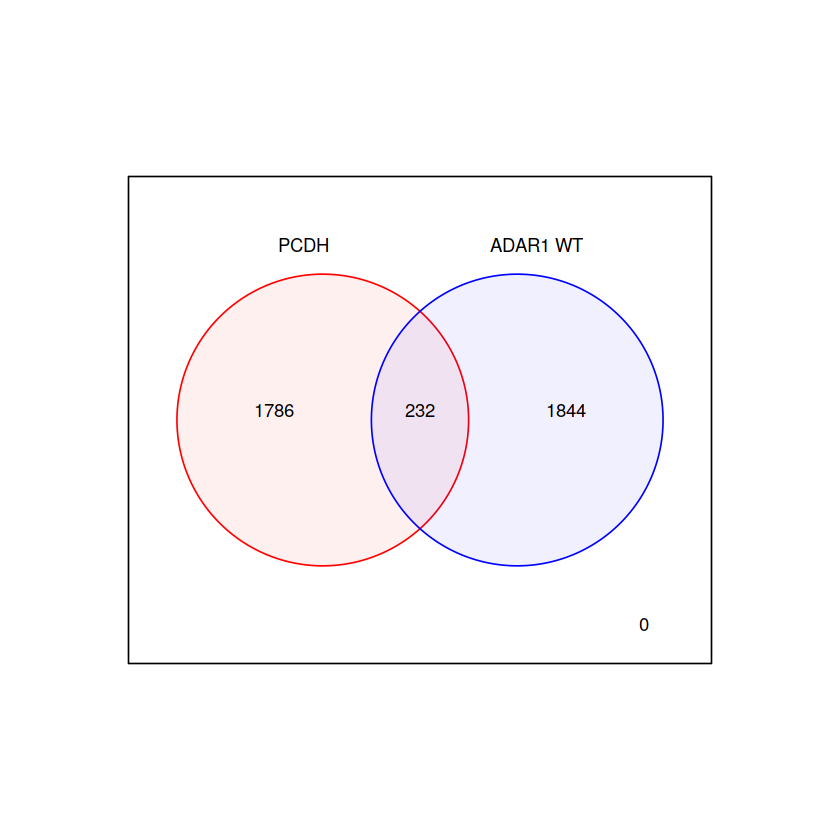

In [45]:
cb_stem_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(paste0(cb_editsByPheno.l[[5]]$Chromosome, "_",
                                                                    cb_editsByPheno.l[[5]]$Start_Position), 
                                                            paste0(cb_editsByPheno.l[[6]]$Chromosome, "_",
                                                                   cb_editsByPheno.l[[6]]$Start_Position)))), ncol=2))
colnames(cb_stem_venn_inp) <- c("PCDH", "ADAR1 WT")
rownames(cb_stem_venn_inp) <- unique(c(paste0(cb_editsByPheno.l[[5]]$Chromosome, "_",
                                                                    cb_editsByPheno.l[[5]]$Start_Position), 
                                                            paste0(cb_editsByPheno.l[[6]]$Chromosome, "_",
                                                                   cb_editsByPheno.l[[6]]$Start_Position)))
cb_stem_venn_inp[which(unique(c(paste0(cb_editsByPheno.l[[5]]$Chromosome, "_", cb_editsByPheno.l[[5]]$Start_Position), 
                                                            paste0(cb_editsByPheno.l[[6]]$Chromosome, "_",
                                                                   cb_editsByPheno.l[[6]]$Start_Position))) %in%
                 paste0(cb_editsByPheno.l[[5]]$Chromosome, "_", cb_editsByPheno.l[[5]]$Start_Position)),1] <- 1                                  
cb_stem_venn_inp[which(unique(c(paste0(cb_editsByPheno.l[[5]]$Chromosome, "_",cb_editsByPheno.l[[5]]$Start_Position), 
                                                            paste0(cb_editsByPheno.l[[6]]$Chromosome, "_",
                                                                   cb_editsByPheno.l[[6]]$Start_Position))) %in% 
                      paste0(cb_editsByPheno.l[[6]]$Chromosome, "_",cb_editsByPheno.l[[6]]$Start_Position)),2] <- 1
dim(cb_stem_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(cb_stem_venn_inp,  circle.col=c("red", "blue"), mar=mar,cex=cex)  

cb_stem_wtonly <- rownames(cb_stem_venn_inp)[which(cb_stem_venn_inp[,1] == 0 & 
                                                         cb_stem_venn_inp[,2] == 1)]
length(cb_stem_wtonly)

In [46]:
cb_stem_venn_inp.filt <- cb_stem_venn_inp[cb_stem_venn_inp$PCDH == 0 &
                                               cb_stem_venn_inp$"ADAR1 WT" == 1,]
dim(cb_stem_venn_inp.filt)
cb_stem_adar1_only <- cb_editsByPheno.l[[6]][paste0(cb_editsByPheno.l[[6]]$Chromosome, "_", 
                                                    cb_editsByPheno.l[[6]]$Start_Position) %in% 
                                             rownames(cb_stem_venn_inp.filt),]
dim(cb_stem_adar1_only)
cb_stem_adar1_only_nodup <- cb_stem_adar1_only[!duplicated(cb_stem_adar1_only[,c("Chromosome", "Start_Position")])]
dim(cb_stem_adar1_only_nodup)
table(cb_stem_adar1_only_nodup$Variant_Classification)

[1] 1844    2

[1] 1998  137

[1] 1844  137


          3'Flank             3'UTR           5'Flank             5'UTR 
              339               492                62                 2 
           Intron Missense_Mutation               RNA            Silent 
              889                 7                52                 1 

In [47]:
PedAML_Stem_unievents <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/rMATSv4.1_SplicingResults/DeWerf_PediatricAML_rMATSv4.1_DiffSplicing_PSIfilt_SkipExon_PedAMLvsPedNL_Stem_NoOverlap_PedAMLvAdultAML.csv", 
                                 header=FALSE, skip =1)
dim(PedAML_Stem_unievents)
all_content = readLines("/mnt/data1/tomw/DeWerf_PedAML_RNASeq/rMATSv4.1_SplicingResults/DeWerf_PediatricAML_rMATSv4.1_DiffSplicing_PSIfilt_SkipExon_PedAMLvsPedNL_Stem_NoOverlap_PedAMLvAdultAML.csv")
colnames(PedAML_Stem_unievents)[1:23] <- unlist(strsplit(all_content[1], split = ","))
head(PedAML_Stem_unievents)


[1] 1718   53

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,⋯,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,42,ENSG00000160299,PCNT,chr21,+,46444693,46444821,46440854,46441084,46445283,⋯,0.913,0.966,0.742,1.000,1.000,1.000,1.000,1.000,1.000,-0.181
2,95,ENSG00000186866,POFUT2,chr21,-,45277232,45277773,45277016,45277142,45278102,⋯,0.060,0.000,0.064,0.044,0.007,0.009,0.118,0.000,0.000,0.135
3,102,ENSG00000186866,POFUT2,chr21,-,45283382,45283527,45282368,45282398,45285677,⋯,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,-0.139
4,313,ENSG00000182093,WRB,chr21,+,39393165,39393280,39391768,39391836,39396865,⋯,0.939,0.994,0.913,0.969,0.973,0.874,0.910,0.988,0.540,-0.355
5,601,ENSG00000156253,RWDD2B,chr21,-,29007760,29008123,29004383,29006651,29008394,⋯,0.698,0.917,0.862,0.929,0.793,0.533,0.889,0.983,1.000,0.155
6,804,ENSG00000100429,HDAC10,chr22,-,50248661,50248751,50248224,50248472,50249327,⋯,1.000,0.931,1.000,1.000,0.860,0.936,1.000,1.000,0.827,-0.228


In [48]:
table(unique(cb_stem_adar1_only_nodup$Hugo_Symbol) %in% PedAML_Stem_unievents$geneSymbol)
unigenes_overlap <- unique(cb_stem_adar1_only_nodup$Hugo_Symbol)[unique(cb_stem_adar1_only_nodup$Hugo_Symbol) %in% 
                                                                 PedAML_Stem_unievents$geneSymbol]
CB_Stem_UniqueEditEvents_overlap <- cb_stem_adar1_only[cb_stem_adar1_only$Hugo_Symbol %in% unigenes_overlap,]
PedAML_Stem_SpliceUniqueEvents_overlap <- PedAML_Stem_unievents[PedAML_Stem_unievents$geneSymbol %in% unigenes_overlap,]
#write.csv(CB_Stem_UniqueEditEvents_overlap, file="CB_ADAR_OE_Stem_UniqueEditEvents_PedAML_UniqueSpliceEvents_overlap.csv")
#write.csv(PedAML_Stem_SpliceUniqueEvents_overlap, file="PedAML_UniqueSpliceEvents_CB_ADAR_OE_Stem_UniqueEditEvents.csv")


FALSE  TRUE 
  863   120 

[1] 3538    2

[1] 626

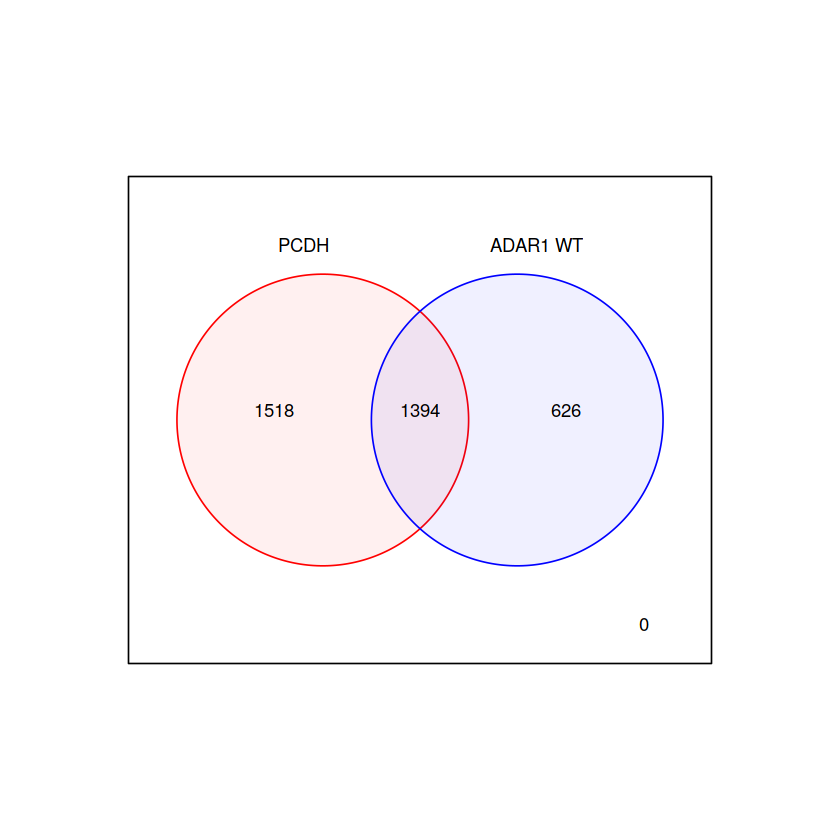

In [49]:
cb_prog_gn_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(cb_editsByPheno.l[[1]]$Hugo_Symbol, 
                                   cb_editsByPheno.l[[2]]$Hugo_Symbol))), ncol=2))
colnames(cb_prog_gn_venn_inp) <- c("PCDH", "ADAR1 WT")
rownames(cb_prog_gn_venn_inp) <- unique(c(cb_editsByPheno.l[[1]]$Hugo_Symbol, 
                                   cb_editsByPheno.l[[2]]$Hugo_Symbol))
cb_prog_gn_venn_inp[which(unique(c(cb_editsByPheno.l[[1]]$Hugo_Symbol,  cb_editsByPheno.l[[2]]$Hugo_Symbol)) %in%
                          cb_editsByPheno.l[[1]]$Hugo_Symbol),1] <- 1                                  
cb_prog_gn_venn_inp[which(unique(c(cb_editsByPheno.l[[1]]$Hugo_Symbol,  cb_editsByPheno.l[[2]]$Hugo_Symbol)) %in% 
                          cb_editsByPheno.l[[2]]$Hugo_Symbol),2] <- 1
dim(cb_prog_gn_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(cb_prog_gn_venn_inp,  circle.col=c("red", "blue"), mar=mar,cex=cex)  

cb_prog_gn_wtonly <- rownames(cb_prog_gn_venn_inp)[which(cb_prog_gn_venn_inp[,1] == 0 & 
                                                         cb_prog_gn_venn_inp[,2] == 1)]
length(cb_prog_gn_wtonly)

[1] 1648    2

[1] 620

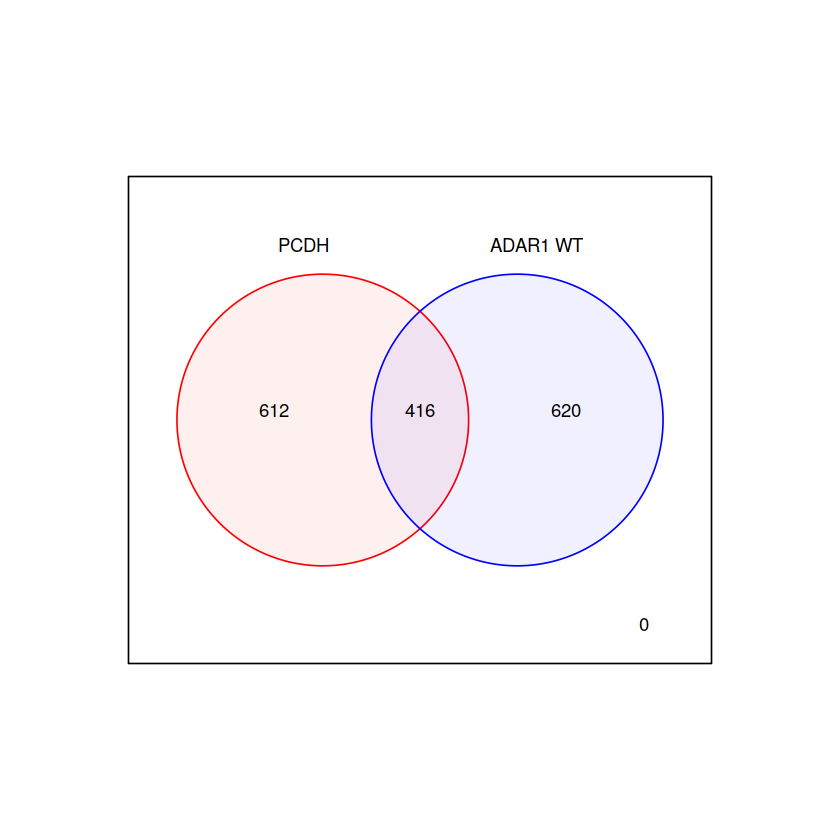

In [50]:
cb_stem_gn_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(cb_editsByPheno.l[[5]]$Hugo_Symbol, 
                                   cb_editsByPheno.l[[6]]$Hugo_Symbol))), ncol=2))
colnames(cb_stem_gn_venn_inp) <- c("PCDH", "ADAR1 WT")
rownames(cb_stem_gn_venn_inp) <- unique(c(cb_editsByPheno.l[[5]]$Hugo_Symbol, 
                                   cb_editsByPheno.l[[6]]$Hugo_Symbol))
cb_stem_gn_venn_inp[which(unique(c(cb_editsByPheno.l[[5]]$Hugo_Symbol,  cb_editsByPheno.l[[6]]$Hugo_Symbol)) %in%
                          cb_editsByPheno.l[[5]]$Hugo_Symbol),1] <- 1                                  
cb_stem_gn_venn_inp[which(unique(c(cb_editsByPheno.l[[5]]$Hugo_Symbol,  cb_editsByPheno.l[[6]]$Hugo_Symbol)) %in% 
                          cb_editsByPheno.l[[6]]$Hugo_Symbol),2] <- 1
dim(cb_stem_gn_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(cb_stem_gn_venn_inp,  circle.col=c("red", "blue"), mar=mar,cex=cex)  

cb_stem_gn_wtonly <- rownames(cb_stem_gn_venn_inp)[which(cb_stem_gn_venn_inp[,1] == 0 & 
                                                         cb_stem_gn_venn_inp[,2] == 1)]
length(cb_stem_gn_wtonly)

[1] 217434      4

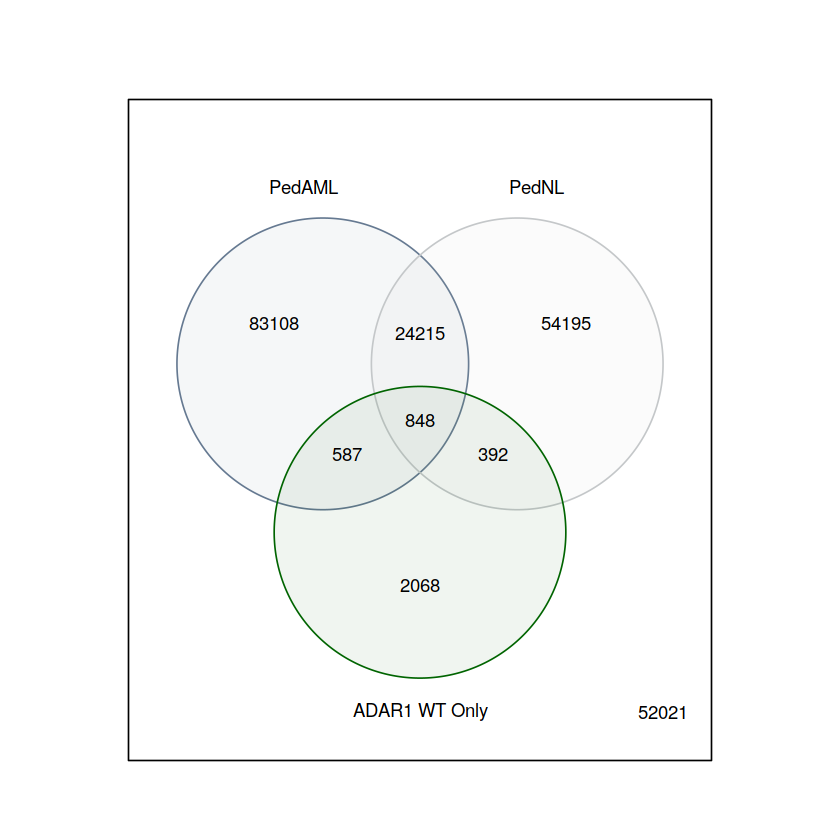

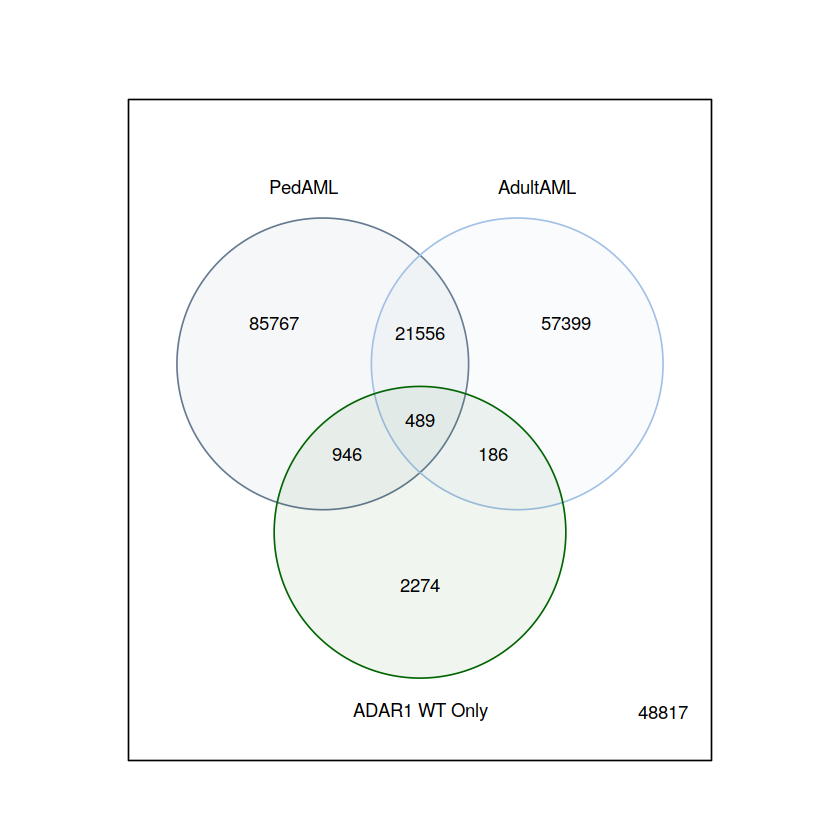

In [51]:
ped_prog_PedNLvPedAML_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[1]]$Start_Position), 
                 paste0(ped_editsByPheno.l[[2]]$Chromosome, "_", ped_editsByPheno.l[[2]]$Start_Position),
                 paste0(ped_editsByPheno.l[[5]]$Chromosome, "_", ped_editsByPheno.l[[5]]$Start_Position),
                                                                            cb_prog_wtonly))), ncol=4))

colnames(ped_prog_PedNLvPedAML_venn_inp) <- c("PedAML", "PedNL", "AdultAML", "ADAR1 WT Only")
rownames(ped_prog_PedNLvPedAML_venn_inp) <- unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[1]]$Start_Position), 
                 paste0(ped_editsByPheno.l[[2]]$Chromosome, "_", ped_editsByPheno.l[[2]]$Start_Position),
                 paste0(ped_editsByPheno.l[[5]]$Chromosome, "_", ped_editsByPheno.l[[5]]$Start_Position),
                                                                            cb_prog_wtonly))

ped_prog_PedNLvPedAML_venn_inp[which(unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                     ped_editsByPheno.l[[1]]$Start_Position), 
                 paste0(ped_editsByPheno.l[[2]]$Chromosome, "_", ped_editsByPheno.l[[2]]$Start_Position), 
                 paste0(ped_editsByPheno.l[[5]]$Chromosome, "_", ped_editsByPheno.l[[5]]$Start_Position),
                 cb_prog_wtonly)) %in% paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                              ped_editsByPheno.l[[1]]$Start_Position)),1] <- 1                                  
ped_prog_PedNLvPedAML_venn_inp[which(unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[1]]$Start_Position), 
                      paste0(ped_editsByPheno.l[[2]]$Chromosome, "_", ped_editsByPheno.l[[2]]$Start_Position),  
                      paste0(ped_editsByPheno.l[[5]]$Chromosome, "_", ped_editsByPheno.l[[5]]$Start_Position),
                      cb_prog_wtonly)) %in% paste0(ped_editsByPheno.l[[2]]$Chromosome, "_", 
                                                   ped_editsByPheno.l[[2]]$Start_Position)),2] <- 1
ped_prog_PedNLvPedAML_venn_inp[which(unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[1]]$Start_Position), 
                      paste0(ped_editsByPheno.l[[2]]$Chromosome, "_", ped_editsByPheno.l[[2]]$Start_Position),  
                      paste0(ped_editsByPheno.l[[5]]$Chromosome, "_", ped_editsByPheno.l[[5]]$Start_Position),
                      cb_prog_wtonly)) %in% paste0(ped_editsByPheno.l[[5]]$Chromosome, "_", 
                                                   ped_editsByPheno.l[[5]]$Start_Position)),3] <- 1
ped_prog_PedNLvPedAML_venn_inp[which(unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[1]]$Start_Position), 
                      paste0(ped_editsByPheno.l[[2]]$Chromosome, "_", ped_editsByPheno.l[[2]]$Start_Position),  
                      paste0(ped_editsByPheno.l[[5]]$Chromosome, "_", ped_editsByPheno.l[[5]]$Start_Position),
                      cb_prog_wtonly)) %in% cb_prog_wtonly),4] <- 1
dim(ped_prog_PedNLvPedAML_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(ped_prog_PedNLvPedAML_venn_inp[,-3],  circle.col=c("#657991", "#C4C7C9", "dark green"), mar=mar,cex=cex)
vennDiagram(ped_prog_PedNLvPedAML_venn_inp[,-2],  circle.col=c("#657991", "#A2C0E5", "dark green"), mar=mar,cex=cex)

ped_prog_overlaps <- c(PedAML=100*sum(ped_prog_PedNLvPedAML_venn_inp[,1] == 1 & ped_prog_PedNLvPedAML_venn_inp[,4] == 1)/
                       length(cb_prog_wtonly), PedNL=100*sum(ped_prog_PedNLvPedAML_venn_inp[,2] == 1 & 
                                                         ped_prog_PedNLvPedAML_venn_inp[,4] == 1)/length(cb_prog_wtonly),
                       AdultAML=100*sum(ped_prog_PedNLvPedAML_venn_inp[,3] == 1 & 
                                                         ped_prog_PedNLvPedAML_venn_inp[,4] == 1)/length(cb_prog_wtonly))

[1] 111218      2

[1] 111218

[1] 111218      2

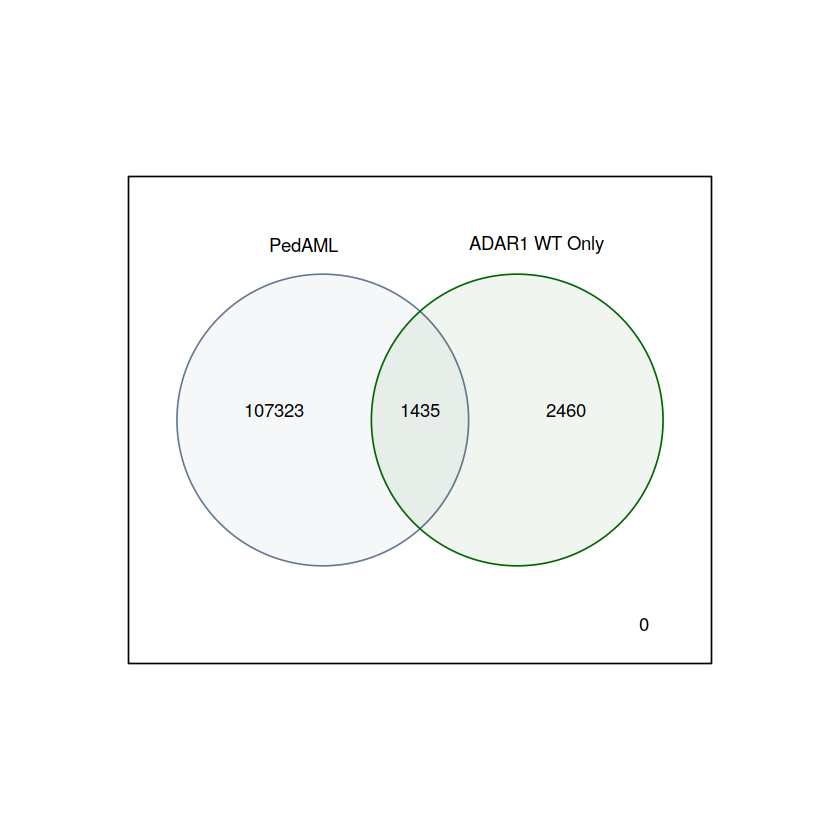

In [52]:
ped_prog_PedAML_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[1]]$Start_Position),
                                                                            cb_prog_wtonly))), ncol=2))

dim(ped_prog_PedAML_venn_inp)
length(unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[1]]$Start_Position),
                                                                            cb_prog_wtonly)))
colnames(ped_prog_PedAML_venn_inp) <- c("PedAML", "ADAR1 WT Only")
rownames(ped_prog_PedAML_venn_inp) <- unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[1]]$Start_Position),
                                                                            cb_prog_wtonly))

ped_prog_PedAML_venn_inp[which(unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                     ped_editsByPheno.l[[1]]$Start_Position),
                 cb_prog_wtonly)) %in% paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                              ped_editsByPheno.l[[1]]$Start_Position)),1] <- 1                                  
ped_prog_PedAML_venn_inp[which(unique(c(paste0(ped_editsByPheno.l[[1]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[1]]$Start_Position),
                      cb_prog_wtonly)) %in% cb_prog_wtonly),2] <- 1
dim(ped_prog_PedAML_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(ped_prog_PedAML_venn_inp,  circle.col=c("#657991", "dark green"), mar=mar,cex=cex)

ped_prog_overlaps <- c(PedAML=100*sum(ped_prog_PedAML_venn_inp[,1] == 1 & ped_prog_PedAML_venn_inp[,2] == 1)/
                       length(cb_prog_wtonly))

[1] 106310      2

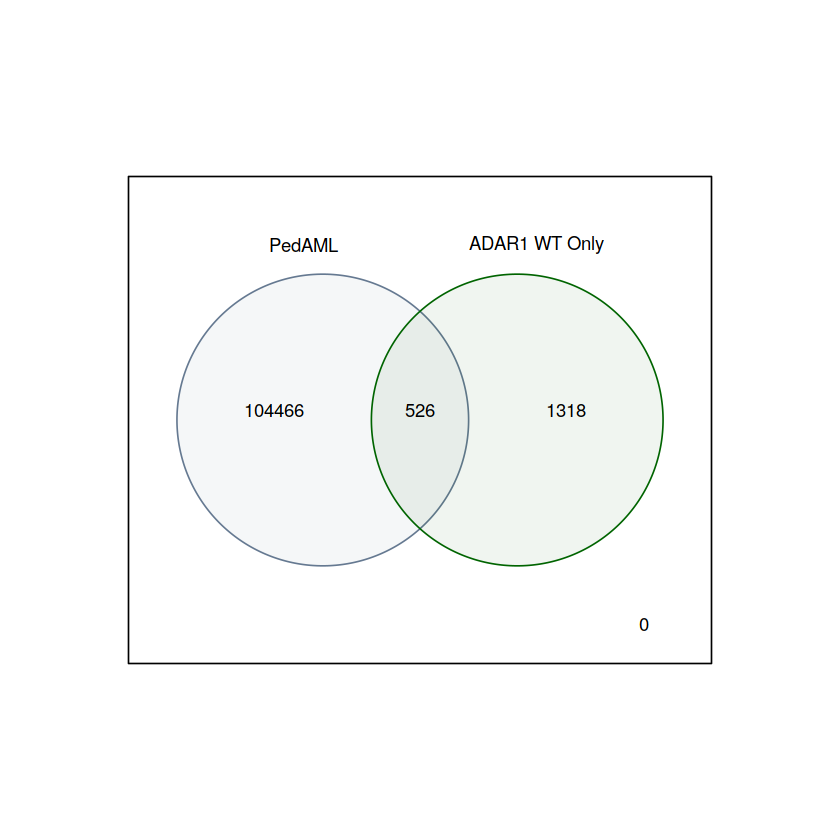

In [53]:
ped_stem_PedAML_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(paste0(ped_editsByPheno.l[[3]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[3]]$Start_Position),
                                                                              cb_stem_wtonly))), ncol=2))

colnames(ped_stem_PedAML_venn_inp) <- c("PedAML", "ADAR1 WT Only")
rownames(ped_stem_PedAML_venn_inp) <- unique(c(paste0(ped_editsByPheno.l[[3]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[3]]$Start_Position),
                                                                            cb_stem_wtonly))

ped_stem_PedAML_venn_inp[which(unique(c(paste0(ped_editsByPheno.l[[3]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[3]]$Start_Position),
                 cb_stem_wtonly)) %in% paste0(ped_editsByPheno.l[[3]]$Chromosome, "_",
                                              ped_editsByPheno.l[[3]]$Start_Position)),1] <- 1                                  
ped_stem_PedAML_venn_inp[which(unique(c(paste0(ped_editsByPheno.l[[3]]$Chromosome, "_",
                                                                    ped_editsByPheno.l[[3]]$Start_Position),
                      cb_stem_wtonly)) %in% cb_stem_wtonly),2] <- 1
dim(ped_stem_PedAML_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(ped_stem_PedAML_venn_inp,  circle.col=c("#657991", "dark green"), mar=mar,cex=cex)

ped_stem_overlaps <- c(PedAML=100*sum(ped_stem_PedAML_venn_inp[,1] == 1 & ped_stem_PedAML_venn_inp[,2] == 1)/
                       length(cb_stem_wtonly))


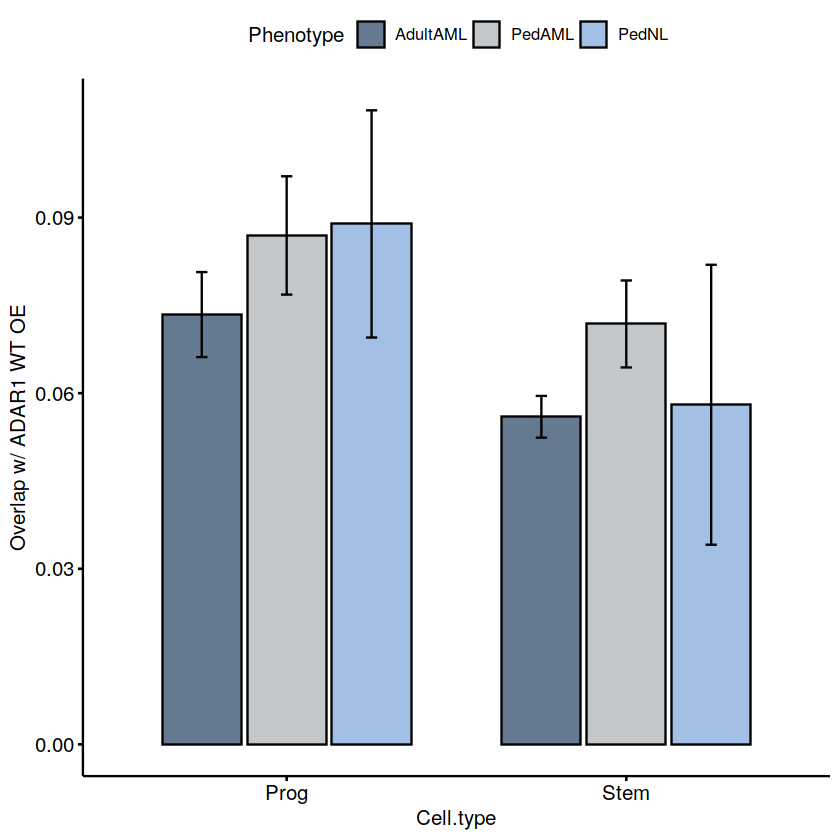

In [54]:
ped_prog_indoverlaps <- do.call(cbind.data.frame, c(list(c(rep("PedAML", length(unique(ped_editsByPheno.l[[1]]$Tumor_Sample_Barcode))), 
                                                         rep("PedNL", length(unique(ped_editsByPheno.l[[2]]$Tumor_Sample_Barcode))), 
                                                         rep("AdultAML", length(unique(ped_editsByPheno.l[[5]]$Tumor_Sample_Barcode))))), 
                                                    list(unlist(lapply(c(1,2,5), function(i) {
    unlist(lapply(unique(ped_editsByPheno.l[[i]]$Tumor_Sample_Barcode), function(x) {
        t <- paste0(ped_editsByPheno.l[[i]]$Chromosome, "_", ped_editsByPheno.l[[i]]$Start_Position)[
            which(ped_editsByPheno.l[[i]]$Tumor_Sample_Barcode %in% x)]
        sum(t %in% cb_prog_wtonly)/length(cb_prog_wtonly)
    }))
    
})))))
colnames(ped_prog_indoverlaps) <- c("Phenotype", "Overlap")
#ped_prog_indoverlaps    
    #paste0(ped_editsByPheno.l[[4]]$Chromosome, "_", ped_editsByPheno.l[[4]]$Start_Position)
#    PedAML=100*sum(ped_prog_PedNLvPedAML_venn_inp[,1] == 1 & ped_prog_PedNLvPedAML_venn_inp[,4] == 1)/
#                       length(cb_prog_wtonly), PedNL=100*sum(ped_prog_PedNLvPedAML_venn_inp[,2] == 1 & 
#                                                         ped_prog_PedNLvPedAML_venn_inp[,4] == 1)/length(cb_prog_wtonly),
#                       AdultAML=100*sum(ped_prog_PedNLvPedAML_venn_inp[,3] == 1 & 
#                                                         ped_prog_PedNLvPedAML_venn_inp[,4] == 1)/length(cb_prog_wtonly))
ped_stem_indoverlaps <- do.call(cbind.data.frame, c(list(c(rep("PedAML", length(unique(ped_editsByPheno.l[[3]]$Tumor_Sample_Barcode))), 
                                                         rep("PedNL", length(unique(ped_editsByPheno.l[[4]]$Tumor_Sample_Barcode))), 
                                                         rep("AdultAML", length(unique(ped_editsByPheno.l[[6]]$Tumor_Sample_Barcode))))), 
                                                    list(unlist(lapply(c(3,4,6), function(i) {
    unlist(lapply(unique(ped_editsByPheno.l[[i]]$Tumor_Sample_Barcode), function(x) {
        t <- paste0(ped_editsByPheno.l[[i]]$Chromosome, "_", ped_editsByPheno.l[[i]]$Start_Position)[
            which(ped_editsByPheno.l[[i]]$Tumor_Sample_Barcode %in% x)]
        sum(t %in% cb_prog_wtonly)/length(cb_prog_wtonly)
    }))
    
}))))) 

#ped_stem_indoverlaps <- c(PedAML=100*sum(ped_stem_PedNLvPedAML_venn_inp[,1] == 1 & ped_stem_PedNLvPedAML_venn_inp[,4] == 1)/
#                       length(cb_stem_wtonly), PedNL=100*sum(ped_stem_PedNLvPedAML_venn_inp[,2] == 1 & 
#                                                         ped_stem_PedNLvPedAML_venn_inp[,4] == 1)/length(cb_stem_wtonly),
#                       AdultAML=100*sum(ped_stem_PedNLvPedAML_venn_inp[,3] == 1 & 
#                                                         ped_stem_PedNLvPedAML_venn_inp[,4] == 1)/length(cb_stem_wtonly))
colnames(ped_stem_indoverlaps) <- c("Phenotype", "Overlap")
#ped_stem_indoverlaps

ped_indoverlaps <- cbind.data.frame(Cell.type=c(rep("Prog", nrow(ped_prog_indoverlaps)), 
                                                rep("Stem", nrow(ped_stem_indoverlaps))),
                                    rbind.data.frame(ped_prog_indoverlaps, ped_stem_indoverlaps))
ped_indoverlaps$Phenotype <- factor(as.character(ped_indoverlaps$Phenotype, levels=c("PedAML", "PedNL", "AdultAML")))
ggbarplot(ped_indoverlaps, x="Cell.type", fill="Phenotype", y="Overlap", add="mean_se",  
          palette=c("#657991", "#C4C7C9", "#A2C0E5"), position=position_dodge(0.75), ylab="Overlap w/ ADAR1 WT OE")

Cell.type,Phenotype,Overlap
<chr>,<fct>,<dbl>
Prog,PedAML,0.07702182
Prog,PedAML,0.08061617
Prog,PedAML,0.12708601
Prog,PedAML,0.06983312
Prog,PedAML,0.13119384
Prog,PedAML,0.11655969
Prog,PedAML,0.06264442
Prog,PedAML,0.04646983
Prog,PedAML,0.07111682


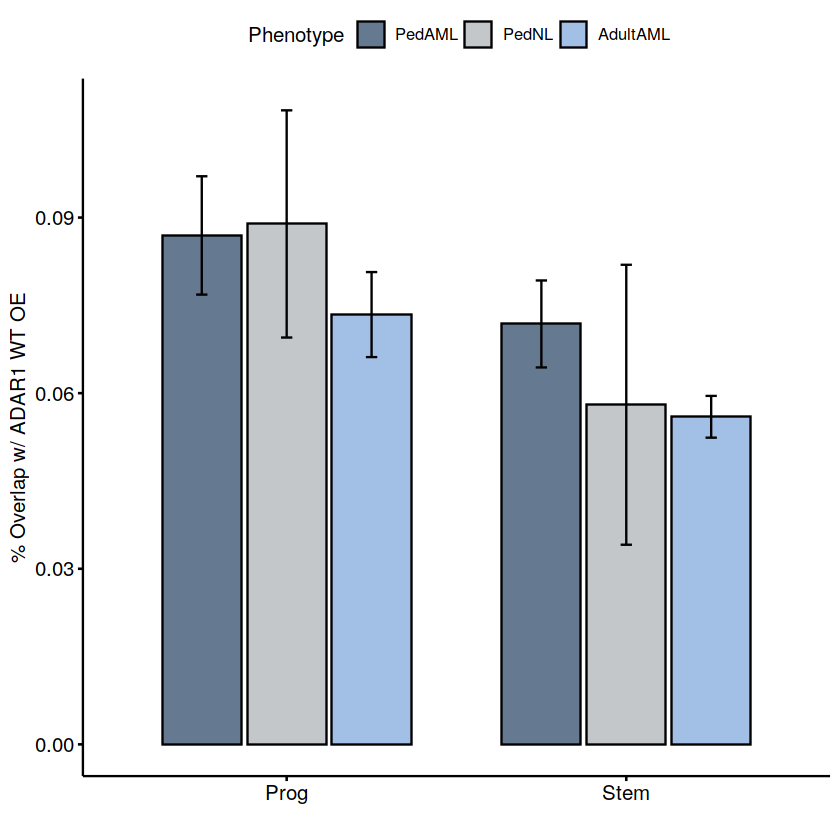

In [55]:
ped_indoverlaps <- cbind.data.frame(Cell.type=c(rep("Prog", nrow(ped_prog_indoverlaps)), 
                                                rep("Stem", nrow(ped_stem_indoverlaps))),
                                    rbind.data.frame(ped_prog_indoverlaps, ped_stem_indoverlaps))
ped_indoverlaps$Phenotype <- factor(as.character(ped_indoverlaps$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
ped_indoverlaps
#pdf(file="DerWerf_PedAML_EditingEventOverlap_ADAR1WTOE_boxplot.pdf", width=6, height=8)
ggbarplot(ped_indoverlaps, x="Cell.type", fill="Phenotype", y="Overlap", add="mean_se", xlab="",
          palette=c("#657991", "#C4C7C9", "#A2C0E5"), ylab="% Overlap w/ ADAR1 WT OE",
          position=position_dodge(0.75))  
#dev.off()

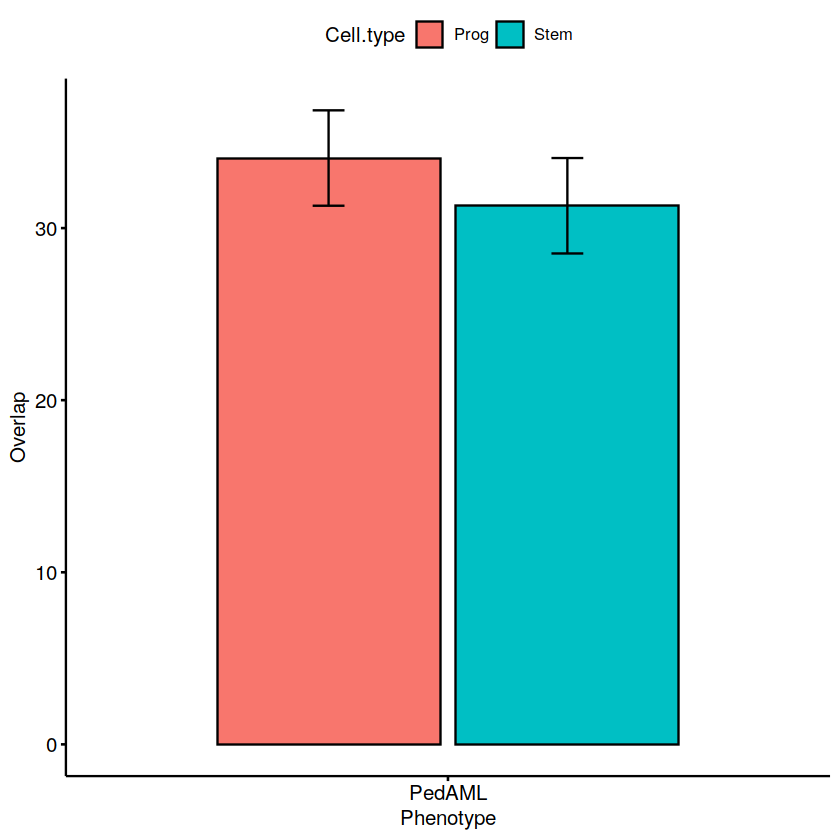

In [56]:
edit.plotinp <- cbind.data.frame(Cell.type=c(rep("Prog", 3), rep("Stem", 3)), 
                 Phenotype=c(names(ped_prog_overlaps), names(ped_stem_overlaps)),
                 Overlap=c(ped_prog_overlaps, ped_stem_overlaps))
ggbarplot(edit.plotinp, x="Phenotype", fill="Cell.type", y="Overlap", position = position_dodge(0.75),
         add = "mean_se")


[1] 8327    2

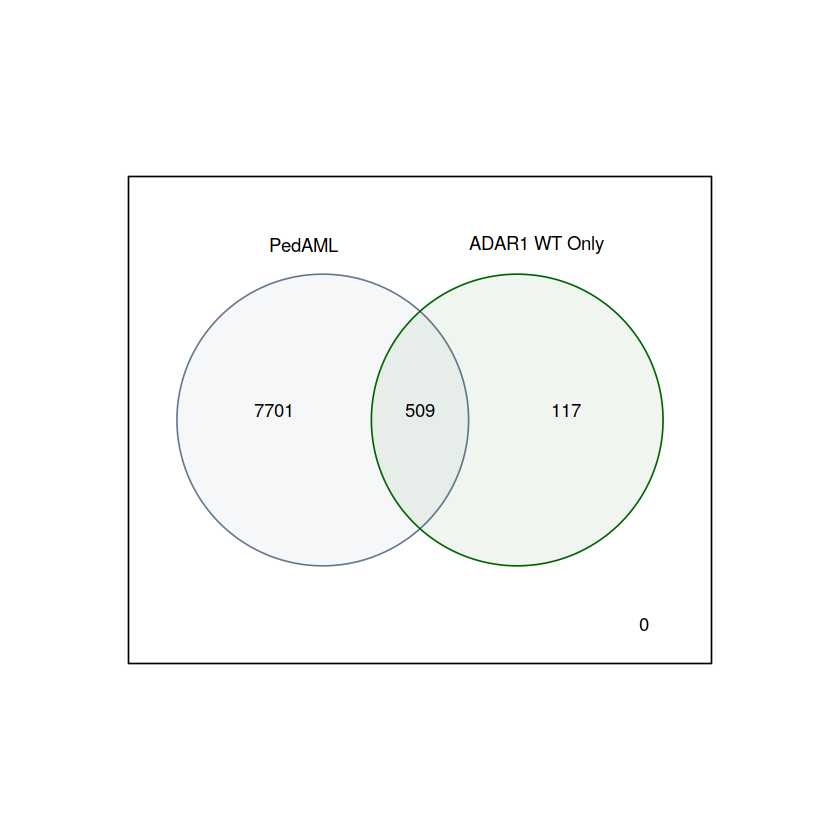

In [57]:
ped_prog_gn_PedAML_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(ped_editsByPheno.l[[1]]$Hugo_Symbol,
                      cb_prog_gn_wtonly))), ncol=2))

colnames(ped_prog_gn_PedAML_venn_inp) <- c("PedAML", "ADAR1 WT Only")
rownames(ped_prog_gn_PedAML_venn_inp) <- unique(c(ped_editsByPheno.l[[1]]$Hugo_Symbol,
                      cb_prog_gn_wtonly))

ped_prog_gn_PedAML_venn_inp[which(unique(c(ped_editsByPheno.l[[1]]$Hugo_Symbol,
                      cb_prog_gn_wtonly)) %in% ped_editsByPheno.l[[1]]$Hugo_Symbol),1] <- 1                                  
ped_prog_gn_PedAML_venn_inp[which(unique(c(ped_editsByPheno.l[[1]]$Hugo_Symbol,
                      cb_prog_gn_wtonly)) %in% cb_prog_gn_wtonly),2] <- 1
dim(ped_prog_gn_PedAML_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(ped_prog_gn_PedAML_venn_inp,  circle.col=c("#657991", "dark green"), mar=mar,cex=cex)

ped_prog_gn_overlaps <- c(PedAML=100*sum(ped_prog_gn_PedAML_venn_inp[,1] == 1 & ped_prog_gn_PedAML_venn_inp[,2] == 1)/
                       length(cb_prog_gn_wtonly))

[1] 9485    4

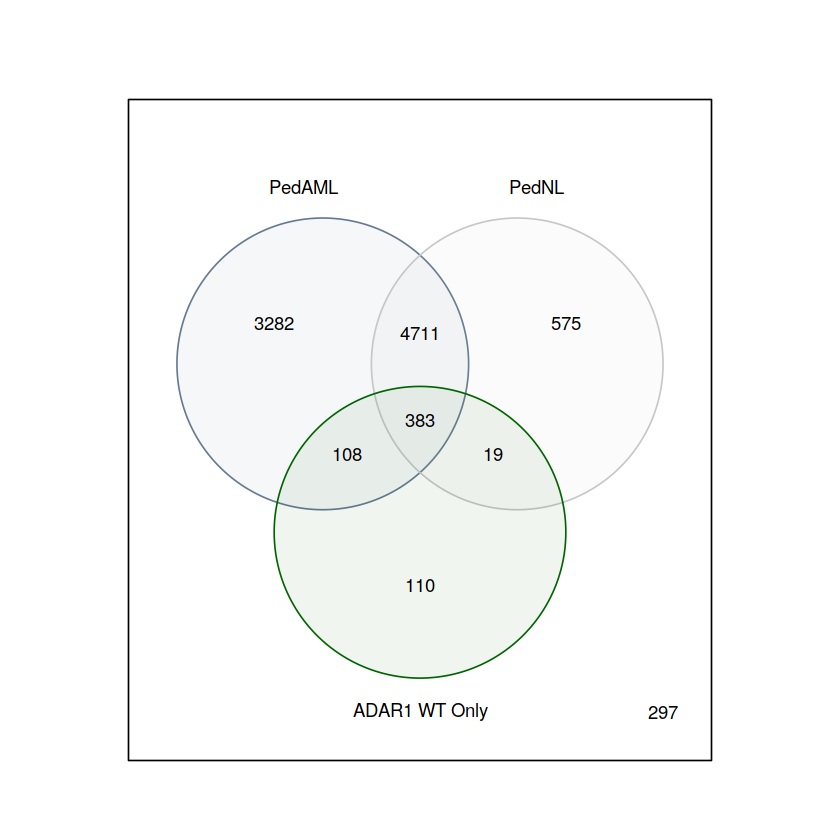

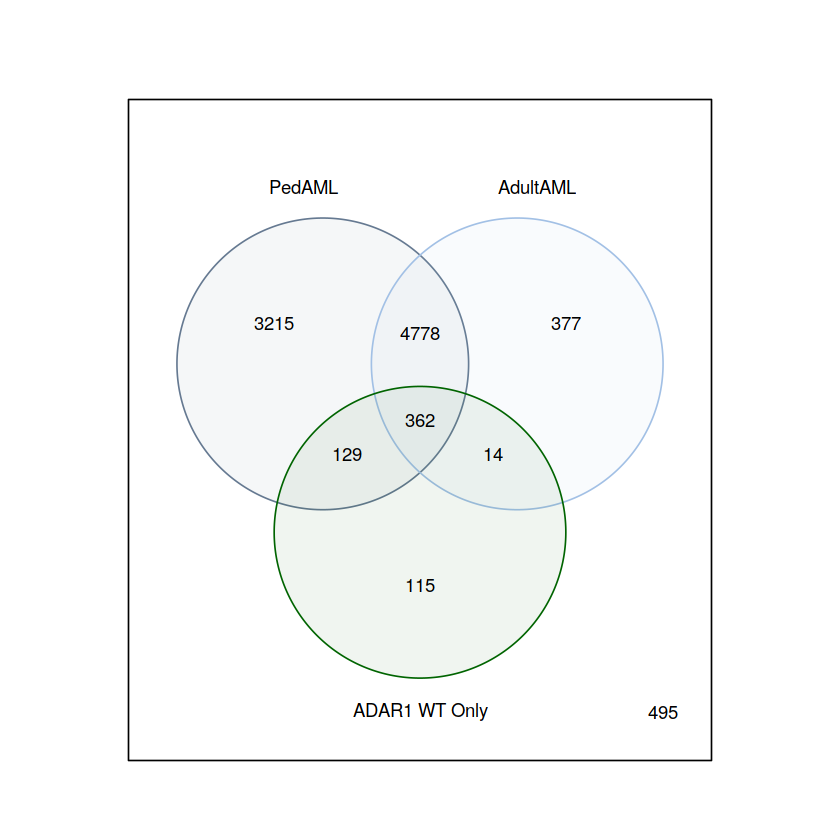

In [58]:
ped_stem_gn_PedNLvPedAML_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol, 
                      ped_editsByPheno.l[[4]]$Hugo_Symbol, ped_editsByPheno.l[[6]]$Hugo_Symbol,
                      cb_stem_gn_wtonly))), ncol=4))

colnames(ped_stem_gn_PedNLvPedAML_venn_inp) <- c("PedAML", "PedNL", "AdultAML", "ADAR1 WT Only")
rownames(ped_stem_gn_PedNLvPedAML_venn_inp) <- unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol, 
                      ped_editsByPheno.l[[4]]$Hugo_Symbol, ped_editsByPheno.l[[6]]$Hugo_Symbol,
                      cb_stem_gn_wtonly))

ped_stem_gn_PedNLvPedAML_venn_inp[which(unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol, 
                      ped_editsByPheno.l[[4]]$Hugo_Symbol, ped_editsByPheno.l[[6]]$Hugo_Symbol,
                      cb_stem_gn_wtonly)) %in% ped_editsByPheno.l[[3]]$Hugo_Symbol),1] <- 1                                  
ped_stem_gn_PedNLvPedAML_venn_inp[which(unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol, 
                      ped_editsByPheno.l[[4]]$Hugo_Symbol, ped_editsByPheno.l[[6]]$Hugo_Symbol,  
                      cb_stem_gn_wtonly)) %in% ped_editsByPheno.l[[4]]$Hugo_Symbol),2] <- 1
ped_stem_gn_PedNLvPedAML_venn_inp[which(unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol, 
                      ped_editsByPheno.l[[4]]$Hugo_Symbol, ped_editsByPheno.l[[6]]$Hugo_Symbol,
                      cb_stem_gn_wtonly)) %in% ped_editsByPheno.l[[6]]$Hugo_Symbol),3] <- 1
ped_stem_gn_PedNLvPedAML_venn_inp[which(unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol, 
                      ped_editsByPheno.l[[4]]$Hugo_Symbol, ped_editsByPheno.l[[6]]$Hugo_Symbol,
                      cb_stem_gn_wtonly)) %in% cb_stem_gn_wtonly),4] <- 1
dim(ped_stem_gn_PedNLvPedAML_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(ped_stem_gn_PedNLvPedAML_venn_inp[,-3],  circle.col=c("#657991", "#C4C7C9", "dark green"), mar=mar,cex=cex)
vennDiagram(ped_stem_gn_PedNLvPedAML_venn_inp[,-2],  circle.col=c("#657991", "#A2C0E5", "dark green"), mar=mar,cex=cex)

ped_stem_gn_overlaps <- c(PedAML=100*sum(ped_stem_gn_PedNLvPedAML_venn_inp[,1] == 1 & ped_stem_gn_PedNLvPedAML_venn_inp[,4] == 1)/
                       length(cb_stem_gn_wtonly), PedNL=100*sum(ped_stem_gn_PedNLvPedAML_venn_inp[,2] == 1 & 
                                                         ped_stem_gn_PedNLvPedAML_venn_inp[,4] == 1)/length(cb_stem_gn_wtonly),
                       AdultAML=100*sum(ped_stem_gn_PedNLvPedAML_venn_inp[,3] == 1 & 
                                                         ped_stem_gn_PedNLvPedAML_venn_inp[,4] == 1)/length(cb_stem_gn_wtonly))

[1] 8613    2

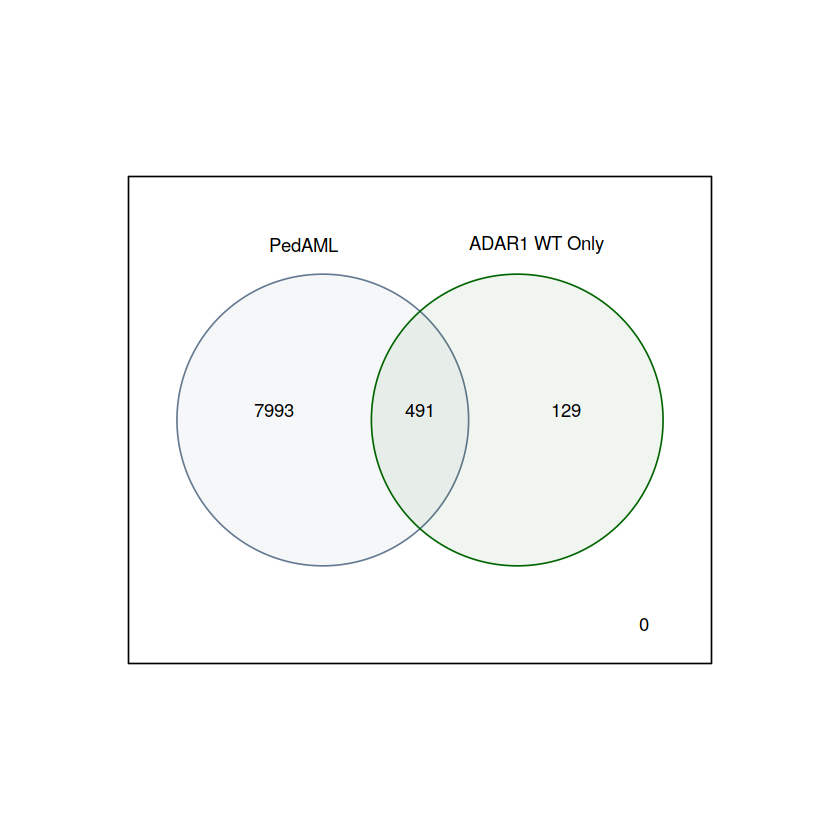

In [59]:
ped_stem_gn_PedAML_venn_inp <- as.data.frame(matrix(0, nrow=length(unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol,
                      cb_stem_gn_wtonly))), ncol=2))

colnames(ped_stem_gn_PedAML_venn_inp) <- c("PedAML", "ADAR1 WT Only")
rownames(ped_stem_gn_PedAML_venn_inp) <- unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol,
                      cb_stem_gn_wtonly))

ped_stem_gn_PedAML_venn_inp[which(unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol,
                      cb_stem_gn_wtonly)) %in% ped_editsByPheno.l[[3]]$Hugo_Symbol),1] <- 1                                  
ped_stem_gn_PedAML_venn_inp[which(unique(c(ped_editsByPheno.l[[3]]$Hugo_Symbol,
                      cb_stem_gn_wtonly)) %in% cb_stem_gn_wtonly),2] <- 1
dim(ped_stem_gn_PedAML_venn_inp)
mar=rep(0,4)
cex=c(.9,0.6, 0.5)
vennDiagram(ped_stem_gn_PedAML_venn_inp,  circle.col=c("#657991", "dark green"), mar=mar,cex=cex)

ped_stem_gn_overlaps <- c(PedAML=100*sum(ped_stem_gn_PedAML_venn_inp[,1] == 1 & ped_stem_gn_PedAML_venn_inp[,2] == 1)/
                       length(cb_stem_gn_wtonly))

In [60]:
ped_prog_gn_indoverlaps <- do.call(cbind.data.frame, c(list(c(rep("PedAML", length(unique(ped_editsByPheno.l[[1]]$Tumor_Sample_Barcode))), 
                                                         rep("PedNL", length(unique(ped_editsByPheno.l[[2]]$Tumor_Sample_Barcode))), 
                                                         rep("AdultAML", length(unique(ped_editsByPheno.l[[5]]$Tumor_Sample_Barcode))))), 
                                                    list(unlist(lapply(c(1,2,5), function(i) {
    unlist(lapply(unique(ped_editsByPheno.l[[i]]$Tumor_Sample_Barcode), function(x) {
        t <- ped_editsByPheno.l[[i]]$Hugo_Symbol[which(ped_editsByPheno.l[[i]]$Tumor_Sample_Barcode %in% x)]
        sum(t %in% cb_prog_gn_wtonly)/length(cb_prog_gn_wtonly)
    }))
    
})))))
colnames(ped_prog_gn_indoverlaps) <- c("Phenotype", "Overlap")
ped_stem_gn_indoverlaps <- do.call(cbind.data.frame, c(list(c(rep("PedAML", length(unique(ped_editsByPheno.l[[3]]$Tumor_Sample_Barcode))), 
                                                         rep("PedNL", length(unique(ped_editsByPheno.l[[4]]$Tumor_Sample_Barcode))), 
                                                         rep("AdultAML", length(unique(ped_editsByPheno.l[[6]]$Tumor_Sample_Barcode))))), 
                                                    list(unlist(lapply(c(3,4,6), function(i) {
    unlist(lapply(unique(ped_editsByPheno.l[[i]]$Tumor_Sample_Barcode), function(x) {
        t <- ped_editsByPheno.l[[i]]$Hugo_Symbol[which(ped_editsByPheno.l[[i]]$Tumor_Sample_Barcode %in% x)]
        sum(t %in% cb_prog_gn_wtonly)/length(cb_prog_gn_wtonly)
    }))
    
}))))) 
colnames(ped_stem_gn_indoverlaps) <- c("Phenotype", "Overlap")
#ped_stem_gn_indoverlaps



Cell.type,Phenotype,Overlap
<chr>,<fct>,<dbl>
Prog,PedAML,1.2012780
Prog,PedAML,2.2460064
Prog,PedAML,2.9153355
Prog,PedAML,0.5527157
Prog,PedAML,2.2875399
Prog,PedAML,1.8051118
Prog,PedAML,1.3578275
Prog,PedAML,0.3003195
Prog,PedAML,1.1150160


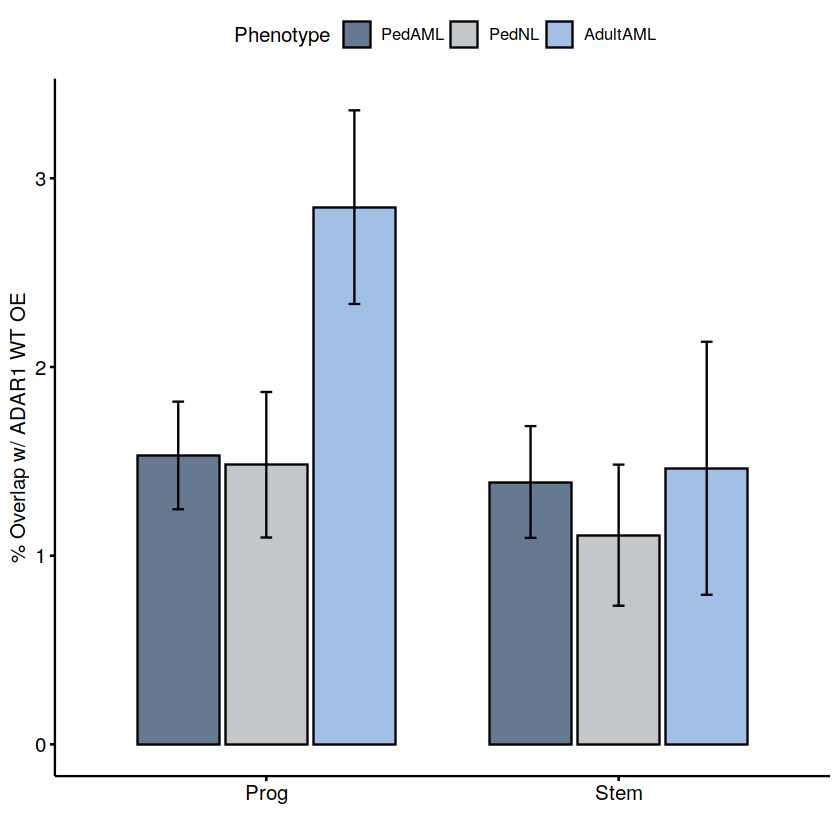

In [61]:
ped_gn_indoverlaps <- cbind.data.frame(Cell.type=c(rep("Prog", nrow(ped_prog_gn_indoverlaps)), 
                                                rep("Stem", nrow(ped_stem_gn_indoverlaps))),
                                    rbind.data.frame(ped_prog_gn_indoverlaps, ped_stem_gn_indoverlaps))
ped_gn_indoverlaps$Phenotype <- factor(as.character(ped_gn_indoverlaps$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
ped_gn_indoverlaps
#pdf(file="DerWerf_PedAML_EditingedGeneOverlap_ADAR1WTOE_boxplot.pdf", width=6, height=8)
ggbarplot(ped_gn_indoverlaps, x="Cell.type", fill="Phenotype", y="Overlap", add="mean_se", xlab="",
          palette=c("#657991", "#C4C7C9", "#A2C0E5"), position=position_dodge(0.75), ylab="% Overlap w/ ADAR1 WT OE")
#dev.off()

In [62]:
Prog_PedAML_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jamieson_Prog_PedAML_RediportalEdits.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
Prog_PedNL_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jamieson_Prog_PedNonLeuk_RediportalEdits.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
Stem_PedAML_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jamieson_Stem_PedAML_RediportalEdits.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
Stem_PedNL_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jamieson_Stem_PedNonLeuk_RediportalEdits.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
Prog_AdultAML_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jamieson_Prog_AdultAML_RediportalEdits.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
Stem_AdultAML_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jamieson_Stem_AdultAML_RediportalEdits.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
dim(Prog_PedAML_closeExons)
dim(Prog_PedNL_closeExons)
dim(Stem_PedAML_closeExons)
dim(Stem_PedNL_closeExons)

colnames(Prog_PedAML_closeExons) <- colnames(Prog_PedNL_closeExons) <- colnames(Stem_PedAML_closeExons) <- 
colnames(Stem_PedNL_closeExons) <- colnames(Prog_AdultAML_closeExons) <-  
colnames(Stem_AdultAML_closeExons) <- c("Chr", "Start", "End", "Name", "Sample", "Strand", "ExonChr", "ExonStart",
                                     "ExonEnd", "ExonEnsID", "ExonOther", "ExonStrand", "ExonDist")

[1] 145114     13

[1] 94555    13

[1] 129730     13

[1] 33883    13

In [63]:
colnames(Prog_PedAML_closeExons) <- colnames(Prog_PedNL_closeExons) <- colnames(Stem_PedAML_closeExons) <- 
colnames(Stem_PedNL_closeExons) <- c("Chr", "Start", "End", "Name", "Sample", "Strand", "ExonChr", "ExonStart",
                                     "ExonEnd", "ExonEnsID", "ExonOther", "ExonStrand", "ExonDist")

In [64]:
table(Prog_PedAML_closeExons$ExonDist < 51)
table(Prog_PedNL_closeExons$ExonDist < 51)
table(Stem_PedAML_closeExons$ExonDist < 51)
table(Stem_PedNL_closeExons$ExonDist < 51)
sum(Prog_PedAML_closeExons$ExonDist < 51)/length(Prog_PedAML_closeExons$ExonDist)
sum(Prog_PedNL_closeExons$ExonDist < 51)/length(Prog_PedNL_closeExons$ExonDist)
sum(Stem_PedAML_closeExons$ExonDist < 51)/length(Stem_PedAML_closeExons$ExonDist)
sum(Stem_PedNL_closeExons$ExonDist < 51)/length(Stem_PedNL_closeExons$ExonDist)

table(Prog_PedAML_closeExons$ExonDist < 51, Prog_PedAML_closeExons$Start < Prog_PedAML_closeExons$ExonStart)
table(Prog_PedNL_closeExons$ExonDist < 51, Prog_PedNL_closeExons$Start < Prog_PedNL_closeExons$ExonStart)
table(Stem_PedAML_closeExons$ExonDist < 51, Stem_PedAML_closeExons$Start < Stem_PedAML_closeExons$ExonStart)
table(Stem_PedNL_closeExons$ExonDist < 51, Stem_PedNL_closeExons$Start < Stem_PedNL_closeExons$ExonStart)

closeExons.plotinp <- do.call(rbind.data.frame, lapply(2:150, function(x) {
    a <- 100*sum(Prog_PedAML_closeExons$ExonDist < x)/length(Prog_PedAML_closeExons$ExonDist)
    b <- 100*sum(Prog_PedNL_closeExons$ExonDist < x)/length(Prog_PedNL_closeExons$ExonDist)
    c <- 100*sum(Stem_PedAML_closeExons$ExonDist < x)/length(Stem_PedAML_closeExons$ExonDist)
    d <- 100*sum(Stem_PedNL_closeExons$ExonDist < x)/length(Stem_PedNL_closeExons$ExonDist)
    e <- 100*sum(Prog_AdultAML_closeExons$ExonDist < x)/length(Prog_AdultAML_closeExons$ExonDist)
    f <- 100*sum(Stem_AdultAML_closeExons$ExonDist < x)/length(Stem_AdultAML_closeExons$ExonDist)
    c(x, a, b, c, d, e, f)
}))
colnames(closeExons.plotinp) <- c("NT_to_Exon", "Prog_PedAML", "Prog_PedNL", "Stem_PedAML", "Stem_PedNL", 
                                  "Prog_AdultAML", "Stem_AdultAML")                             


 FALSE   TRUE 
142822   2292 


FALSE  TRUE 
93091  1464 


 FALSE   TRUE 
127809   1921 


FALSE  TRUE 
33244   639 

[1] 0.01579448

[1] 0.01548305

[1] 0.01480768

[1] 0.01885901

       
        FALSE  TRUE
  FALSE 77615 65207
  TRUE   1204  1088

       
        FALSE  TRUE
  FALSE 50714 42377
  TRUE    795   669

       
        FALSE  TRUE
  FALSE 68619 59190
  TRUE   1008   913

       
        FALSE  TRUE
  FALSE 18073 15171
  TRUE    329   310

In [65]:
do.call(rbind.data.frame, lapply(list(Prog_PedAML_closeExons, Prog_PedNL_closeExons, Prog_AdultAML_closeExons,
                                 Stem_PedAML_closeExons, Stem_PedNL_closeExons, Stem_AdultAML_closeExons), function(x) {
        k <- do.call(rbind.data.frame, lapply(unique(x$Sample), function(y) {
            c(x25=100*sum(subset(x, Sample==y)$ExonDist < 26)/length(subset(x, Sample==y)$ExonDist),
              x50=100*sum(subset(x, Sample==y)$ExonDist < 51)/length(subset(x, Sample==y)$ExonDist),
              x75=100*sum(subset(x, Sample==y)$ExonDist < 76)/length(subset(x, Sample==y)$ExonDist),
              x100=100*sum(subset(x, Sample==y)$ExonDist < 101)/length(subset(x, Sample==y)$ExonDist),
              x125=100*sum(subset(x, Sample==y)$ExonDist < 126)/length(subset(x, Sample==y)$ExonDist))
        }))
        colnames(k) <- c("x25", "x50", "x75", "x100", "x125")
        k
}))

x25,x50,x75,x100,x125
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8568708,1.6978737,2.406643,3.115413,3.951127
0.8024641,1.7021966,2.415498,3.169328,4.109589
0.7017837,1.3743264,1.975855,2.631689,3.312586
0.5621302,1.1472715,1.712689,2.287968,2.902696
0.5809235,1.1789330,1.700056,2.242536,2.810645
1.6118528,3.0283295,4.184305,5.405405,6.528818
0.8906161,1.9350660,2.930937,3.667719,4.582625
2.1400778,4.7526404,6.086715,7.809894,9.421901
0.7851535,1.5060671,2.134190,2.762313,3.590293


In [66]:
lapply(list(Prog_PedAML_closeExons, Prog_PedNL_closeExons, Prog_AdultAML_closeExons,
            Stem_PedAML_closeExons, Stem_PedNL_closeExons, Stem_AdultAML_closeExons), function(x) {
        unique(x$Sample)
    })

[[1]]
[1] "14x12488xPLUSPLUS_S2"     "06id90cellPROGENITORS_S5"
[3] "15x12584xPLUSPLUS_S3"     "03x11379xHPCxxxxx_S3"    
[5] "06id00066PRO_S6"          "04id78cellPROGENITORS_S4"
[7] "17x12451xPLUSPLUS_S5"     "02id38cellPROGENITORS_S2"
[9] "01x00077xPROGENIT_S1"    

[[2]]
[1] "04pid24474ctHPC_S4"   "06x00077xPLUSPLUS_S6" "18x10720xPLUSPLUS_S6"
[4] "05x00047xPLUSPLUS_S5" "02pid24760ctHPC_S2"   "05pid25376ctHSC_S5"  

[[3]]
[1] "09x00020pxPLUSPLUS_S3" "07x00023xPLUSPLUS_S1"  "11x00082xPLUSPLUS_S5" 

[[4]]
[1] "16x12451xPLUSMINS_S4" "02x11379xHSCxxxxx_S2" "01id38cellHSC_S1"    
[4] "12x12484xPLUSMINS_S6" "03id78cellHSC_S3"     "04x00068xPLUSMINS_S4"
[7] "13x12488xPLUSMINS_S1" "05id00066HSC_S5"      "cell05id90HSC_S6"    

[[5]]
[1] "01pid24760ctHSC_S1" "03pid24474ctHSC_S3" "05pid25376ctHSC_S5"

[[6]]
[1] "04id11474HSC_S4"      "10x00082xPLUSMINS_S4" "02id11251HSC_S2"

In [67]:
closeExons_byDist <-  cbind.data.frame(Cell.type=c(rep("Prog", length(unique(c(Prog_PedAML_closeExons$Sample, Prog_PedNL_closeExons$Sample, Prog_AdultAML_closeExons$Sample)))),
rep("Stem", length(unique(c(Stem_PedAML_closeExons$Sample, Stem_PedNL_closeExons$Sample, Stem_AdultAML_closeExons$Sample))))),
                                       Phenotype=c(rep("PedAML", length(unique(Prog_PedAML_closeExons$Sample))), rep("PedNL", length(unique(Prog_PedNL_closeExons$Sample))),
  rep("AdultAML", length(unique(Prog_AdultAML_closeExons$Sample))), rep("PedAML", length(unique(Stem_PedAML_closeExons$Sample))), 
  rep("PedNL", length(unique(Stem_PedNL_closeExons$Sample))), rep("AdultAML", length(unique(Stem_AdultAML_closeExons$Sample)))), 
                                       Value=do.call(rbind.data.frame, lapply(list(Prog_PedAML_closeExons, Prog_PedNL_closeExons, Prog_AdultAML_closeExons,
                                 Stem_PedAML_closeExons, Stem_PedNL_closeExons, Stem_AdultAML_closeExons), function(x) {
        k <- do.call(rbind.data.frame, lapply(unique(x$Sample), function(y) {
            c(x25=100*sum(subset(x, Sample==y)$ExonDist < 26)/length(subset(x, Sample==y)$ExonDist),
              x50=100*sum(subset(x, Sample==y)$ExonDist < 51)/length(subset(x, Sample==y)$ExonDist),
              x75=100*sum(subset(x, Sample==y)$ExonDist < 76)/length(subset(x, Sample==y)$ExonDist),
              x100=100*sum(subset(x, Sample==y)$ExonDist < 101)/length(subset(x, Sample==y)$ExonDist),
              x125=100*sum(subset(x, Sample==y)$ExonDist < 126)/length(subset(x, Sample==y)$ExonDist))
        }))
        colnames(k) <- c("x25", "x50", "x75", "x100", "x125")
        k
})))
closeExons_byDist


Cell.type,Phenotype,Value.x25,Value.x50,Value.x75,Value.x100,Value.x125
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Prog,PedAML,0.8568708,1.6978737,2.406643,3.115413,3.951127
Prog,PedAML,0.8024641,1.7021966,2.415498,3.169328,4.109589
Prog,PedAML,0.7017837,1.3743264,1.975855,2.631689,3.312586
Prog,PedAML,0.5621302,1.1472715,1.712689,2.287968,2.902696
Prog,PedAML,0.5809235,1.1789330,1.700056,2.242536,2.810645
Prog,PedAML,1.6118528,3.0283295,4.184305,5.405405,6.528818
Prog,PedAML,0.8906161,1.9350660,2.930937,3.667719,4.582625
Prog,PedAML,2.1400778,4.7526404,6.086715,7.809894,9.421901
Prog,PedAML,0.7851535,1.5060671,2.134190,2.762313,3.590293


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


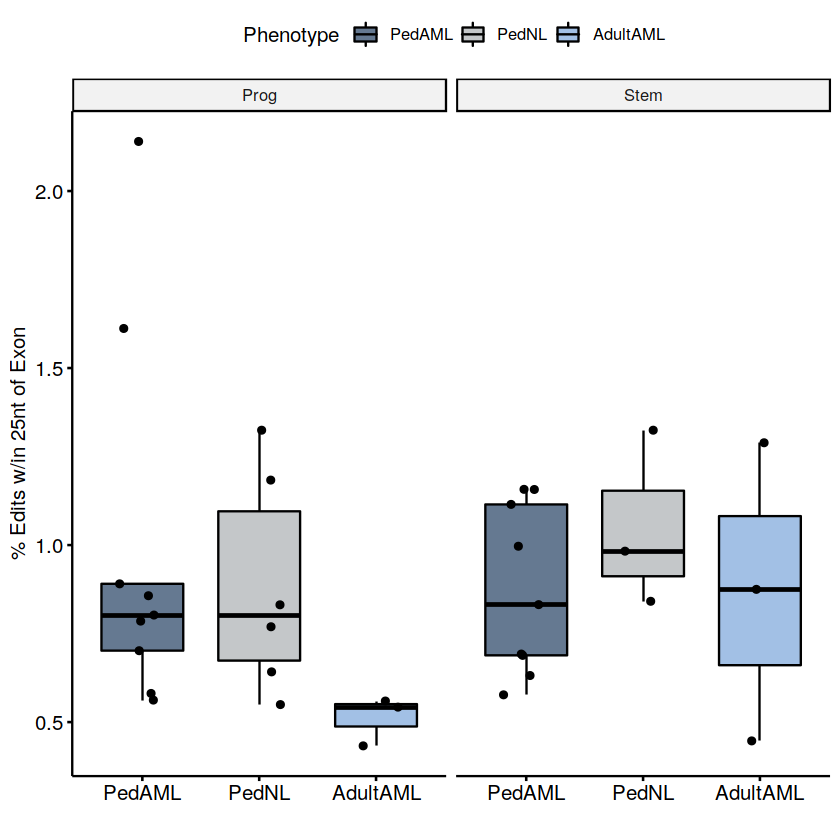

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


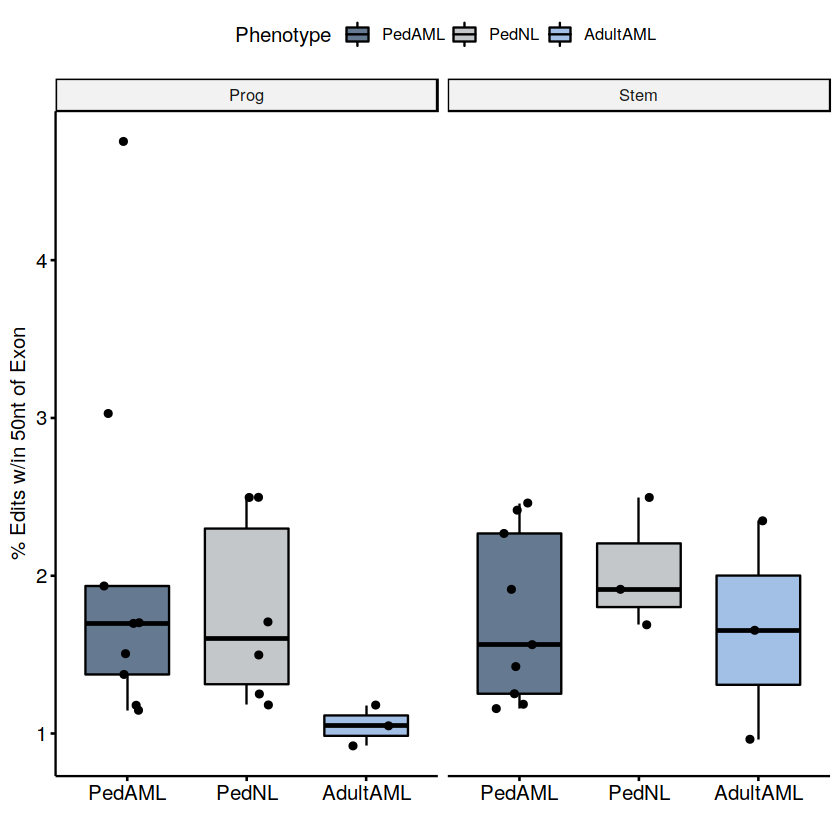

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


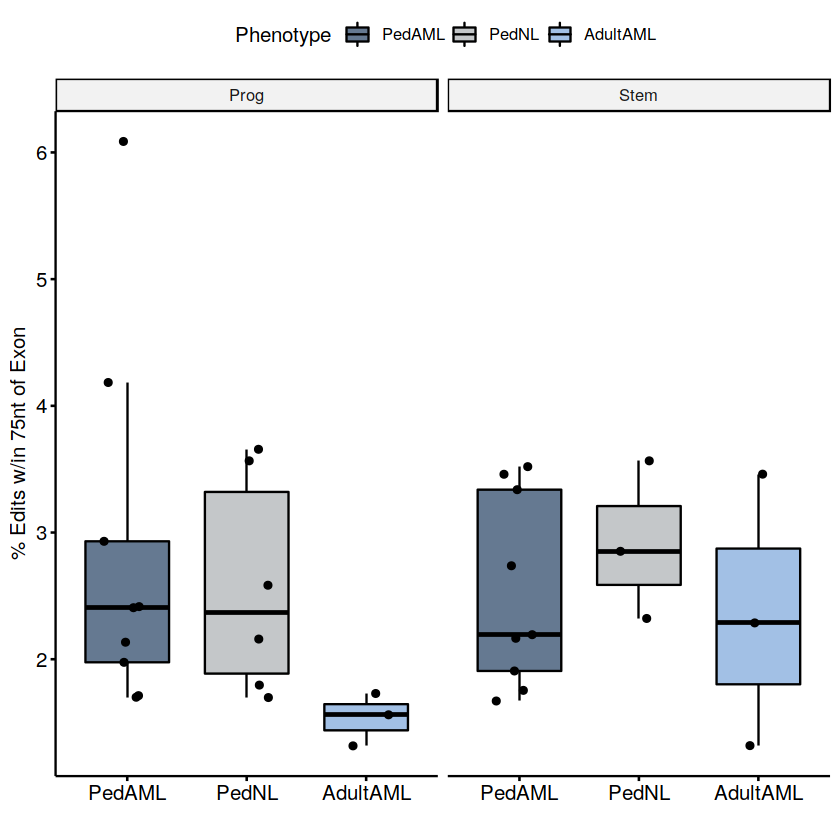

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


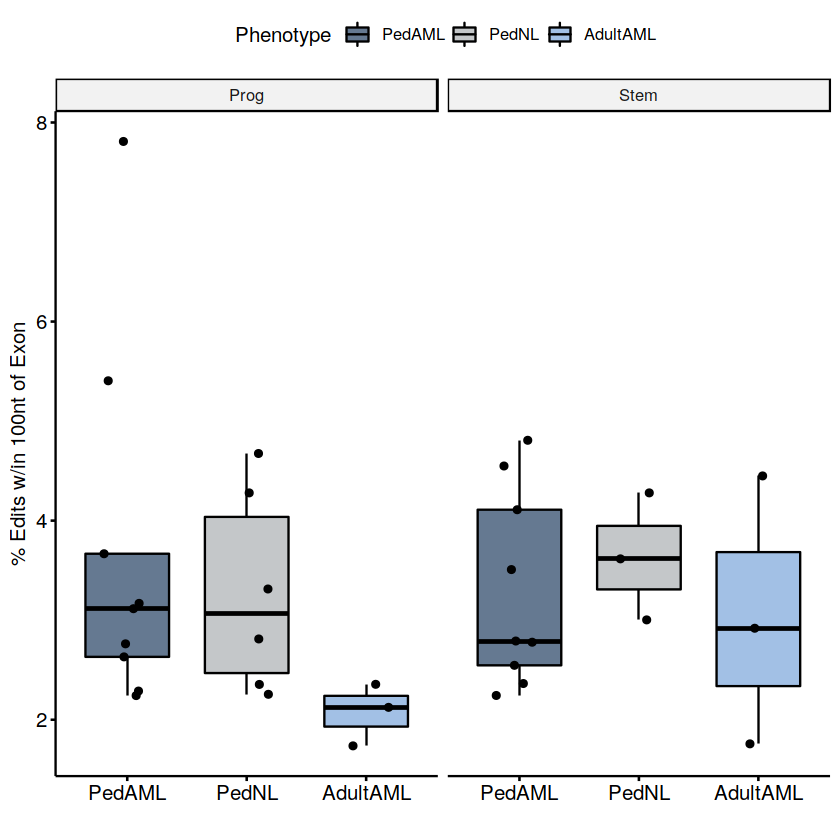

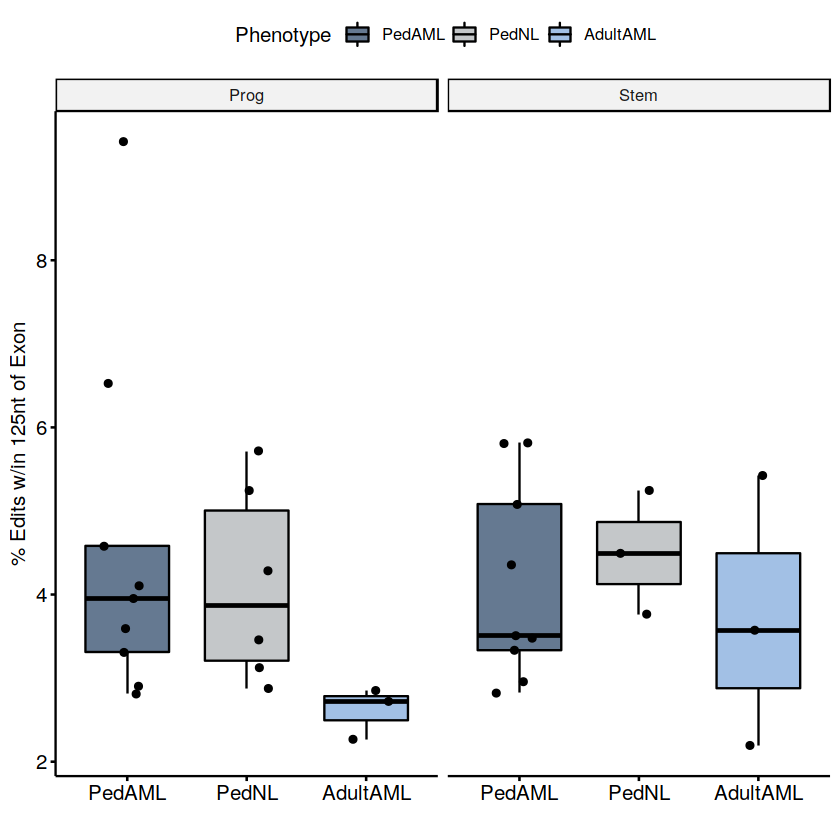

In [68]:
closeExons_byDist$Phenotype <- factor(as.character(closeExons_byDist$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
#pdf(file="DerWerf_PedAML_EditsCloseExons_25nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(closeExons_byDist, x="Phenotype", fill="Phenotype", y="Value.x25", add=c("jitter"), xlab="", 
          ylab="% Edits w/in 25nt of Exon", palette=c("#657991", "#C4C7C9", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off()
#pdf(file="DerWerf_PedAML_EditsCloseExons_50nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(closeExons_byDist, x="Phenotype", fill="Phenotype", y="Value.x50", add=c("jitter"), xlab="",
          ylab="% Edits w/in 50nt of Exon", palette=c("#657991", "#C4C7C9", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off()
#pdf(file="DerWerf_PedAML_EditsCloseExons_75nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(closeExons_byDist, x="Phenotype", fill="Phenotype", y="Value.x75", add=c("jitter"), xlab="",
          ylab="% Edits w/in 75nt of Exon", palette=c("#657991", "#C4C7C9", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off()
#pdf(file="DerWerf_PedAML_EditsCloseExons_100nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(closeExons_byDist, x="Phenotype", fill="Phenotype", y="Value.x100", add=c("jitter"), xlab="",
          ylab="% Edits w/in 100nt of Exon", palette=c("#657991", "#C4C7C9", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off() 
#pdf(file="DerWerf_PedAML_EditsCloseExons_125nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(closeExons_byDist, x="Phenotype", fill="Phenotype", y="Value.x125", add=c("jitter"), xlab="",
          ylab="% Edits w/in 125nt of Exon", palette=c("#657991", "#C4C7C9", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off()

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


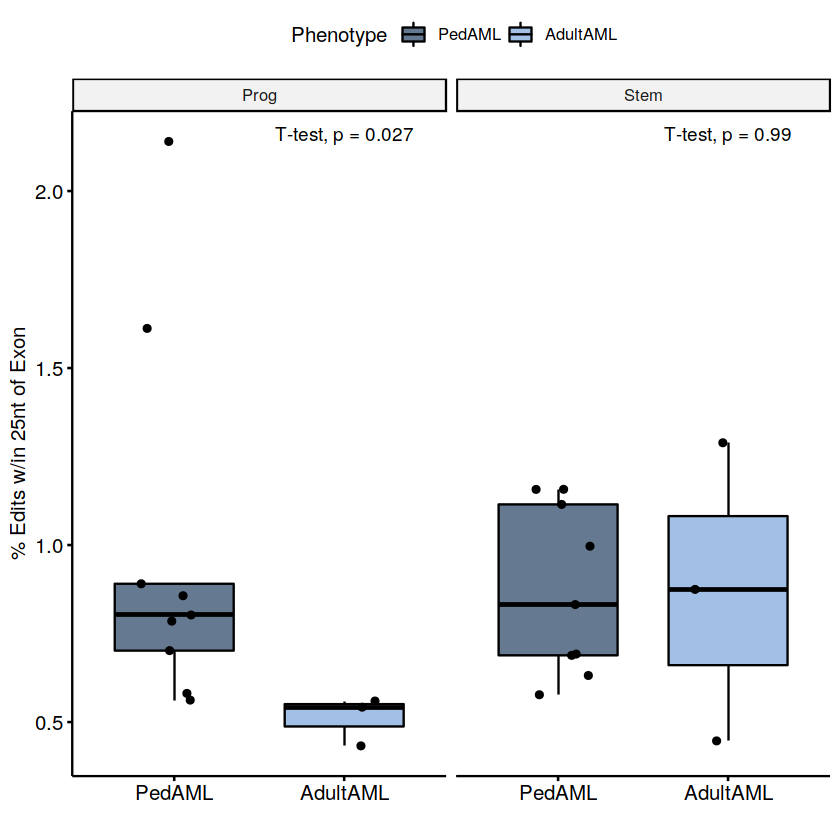

In [69]:
#closeExons_byDist$Phenotype <- factor(as.character(closeExons_byDist$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
#pdf(file="DerWerf_PedAML_EditsCloseExons_25nt_PedAMLvAdultAML_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL"), x="Phenotype", fill="Phenotype", y="Value.x25", add=c("jitter"), xlab="", 
          ylab="% Edits w/in 25nt of Exon", palette=c("#657991", "#A2C0E5")) + facet_grid(~Cell.type) + 
            stat_compare_means(method="t.test", ref.group="PedAML")
#dev.off()


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


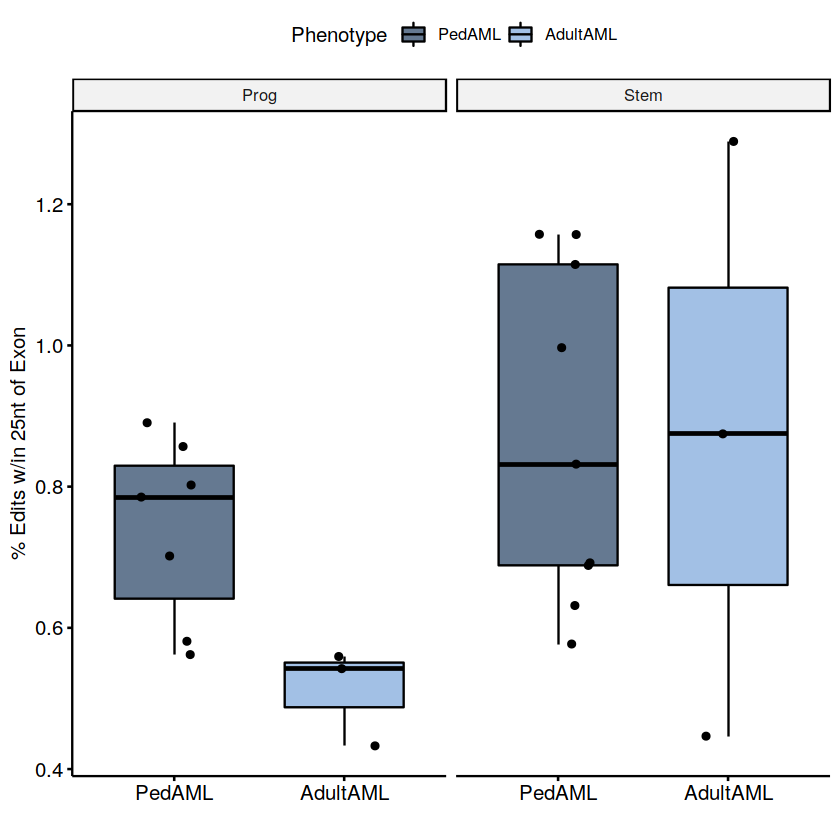

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


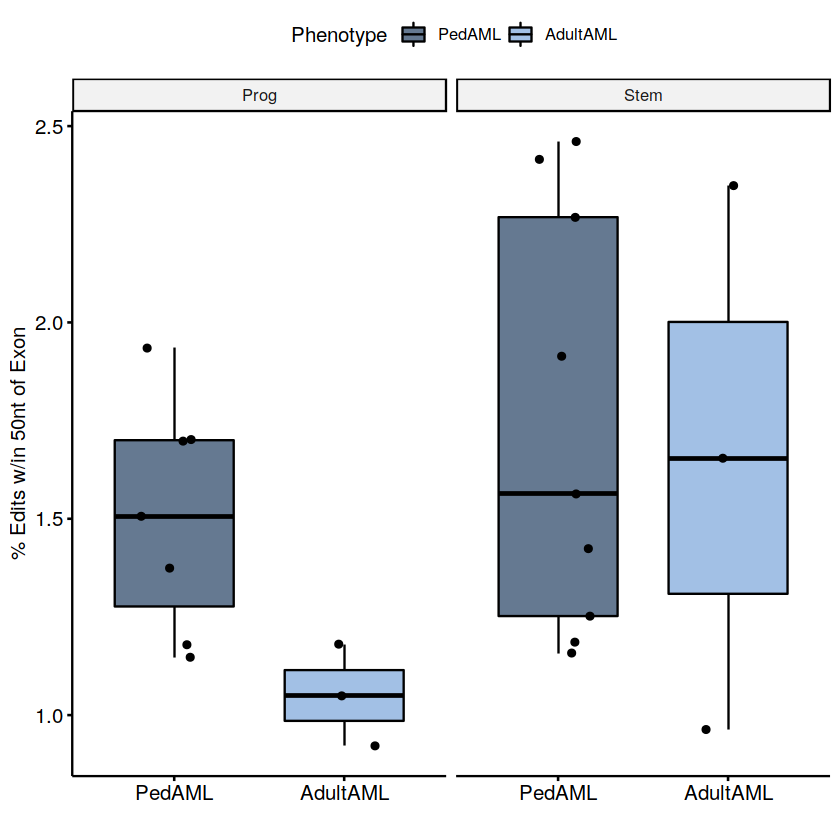

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


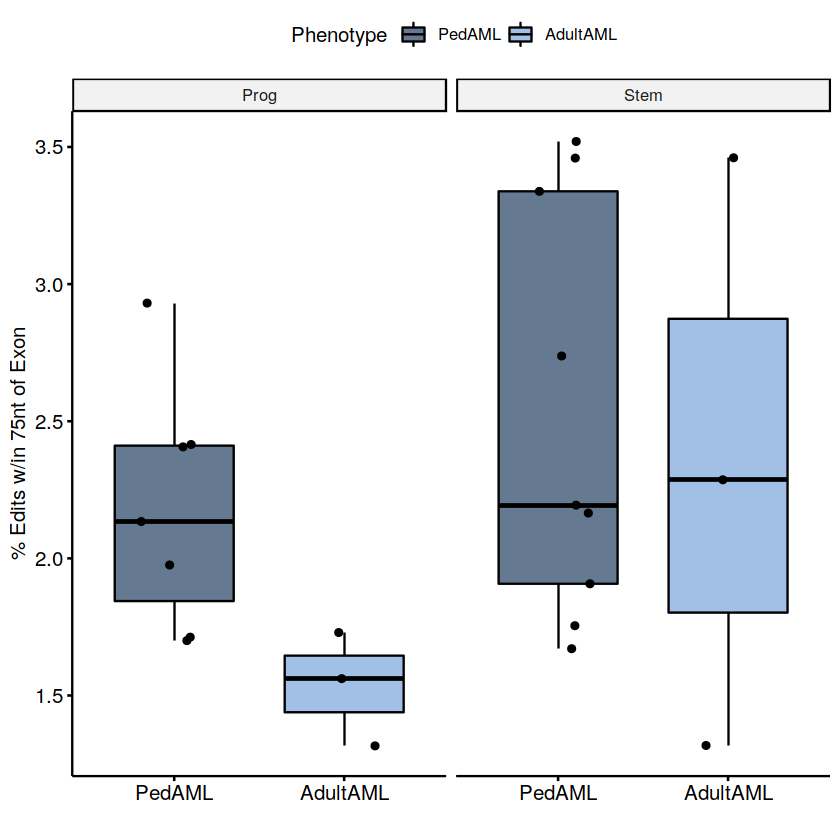

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


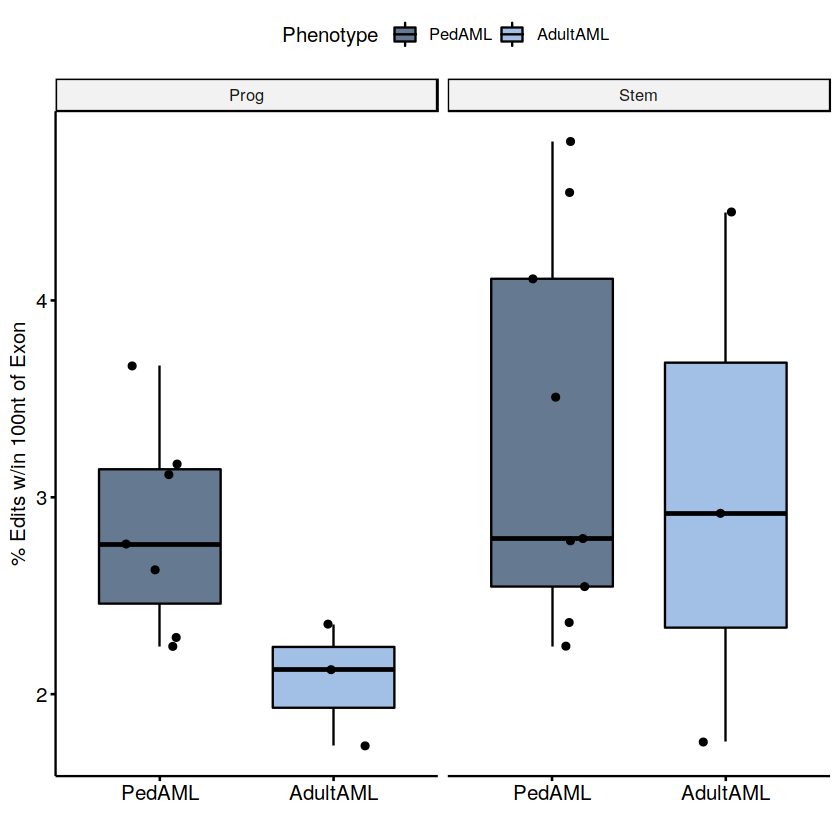

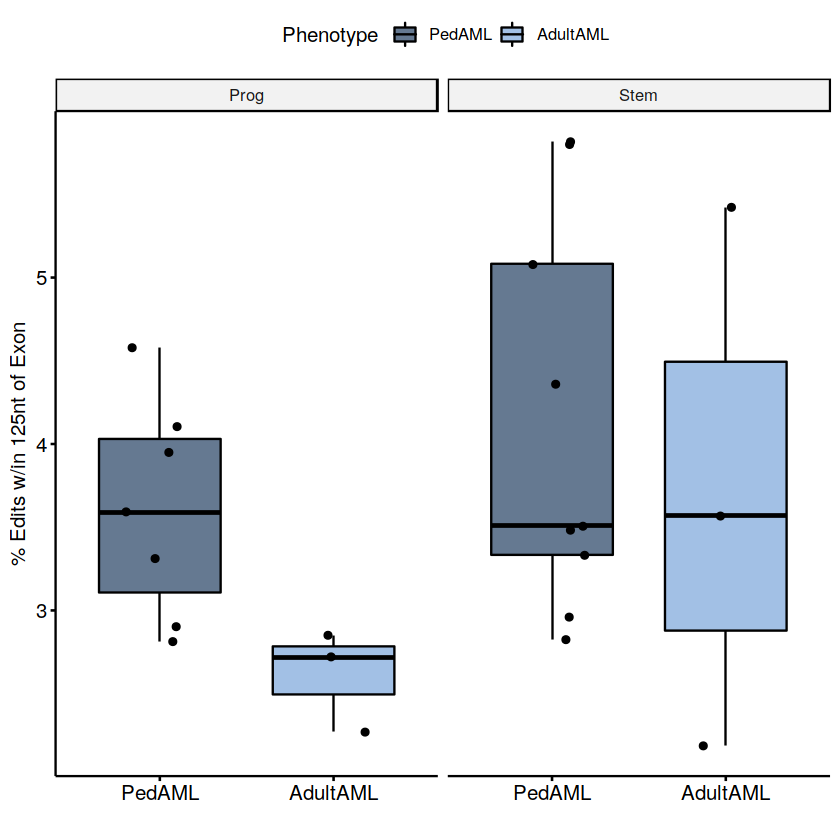

In [70]:
closeExons_byDist$Phenotype <- factor(as.character(closeExons_byDist$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
#pdf(file="DerWerf_PedAML_AdultAML_EditsCloseExons_25nt_boxplot_06292021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x25", add=c("jitter"), xlab="", 
          ylab="% Edits w/in 25nt of Exon", palette=c("#657991", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off()
#pdf(file="DerWerf_PedAML_AdultAML_EditsCloseExons_50nt_boxplot_06292021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x50", add=c("jitter"), xlab="",
          ylab="% Edits w/in 50nt of Exon", palette=c("#657991", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off()
#pdf(file="DerWerf_PedAML_AdultAML_EditsCloseExons_75nt_boxplot_06292021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x75", add=c("jitter"), xlab="",
          ylab="% Edits w/in 75nt of Exon", palette=c("#657991", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off()
#pdf(file="DerWerf_PedAML_AdultAML_EditsCloseExons_100nt_boxplot_06292021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x100", add=c("jitter"), xlab="",
          ylab="% Edits w/in 100nt of Exon", palette=c("#657991", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off() 
#pdf(file="DerWerf_PedAML_AdultAML_EditsCloseExons_125nt_boxplot_06292021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x125", add=c("jitter"), xlab="",
          ylab="% Edits w/in 125nt of Exon", palette=c("#657991", "#A2C0E5")) + facet_grid(~Cell.type)
#dev.off()

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


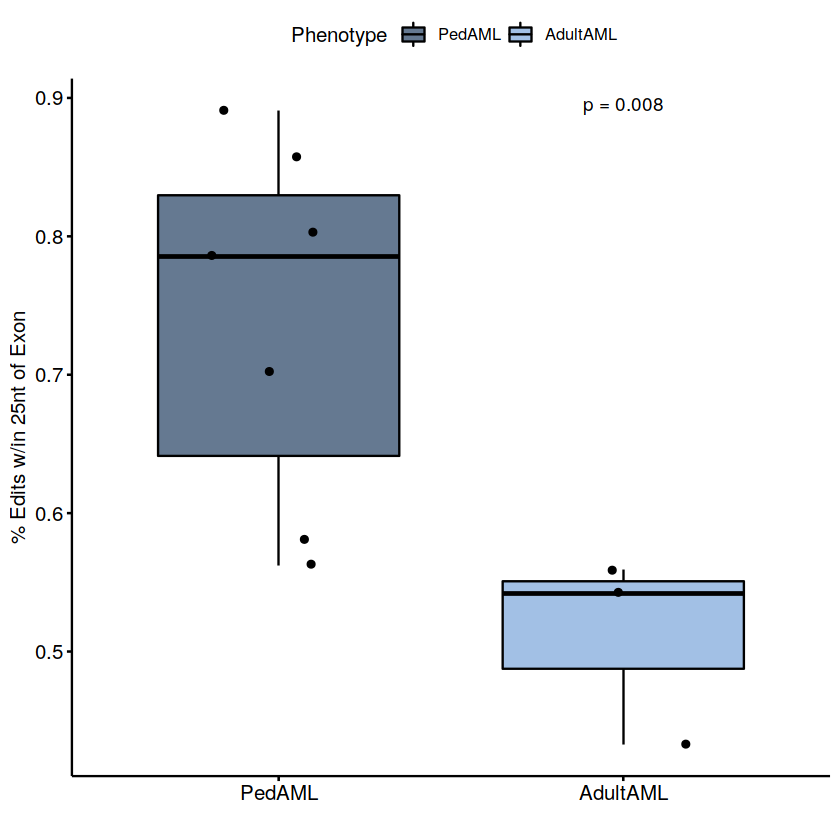

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


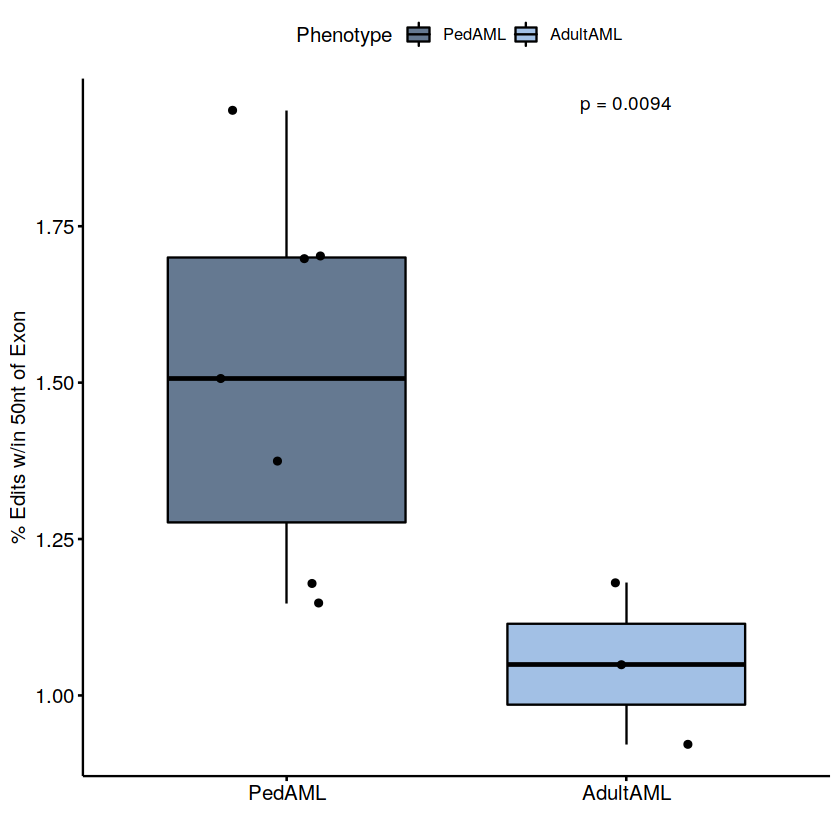

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


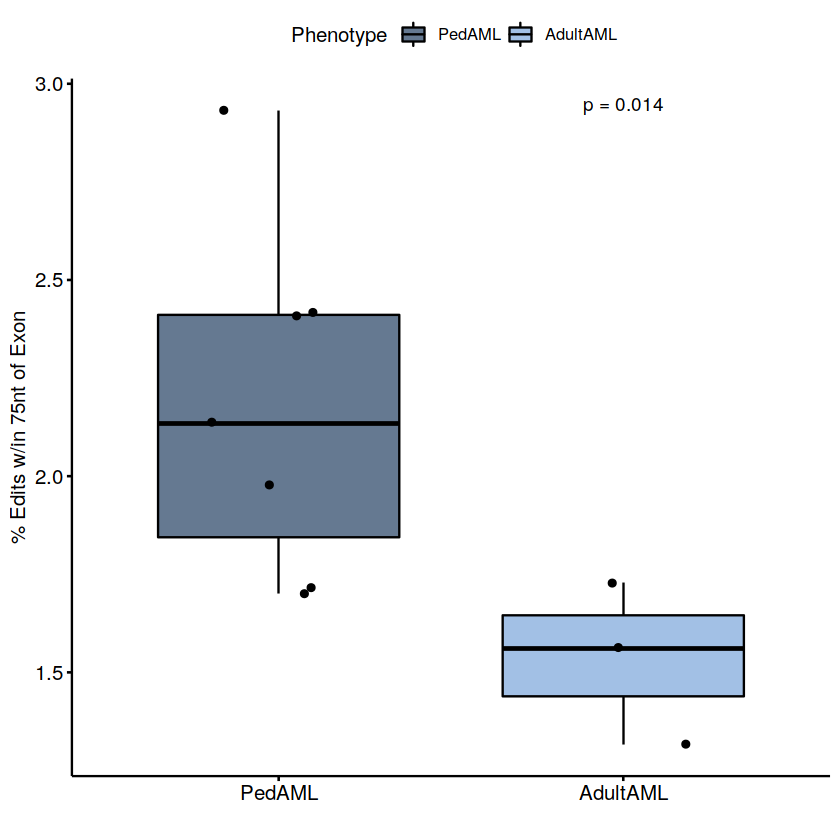

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


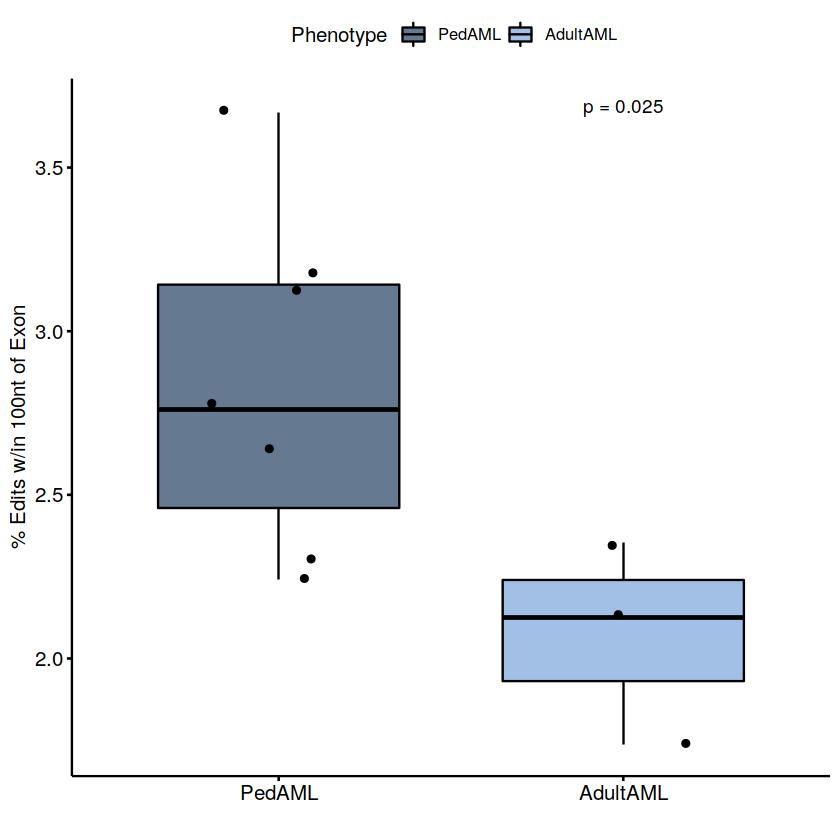

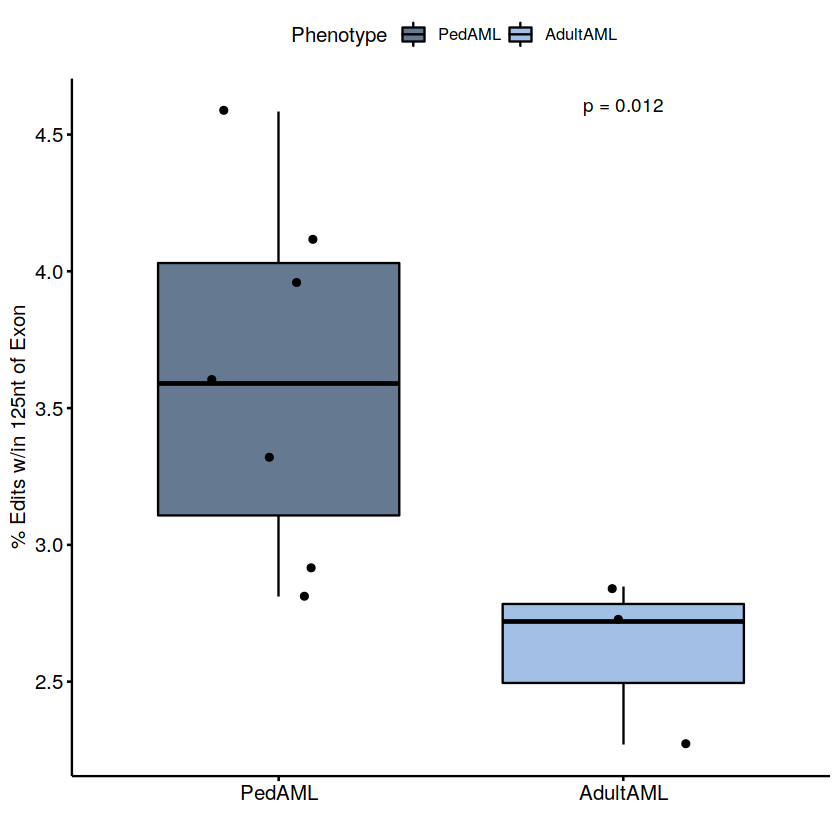

In [71]:
closeExons_byDist$Phenotype <- factor(as.character(closeExons_byDist$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
#pdf(file="DerWerf_PedAML_EditsCloseExons_25nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL" & Cell.type == "Prog")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x25", add=c("jitter"), xlab="", 
          ylab="% Edits w/in 25nt of Exon", palette=c("#657991", "#A2C0E5")) + #facet_grid(~Cell.type)
          stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML") 
#dev.off()
#dev.off()
#pdf(file="DerWerf_PedAML_EditsCloseExons_50nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL" & Cell.type == "Prog")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x50", add=c("jitter"), xlab="",
          ylab="% Edits w/in 50nt of Exon", palette=c("#657991", "#A2C0E5")) + #facet_grid(~Cell.type)
        stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
#pdf(file="DerWerf_PedAML_EditsCloseExons_75nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL" & Cell.type == "Prog")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x75", add=c("jitter"), xlab="",
          ylab="% Edits w/in 75nt of Exon", palette=c("#657991", "#A2C0E5")) + #facet_grid(~Cell.type)
        stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()
#pdf(file="DerWerf_PedAML_EditsCloseExons_100nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL" & Cell.type == "Prog")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x100", add=c("jitter"), xlab="",
          ylab="% Edits w/in 100nt of Exon", palette=c("#657991", "#A2C0E5")) + #facet_grid(~Cell.type)
        stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off() 
#pdf(file="DerWerf_PedAML_EditsCloseExons_125nt_boxplot_06172021.pdf", width=7, height=7)
ggboxplot(subset(closeExons_byDist, Phenotype != "PedNL" & Cell.type == "Prog")[-c(6,8),], x="Phenotype", fill="Phenotype", y="Value.x125", add=c("jitter"), xlab="",
          ylab="% Edits w/in 125nt of Exon", palette=c("#657991", "#A2C0E5")) + #facet_grid(~Cell.type)
        stat_compare_means(method="t.test", label = "p.format", ref.group="PedAML")
#dev.off()

In [77]:
CB_Prog_PCDH_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jiang_CordbloodOE_Prog_PCDH_rediportal_06252021.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
CB_Prog_WT_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jiang_CordbloodOE_Prog_WT_rediportal_06252021.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
#CB_CD34_PCDH_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jamieson_CB_ADAR_OE_CD34_PCDH_RediportalEdits.sorted_CLOSEST.bed",
#                                    sep="\t", header=FALSE)
#CB_CD34_WT_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jamieson_CB_ADAR_OE_CD34_WT_RediportalEdits.sorted_CLOSEST.bed",
#                                    sep="\t", header=FALSE)
CB_Stem_PCDH_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jiang_CordbloodOE_Stem_PCDH_rediportal_06252021.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
CB_Stem_WT_closeExons <- read.csv(file="/mnt/data1/tomw/DeWerf_PedAML_RNASeq/Archive/Jiang_CordbloodOE_Stem_WT_rediportal_06252021.sorted_CLOSEST.bed",
                                    sep="\t", header=FALSE)
dim(CB_Prog_PCDH_closeExons)
dim(CB_Prog_WT_closeExons)
#dim(CB_CD34_PCDH_closeExons)
#dim(CB_CD34_WT_closeExons)
dim(CB_Stem_PCDH_closeExons)
dim(CB_Stem_WT_closeExons)

colnames(CB_Prog_PCDH_closeExons) <- colnames(CB_Prog_WT_closeExons) <- 
#colnames(CB_CD34_PCDH_closeExons) <- colnames(CB_CD34_WT_closeExons) <- 
colnames(CB_Stem_PCDH_closeExons) <- colnames(CB_Stem_WT_closeExons) <- c("Chr", "Start", "End", "Name", "Sample", "Strand", "ExonChr", "ExonStart",
                                     "ExonEnd", "ExonEnsID", "ExonOther", "ExonStrand", "ExonDist")

[1] 9877   13

[1] 6254   13

[1] 2191   13

[1] 2287   13

In [78]:
CB_closeExons_byDist <-  cbind.data.frame(Cell.type=c(rep("Prog", length(unique(c(CB_Prog_PCDH_closeExons$Sample, CB_Prog_WT_closeExons$Sample)))),
rep("Stem", length(unique(c(CB_Stem_PCDH_closeExons$Sample, CB_Stem_WT_closeExons$Sample))))),
                                       Phenotype=c(rep("PCDH", length(unique(CB_Prog_PCDH_closeExons$Sample))), 
                                                   rep("ADAR1_WT", length(unique(CB_Prog_WT_closeExons$Sample))),
                                                   rep("PCDH", length(unique(CB_Stem_PCDH_closeExons$Sample))), 
                                                   rep("ADAR1_WT", length(unique(CB_Stem_WT_closeExons$Sample)))), 
                                       Value=do.call(rbind.data.frame, lapply(list(CB_Prog_PCDH_closeExons, CB_Prog_WT_closeExons, 
                                                                                   CB_Stem_PCDH_closeExons, CB_Stem_WT_closeExons), function(x) {
        k <- do.call(rbind.data.frame, lapply(unique(x$Sample), function(y) {
            c(x25=100*sum(subset(x, Sample==y)$ExonDist < 26)/length(subset(x, Sample==y)$ExonDist),
              x50=100*sum(subset(x, Sample==y)$ExonDist < 51)/length(subset(x, Sample==y)$ExonDist),
              x75=100*sum(subset(x, Sample==y)$ExonDist < 76)/length(subset(x, Sample==y)$ExonDist),
              x100=100*sum(subset(x, Sample==y)$ExonDist < 101)/length(subset(x, Sample==y)$ExonDist),
              x125=100*sum(subset(x, Sample==y)$ExonDist < 201)/length(subset(x, Sample==y)$ExonDist))
        }))
        colnames(k) <- c("x25", "x50", "x75", "x100", "x200")
        k
})))
CB_closeExons_byDist

Cell.type,Phenotype,Value.x25,Value.x50,Value.x75,Value.x100,Value.x200
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Prog,PCDH,1.367826,2.720785,3.895332,4.846863,9.02468
Prog,PCDH,2.059497,3.947368,5.720824,7.379863,13.44394
Prog,PCDH,1.924448,3.492516,4.561654,5.345688,10.62010
Prog,ADAR1_WT,2.024989,4.351573,6.031883,7.755278,14.60577
Prog,ADAR1_WT,1.997503,4.411153,5.992509,7.823554,13.89929
Prog,ADAR1_WT,2.156863,3.725490,5.098039,5.947712,11.69935
Stem,PCDH,2.558635,4.477612,5.756930,7.249467,13.96588
Stem,PCDH,1.436552,3.671189,4.948125,5.905826,11.25299
Stem,ADAR1_WT,1.635514,3.894081,5.841121,7.866044,14.01869



ADAR1_WT     PCDH 
       5        5 

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


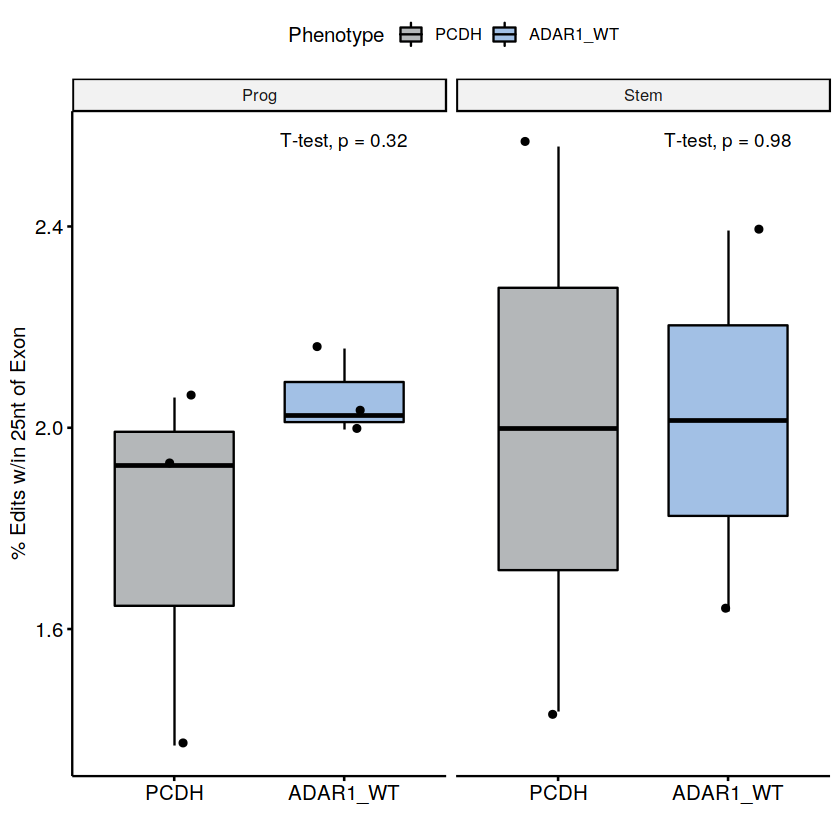

In [79]:
#CB_closeExons_byDist$Phenotype <- factor(as.character(closeExons_byDist$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
table(CB_closeExons_byDist$Phenotype)
#pdf(file="Jiang_CB_EditsCloseExons_25nt_PCDHvsWT_boxplot_06252021.pdf", width=7, height=7)
ggboxplot(CB_closeExons_byDist, x="Phenotype", fill="Phenotype", y="Value.x25", add=c("jitter"), xlab="", 
          ylab="% Edits w/in 25nt of Exon", palette=c("#B4B7B9", "#A2C0E5")) + facet_grid(~Cell.type) + 
            stat_compare_means(method="t.test", ref.group="PCDH")
#dev.off()



ADAR1_WT     PCDH 
       5        5 

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


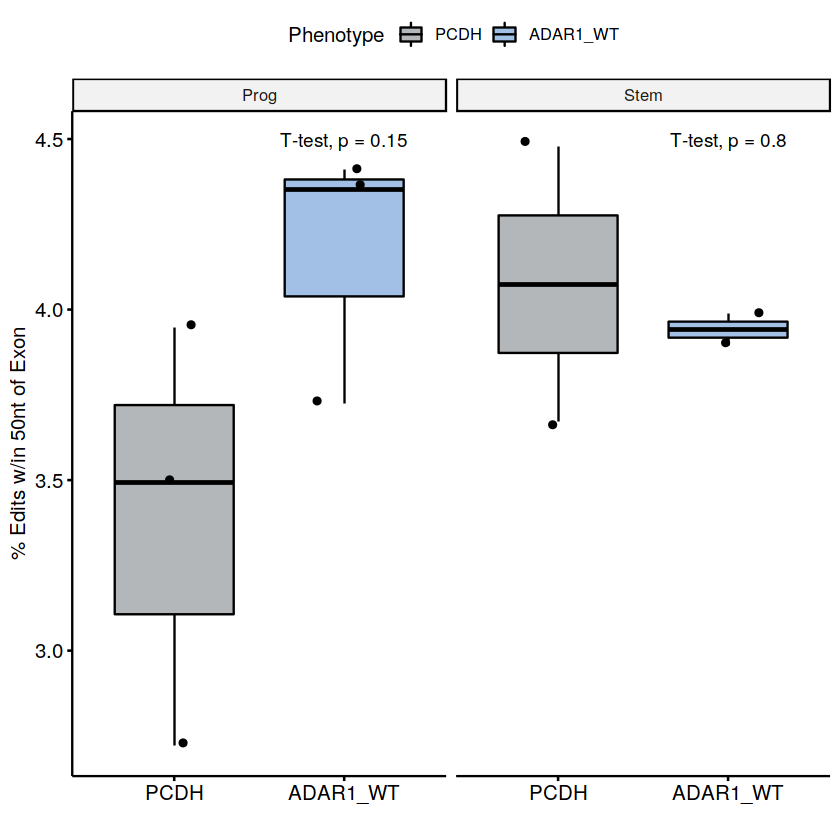

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


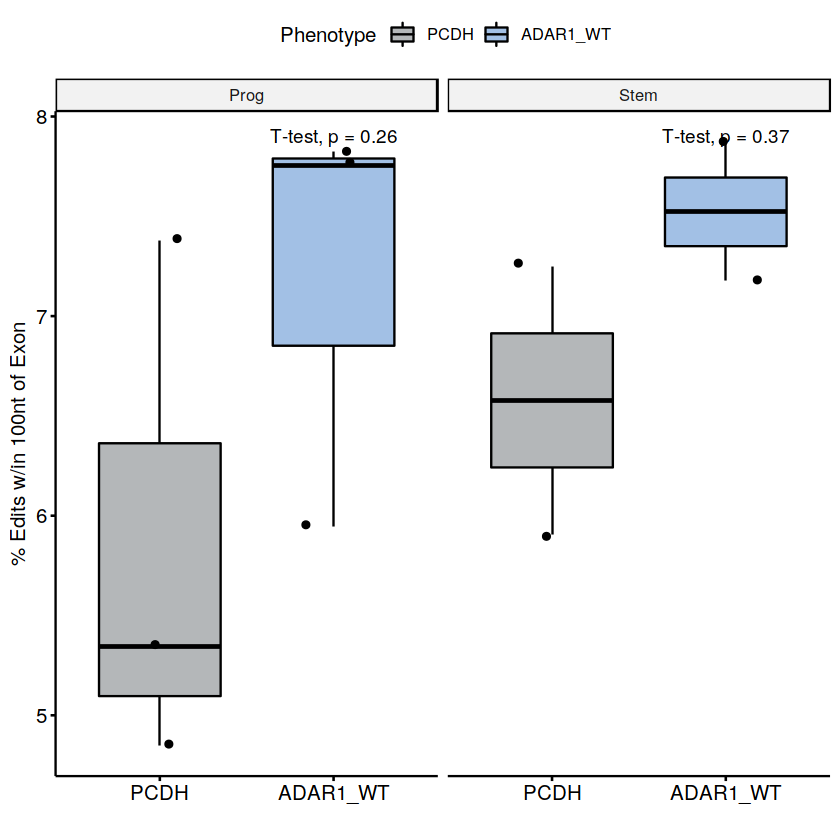

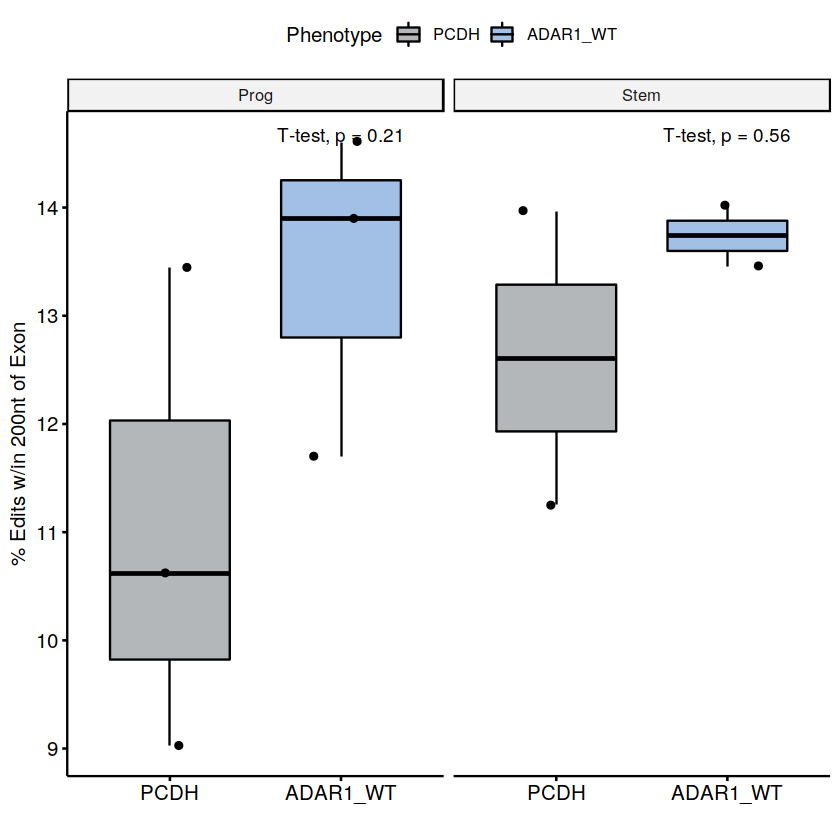

In [80]:
#CB_closeExons_byDist$Phenotype <- factor(as.character(closeExons_byDist$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
table(CB_closeExons_byDist$Phenotype)
#pdf(file="Jiang_CB_EditsCloseExons_50nt_PCDHvsWT_boxplot_06252021.pdf", width=7, height=7)
ggboxplot(CB_closeExons_byDist, x="Phenotype", fill="Phenotype", y="Value.x50", add=c("jitter"), xlab="", 
          ylab="% Edits w/in 50nt of Exon", palette=c("#B4B7B9", "#A2C0E5")) + facet_grid(~Cell.type) + 
            stat_compare_means(method="t.test", ref.group="PCDH")
#dev.off()

#CB_closeExons_byDist$Phenotype <- factor(as.character(closeExons_byDist$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
#pdf(file="Jiang_CB_EditsCloseExons_100nt_PCDHvsWT_boxplot_06252021.pdf", width=7, height=7)
ggboxplot(CB_closeExons_byDist, x="Phenotype", fill="Phenotype", y="Value.x100", add=c("jitter"), xlab="", 
          ylab="% Edits w/in 100nt of Exon", palette=c("#B4B7B9", "#A2C0E5")) + facet_grid(~Cell.type) + 
            stat_compare_means(method="t.test", ref.group="PCDH")
#dev.off()

#CB_closeExons_byDist$Phenotype <- factor(as.character(closeExons_byDist$Phenotype), levels=c("PedAML", "PedNL", "AdultAML"))
#pdf(file="Jiang_CB_EditsCloseExons_200nt_PCDHvsWT_boxplot_06252021.pdf", width=7, height=7)
ggboxplot(CB_closeExons_byDist, x="Phenotype", fill="Phenotype", y="Value.x200", add=c("jitter"), xlab="", 
          ylab="% Edits w/in 200nt of Exon", palette=c("#B4B7B9", "#A2C0E5")) + facet_grid(~Cell.type) + 
            stat_compare_means(method="t.test", ref.group="PCDH")
#dev.off()


In [81]:
head(as.data.frame(table(ped_editsByPheno.l[[1]]$Hugo_Symbol)))
ped_Prog_pedAML_counts <- as.data.frame(table(ped_editsByPheno.l[[1]]$Hugo_Symbol))
ped_Prog_pedNL_counts <- as.data.frame(table(ped_editsByPheno.l[[2]]$Hugo_Symbol))
ped_Prog_AdultAML_counts <- as.data.frame(table(ped_editsByPheno.l[[5]]$Hugo_Symbol))
ped_Stem_pedAML_counts <- as.data.frame(table(ped_editsByPheno.l[[3]]$Hugo_Symbol))
ped_Stem_pedNL_counts <- as.data.frame(table(ped_editsByPheno.l[[4]]$Hugo_Symbol))
ped_Stem_AdultAML_counts <- as.data.frame(table(ped_editsByPheno.l[[6]]$Hugo_Symbol))


,Var1,Freq
,<fct>,<int>
1,A1BG,3
2,AACS,1
3,AAED1,2
4,AAGAB,11
5,AAK1,25
6,AAMDC,1


In [82]:
topedits_ped_Prog_pedAML <- head(ped_Prog_pedAML_counts[order(ped_Prog_pedAML_counts$Freq, decreasing = TRUE),], n=200)
topedits_ped_Prog_pedNL <- head(ped_Prog_pedNL_counts[order(ped_Prog_pedNL_counts$Freq, decreasing = TRUE),], n=200)
topedits_ped_Prog_AdultAML <- head(ped_Prog_AdultAML_counts[order(ped_Prog_AdultAML_counts$Freq, decreasing = TRUE),], n=100)
topedits_ped_Stem_pedAML <- head(ped_Stem_pedAML_counts[order(ped_Stem_pedAML_counts$Freq, decreasing = TRUE),], n=200)
topedits_ped_Stem_pedNL <- head(ped_Stem_pedNL_counts[order(ped_Stem_pedNL_counts$Freq, decreasing = TRUE),], n=200)
topedits_ped_Stem_AdultAML <- head(ped_Stem_AdultAML_counts[order(ped_Stem_AdultAML_counts$Freq, decreasing = TRUE),], n=200)


In [83]:
keep_cols <- c(1:14,16,18:19,134:135)
topedits_ped_Prog_pedAML_events <- ped_editsByPheno.l[[1]][ped_editsByPheno.l[[1]]$Hugo_Symbol %in% topedits_ped_Prog_pedAML$Var1,c(1:14,16,18:19,134:135)]
topedits_ped_Prog_pedNL_events <- ped_editsByPheno.l[[2]][ped_editsByPheno.l[[2]]$Hugo_Symbol %in% topedits_ped_Prog_pedNL$Var1,c(1:14,16,18:19,134:135)]
topedits_ped_Prog_AdultAML_events <- ped_editsByPheno.l[[5]][ped_editsByPheno.l[[5]]$Hugo_Symbol %in% topedits_ped_Prog_AdultAML$Var1,c(1:14,16,18:19,134:135)]
topedits_ped_Stem_pedAML_events <- ped_editsByPheno.l[[3]][ped_editsByPheno.l[[3]]$Hugo_Symbol %in% topedits_ped_Stem_pedAML$Var1,c(1:14,16,18:19,134:135)]
topedits_ped_Stem_pedNL_events <- ped_editsByPheno.l[[4]][ped_editsByPheno.l[[4]]$Hugo_Symbol %in% topedits_ped_Stem_pedNL$Var1,c(1:14,16,18:19,134:135)]
topedits_ped_Stem_AdultAML_events <- ped_editsByPheno.l[[6]][ped_editsByPheno.l[[6]]$Hugo_Symbol %in% topedits_ped_Stem_AdultAML$Var1,c(1:14,16,18:19,134:135)]


In [ ]:
#write.table(topedits_ped_Prog_pedAML_events, file="DerWerf_PedAML_Top200EditedGenes_Events_Prog_PedAML.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Prog_pedNL_events, file="DerWerf_PedAML_Top200EditedGenes_Events_Prog_PedNL.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Prog_AdultAML_events, file="DerWerf_PedAML_Top200EditedGenes_Events_Prog_AdultAML.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Stem_pedAML_events, file="DerWerf_PedAML_Top200EditedGenes_Events_Stem_PedAML.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Stem_pedNL_events, file="DerWerf_PedAML_Top200EditedGenes_Events_Stem_PedNL.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Stem_AdultAML_events, file="DerWerf_PedAML_Top200EditedGenes_Events_Stem_AdultAML.txt", sep="\t", quote=FALSE, row.names=FALSE)

In [ ]:
#write.table(topedits_ped_Prog_pedAML, file="DerWerf_PedAML_Top100EditedGenes_Prog_PedAML.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Prog_pedNL, file="DerWerf_PedAML_Top100EditedGenes_Prog_PedNL.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Prog_AdultAML, file="DerWerf_PedAML_Top100EditedGenes_Prog_AdultAML.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Stem_pedAML, file="DerWerf_PedAML_Top100EditedGenes_Stem_PedAML.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Stem_pedNL, file="DerWerf_PedAML_Top100EditedGenes_Stem_PedNL.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_ped_Stem_AdultAML, file="DerWerf_PedAML_Top100EditedGenes_Stem_AdultAML.txt", sep="\t", quote=FALSE, row.names=FALSE)

In [84]:
ped_edits_Prog_PedAML_CELF1 <- ped_editsByPheno.l[[1]][ped_editsByPheno.l[[1]]$Hugo_Symbol %in% "CELF1",]
ped_edits_Prog_PedNL_CELF1 <- ped_editsByPheno.l[[2]][ped_editsByPheno.l[[2]]$Hugo_Symbol %in% "CELF1",]
ped_edits_Stem_PedAML_CELF1 <- ped_editsByPheno.l[[3]][ped_editsByPheno.l[[3]]$Hugo_Symbol %in% "CELF1",]
ped_edits_Stem_PedNL_CELF1 <- ped_editsByPheno.l[[4]][ped_editsByPheno.l[[4]]$Hugo_Symbol %in% "CELF1",]

In [85]:
dim(ped_edits_Prog_PedAML_CELF1)
dim(ped_edits_Prog_PedNL_CELF1)
dim(ped_edits_Stem_PedAML_CELF1)
dim(ped_edits_Stem_PedNL_CELF1)
head(ped_edits_Prog_PedAML_CELF1)
ped_edits_CELF1 <- cbind.data.frame(Group=c(rep("Prog_PedAML", nrow(ped_edits_Prog_PedAML_CELF1)), rep("Prog_PedNL", nrow(ped_edits_Prog_PedNL_CELF1)), 
rep("Stem_PedAML", nrow(ped_edits_Stem_PedAML_CELF1)), rep("Stem_PedNL", nrow(ped_edits_Stem_PedNL_CELF1))),
                                    rbind.data.frame(ped_edits_Prog_PedAML_CELF1, ped_edits_Prog_PedNL_CELF1,
                                                     ped_edits_Stem_PedAML_CELF1, ped_edits_Stem_PedNL_CELF1))
#table(ped_edits_CELF1$Group, ped_edits_CELF1$Start_Position)
dim(as.data.frame.matrix(table(ped_edits_CELF1$Group, ped_edits_CELF1$Start_Position)))
head(as.data.frame.matrix(table(ped_edits_CELF1$Group, ped_edits_CELF1$Variant_Classification)))
#write.table(as.data.frame.matrix(table(ped_edits_CELF1$Group, ped_edits_CELF1$Start_Position)), 
#            file="DerWerf_PedAML_Rediportal_CELF1edits.txt", sep="\t", quote=FALSE, row.names=FALSE)

[1] 154 137

[1]  78 137

[1] 141 137

[1]  17 137

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,⋯,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos,Alu,VAF,strand,mutsig
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>
CELF1,0,.,GRCh37,chr11,47511642,47511642,+,Intron,SNP,⋯,NA,NA,NA,NA,NA,47511642,alu,0.6666667,-,T>C
CELF1,0,.,GRCh37,chr11,47511655,47511655,+,Intron,SNP,⋯,NA,NA,NA,NA,NA,47511655,alu,0.6000000,-,T>C
CELF1,0,.,GRCh37,chr11,47514270,47514270,+,Intron,SNP,⋯,NA,NA,NA,NA,NA,47514270,alu,0.8333333,-,T>C
CELF1,0,.,GRCh37,chr11,47531092,47531092,+,Intron,SNP,⋯,NA,NA,NA,NA,NA,47531092,alu,1.0000000,-,T>C
CELF1,0,.,GRCh37,chr11,47535150,47535150,+,Intron,SNP,⋯,NA,NA,NA,NA,NA,47535150,alu,0.4000000,-,T>C
CELF1,0,.,GRCh37,chr11,47552877,47552877,+,Intron,SNP,⋯,NA,NA,NA,NA,NA,47552877,alu,0.6666667,-,T>C


[1]   4 191

,Intron
,<int>
Prog_PedAML,154
Prog_PedNL,78
Stem_PedAML,141
Stem_PedNL,17


In [86]:
cb_Prog_PCDH_counts <- as.data.frame(table(cb_editsByPheno.l[[1]]$Hugo_Symbol))
cb_Prog_WT_counts <- as.data.frame(table(cb_editsByPheno.l[[2]]$Hugo_Symbol))
cb_Stem_PCDH_counts <- as.data.frame(table(cb_editsByPheno.l[[5]]$Hugo_Symbol))
cb_Stem_WT_counts <- as.data.frame(table(cb_editsByPheno.l[[6]]$Hugo_Symbol))

topedits_CB_Prog_PCDH <- head(cb_Prog_PCDH_counts[order(cb_Prog_PCDH_counts$Freq, decreasing = TRUE),], n=200)
topedits_CB_Prog_WT <- head(cb_Prog_WT_counts[order(cb_Prog_WT_counts$Freq, decreasing = TRUE),], n=200)
topedits_CB_Stem_PCDH <- head(cb_Stem_PCDH_counts[order(cb_Stem_PCDH_counts$Freq, decreasing = TRUE),], n=200)
topedits_CB_Stem_WT <- head(cb_Stem_WT_counts[order(cb_Stem_WT_counts$Freq, decreasing = TRUE),], n=200)
keep_cols <- c(1:14,16,18:19,134:135)

topedits_CB_Prog_PCDH_events <- cb_editsByPheno.l[[1]][cb_editsByPheno.l[[1]]$Hugo_Symbol %in% topedits_CB_Prog_PCDH$Var1,c(1:14,16,18:19,134:135)]
topedits_CB_Prog_WT_events <- cb_editsByPheno.l[[2]][cb_editsByPheno.l[[2]]$Hugo_Symbol %in% topedits_CB_Prog_WT$Var1,c(1:14,16,18:19,134:135)]
topedits_CB_Stem_PCDH_events <- cb_editsByPheno.l[[5]][cb_editsByPheno.l[[5]]$Hugo_Symbol %in% topedits_CB_Stem_PCDH$Var1,c(1:14,16,18:19,134:135)]
topedits_CB_Stem_WT_events <- cb_editsByPheno.l[[6]][cb_editsByPheno.l[[6]]$Hugo_Symbol %in% topedits_CB_Stem_WT$Var1,c(1:14,16,18:19,134:135)]



In [ ]:
#write.table(topedits_CB_Prog_PCDH_events, file="CB_ADAR_OE_Top200EditedGenes_Events_Prog_PCDH.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_CB_Prog_WT_events, file="CB_ADAR_OE_Top200EditedGenes_Events_Prog_WT.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_CB_Stem_PCDH_events, file="CB_ADAR_OE_Top200EditedGenes_Events_Stem_PCDH.txt", sep="\t", quote=FALSE, row.names=FALSE)
#write.table(topedits_CB_Stem_WT_events, file="CB_ADAR_OE_Top200EditedGenes_Events_Stem_WT.txt", sep="\t", quote=FALSE, row.names=FALSE)


In [ ]:
dim(ped_maf)
ped_maf[ped_maf$Hugo_Symbol %in% "ADAR",]
ped_maf_ADAR <- ped_maf[grep("ADAR", ped_maf$Hugo_Symbol),]